# Descargar de los Ficheros de CORDEX
 

En esta libreta veremos diferentes formas de descargar los datos de los modelos climáticos.

# 1. Descarga de datos del modelo climático global

Los datos del modelo climático global (GCM) o del modelo del sistema terrestre (ESM) que necesitamos, están disponibles a través de varios centros de datos o servicios en la nube. Exploraremos formas diferentes de acceder a los datos del modelo:

Earth System Grid Federation (ESGF):   
https://esgf.llnl.gov/

## 1.1 Earth System Grid Federation (ESGF)

En primer lugar, utilizaremos la Earth System Grid Federation (ESGF), una red federada de centros de datos académicos y gubernamentales en EE. UU., Europa y Asia. Esta es una ventanilla única para todos los datos de modelos climáticos de los proyectos de intercomparación de modelos (MIP), incluidos CMIP5 y CMIP6. En esta práctica de laboratorio, nos centraremos en los datos CMIP6.

El ESGF es una red de nodos. Por ejemplo, si visitamos este sitio web de ESGF https://esgf-node.llnl.gov/projects/esgf-llnl/, visitaremos el nodo del Laboratorio Nacional Lawrence-Livermore, pero, en teoría, podríamos elegir cualquiera de los otros nodos enumerados en la página de inicio de ESGF.

Los datos de los proyectos CMIP (3-6) están disponibles sin restricciones en el ESGF, por lo que, no necesitaremos crear una cuenta para acceder a los datos.

### 1.1.1 Búsqueda de datos

El ESGF presenta una interfaz de búsqueda fácil de usar, pero no la vamos a utilizar. En su lugar, usaremos el paquete esgf-pyclient, que proporciona una manera fácil de acceder a la API de búsqueda de ESGF directamente en Python.

Primero, importaremos las bibliotecas que necesitaremos. Específicamente, estamos importando pyesgf, que es el nombre del módulo contenido en la biblioteca esgf-pyclient. Importaremos las funciones relacionadas con la búsqueda desde el módulo. También importaremos os, request y tqdm, que usaremos en una función de descarga de archivos personalizada, que veremos más adelante. Finalmente, usaremos pandas para crear una tabla desde la cual leeremos nuestros resultados.

Instalación

In [1]:
# !pip install esgf-pyclient

In [ ]:
#!pip install openpyxl

In [ ]:
#!pip install pandas

In [2]:
from pyesgf.search import SearchConnection
import os
import pandas as pd
import requests
from tqdm import tqdm
os.environ["ESGF_PYCLIENT_NO_FACETS_STAR_WARNING"] = "on"

Inicializamos la búsqueda creando un nuevo objeto SearchConnection. Aquí indicaremos que queremos utilizar el nodo LLNL como punto de partida y pediremos que nuestra búsqueda se distribuya por la red federada.

In [3]:
conn = SearchConnection('http://esgf-data.dkrz.de/esg-search', distrib=True)

Ahora necesitamos proporcionar nuestros criterios de búsqueda. La API de ESGF utiliza una serie de palabras clave definidas para encontrar los datos que busca. Las opciones que nos interesan se resumen en la siguiente tabla. Tenemos en cuenta que el modelo, CanESM5, es la versión 5, del modelo Canadian Earth System.

Criterios	Código   
Proyectos	project="CMIP6"   
Modelo	    source_id="CanESM5"   
experimentos	experiment_id="historical, ssp119, ssp126, ssp245, ssp370, ssp585"   
Frecuencia de tiempo	table_id="Amon"   
Variable	variable_id="tas,tasmax,tasmin"   
Conjunto	member_id="r1i1p1f1"   

Estamos interesados ​​en tres variables de temperatura en este laboratorio: “tas”, que es la temperatura del aire cerca de la superficie; “tasmax”, que es la temperatura máxima diaria del aire cerca de la superficie, y “tasmin”, la temperatura mínima diaria del aire cerca de la superficie. Estos nombres de variables corresponden a las convenciones de nomenclatura CMIP estándar.

Los criterios de búsqueda nos permiten filtrar según el componente del modelo (A = Atmósfera, O = océano, etc.) y la frecuencia de tiempo (3 horas, 6 horas, diaria, mensual, anual).

Además, es posible que sintamos curiosidad por los filtros Ensemble o 'member_id'. Los modelos climáticos CMIP6 se ​​compararon en una serie de conjuntos codificados como r<N>i<M>p<L>f<Q>. Primero, "r" se refiere a la ejecución del modelo; un número diferente, aquí, indica que el modelo se inició con un conjunto diferente de condiciones iniciales igualmente realistas. En segundo lugar, "i" se refiere a los parámetros de inicialización. Este número cambia cuando el modelo se inicia utilizando diferentes métodos. En tercer lugar, "p" se refiere a la física perturbada utilizada en el modelo. Un número diferente representa diferentes configuraciones de los parámetros físicos del conjunto del modelo. Finalmente, “f” se refiere al conjunto de datos de forzamiento aplicado.

In [7]:
import pandas as pd

url = "https://raw.githubusercontent.com/euro-cordex/esgf-table/master/euro-cordex-esgf.csv"
df = pd.read_csv(url)

# Agrupar los datos para tener una presentación más legible.
cordex_table = df.groupby(['institute', 'model_id', 'driving_model_id', 
                           'experiment_id', 'member', 'frequency', 
                           'domain'])['variable'].apply(list).to_frame()

# Ecribir la tabla en Excel.
cordex_table.to_excel('results_cordex.xlsx')
# Este archivo lo renombramos a 'results - ESGF, CORDEX.xlsx'

#### 1.1.1.2 Limpiar los resultados

Parece que estamos en el camino correcto. El primer resultado es exactamente uno de los archivos que estamos buscando. Pero tenemos muchos resultados que analizar; muchos de ellos, son duplicados que se almacenan en múltiples nodos ESGF.   
Podemos especificar el nodo agregando un argumento 'data_node' a nuestra búsqueda:

In [17]:
### KNMI - RACMO22E - CNRM-CERFACS-CNRM-CM5

# para obtener orog(orografía), sftlf (%Tierra*mar)

query = conn.new_context(project='CORDEX',
                         # product='output',
                         domain='EUR-11',
                         institute='KNMI',
                         driving_model='CNRM-CERFACS-CNRM-CM5',
                         experiment='historical,rcp26,rcp45,rcp85', 
                         # experiment_family='all'
                         ensemble='r1i1p1',   # incluimos r0i0p0 para obtener orog(orografía), sftlf (%Tierra*mar)
                         # rcm_model='',
                         # time_frequency='day',
                         # model='',
                         # source_id='CCLM4-8-17',
                         variable='orog'#,sftlf',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind,sfcWindmax,uas,vas',
                         )
query.hit_count

4

In [9]:
# KNMI - RACMO22E - CNRM-CERFACS-CNRM-CM5

# Para obtener estas variables:'tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind'
# Son el núcleo del experimento

query2 = conn.new_context(project='CORDEX',
                         # product='output',
                         domain='EUR-11',
                         institute='KNMI',
                         driving_model='CNRM-CERFACS-CNRM-CM5',
                         experiment='historical,rcp26,rcp45,rcp85', 
                         # experiment_family='all'
                         ensemble='r1i1p1',   # incluimos r0i0p0 para obtener orog(orografía), sftlf (%Tierra*mar)
                         # rcm_model='',
                         time_frequency='day',
                         # model='',
                         # source_id='CCLM4-8-17',
                         # variable='orog,sftlf',
                         variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind,sfcWindmax,uas,vas',
                         )
query2.hit_count

44

In [10]:
# CNRM - ALADIN63 - CNRM-CERFACS-CNRM-CM5

# para obtener orog(orografía), sftlf (%Tierra*mar)

query = conn.new_context(project='CORDEX',
                         # product='output',
                         domain='EUR-11',
                         institute='CNRM',
                         driving_model='CNRM-CERFACS-CNRM-CM5',
                         experiment='historical,rcp26,rcp45,rcp85', 
                         # experiment_family='all'
                         ensemble='r1i1p1',   # incluimos r0i0p0 para obtener orog(orografía), sftlf (%Tierra*mar)
                         # rcm_name='',
                         # rcm_version='',
                         time_frequency='fx',
                         # model='ALADIN63',
                         # source_id='CCLM4-8-17',
                         variable='orog,sftlf',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind,sfcWindmax,uas,vas',
                         version='20190510,20190702,20190828,20190419',
                         latest = True,
                         )
query.hit_count

8

In [11]:
# CNRM - ALADIN63 - CNRM-CERFACS-CNRM-CM5

# Para obtener estas variables :'tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind'
# Son el núcleo del experimento

query = conn.new_context(project='CORDEX',
                         # product='output',
                         domain='EUR-11',
                         institute='KNMI',
                         driving_model='CNRM-CERFACS-CNRM-CM5',
                         experiment='historical,rcp26,rnucleocp45,rcp85', 
                         # experiment_family='all'
                         ensemble='r1i1p1',   # incluimos r0i0p0 para obtener orog(orografía), sftlf (%Tierra*mar)
                         # rcm_model='',
                         time_frequency='day',
                         # model='',
                         # source_id='CCLM4-8-17',
                         # variable='orog,sftlf',
                         variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind',
                         # variable='tas,tasmax,tasmin,pr,prc,ps,psl,clt,sund,huss,sfcWind,sfcWindmax,uas,vas',
                         )
query.hit_count

33

Ejecutamos la búsqueda.

In [18]:
# Se realiza la búsqueda en ESGF con los parámetros introducidos anteriormente
results = query.search()

Las 2 siguientes celdas no son estrictamente necesarias:

In [19]:
# Exportamos el result de la búsqueda en un archivo 'results.csv'

import csv

# Abrimos (o creamos) un archivo CSV con el nombre "results.csv".
# El archivo se abre en modo escritura ("w") y se crea si no existe.
with open("Data/results.csv", "w", newline="") as csvfile:
    # Creamos un escritor de CSV
    writer = csv.DictWriter(csvfile, fieldnames=["id"])
    
    # Escribimos el encabezado del CSV
    writer.writeheader()
    
    # Iteramos sobre los resultados de la búsqueda
    for result in results:
        # Imprimimos el valor del campo "id" en el archivo CSV
        writer.writerow({"id": result.json["id"]})

In [20]:
# Exportamos el result de la búsqueda en un archivo 'results.json'

import json

# Obtenemos una lista de los valores de los campos "id"
ids = [result.json["id"] for result in results]

# Abrimos (o creamos) un archivo JSON con el nombre "results.json".
# El archivo se abre en modo escritura ("w") y se crea si no existe.
with open("Data/results.json", "w") as jsonfile:
    # Escribimos los valores de los campos "id" en el archivo JSON
    json.dump(ids, jsonfile, indent=4)

Podemos averiguar cuántos resultados obtuvo nuestra búsqueda comprobando el contenido de 'results'. También podemos obtener la propiedad hit_count  del objeto query antes de realizar la búsqueda.   
Esto es el número de variables por el número de experimentos.

In [21]:
variable_x_experimento = len(results)
print("El número de resultados es la multiplicación de variables por experimentos: " + str(variable_x_experimento))

El número de resultados es la multiplicación de variables por experimentos: 4


¿Cuántos resultados tenemos ahora? Podemos profundizar en el registro, solicitando una búsqueda adicional, utilizando los registros file_context como entrada para la búsqueda.

In [22]:
results[0].file_context().search()

In [23]:
#glitchy work-around
for i in range(0,2):
    try:
        hit = results[0].file_context().search()
    except:
        continue

Esto ahora, debería devolver un resultado para cada archivo en el registro principal.   
Podemos ver cuántos archivos tenemos por cada variable por experimento:

In [25]:
numero_archivo = len(hit)
print("El número de archivos por cada variable por experimento es: " + str(numero_archivo))

El número de archivos por cada variable por experimento es: 1


In [26]:
print("Por lo tanto, el número total de archivos a descargar es aproximadamente de : " + str(variable_x_experimento*numero_archivo))

Por lo tanto, el número total de archivos a descargar es aproximadamente de : 4


Ahora creemos la lista de ficheros a descargar

In [27]:
# Inicializamos 'files' como una lista vacía
files = []

# Iteramos sobre todos los elementos de 'results'
for i in range(0, len(results)):
    # Agregamos a 'files' los diccionarios generados a partir de los resultados de la búsqueda
    # En el contexto de archivo de cada elemento de 'results'
    files += list(map(
        lambda f: {'filename': f.filename, 'url': f.download_url},  # Función lambda para transformar cada objeto f en un diccionario
        results[i].file_context().search()  # Realizamos la búsqueda en el contexto de archivo del elemento actual de 'results'
    ))
    # La función 'map' aplica la función lambda a cada resultado de la búsqueda,
    # convirtiendo cada objeto en un diccionario con la estructura {'filename': ..., 'url': ...}
    # 'list(map(...))' convierte el resultado de 'map' en una lista para poder ser añadida a 'files'
    # 'files += ...' añadimos los elementos de esta lista, al final de la lista 'files', acumulando los resultados

Hasta este punto, hemos estado usando una lista de diccionarios para almacenar nuestros resultados, pero esto se está volviendo un poco difícil de manejar. Convirtamos nuestros resultados en un dataframe de pandas.

In [28]:
files = pd.DataFrame.from_dict(files)
files

,filename,url
0,orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1...,http://esgf1.dkrz.de/thredds/fileServer/cordex...
1,orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1...,http://esgf1.dkrz.de/thredds/fileServer/cordex...
2,orog_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r...,http://esgf1.dkrz.de/thredds/fileServer/cordex...
3,orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp26_r1i1p1...,http://esgf1.dkrz.de/thredds/fileServer/cordex...


También debemos prestar atención al período de datos que nos interesa: los datos históricos son (en la mayoría de los casos), desde 1850-01 hasta 2014-12. La mayoría de los datos proyectados son del 2014-01 al 2100-12. También, hay algunos datos proyectados a largo plazo, desde 2101-01 hasta 2300-12. Por supuesto, existen algunas excepciones a lo anterior, incluidos archivos anuales o decenales.

Si no podemos refinar nuestra búsqueda de la manera en que lo hicimos anteriormente, es posible que necesitemos un par de pasos adicionales. Primero, podemos eliminar las proyecciones de largo plazo (2101-2300) de nuestra lista de descargas.

In [29]:
files = files[~files['filename'].str.contains("210101")]
files = files[~files['filename'].str.contains("218101")]

En segundo lugar, cuando no especificamos el nodo de datos en nuestra búsqueda, tenemos varias URL para el mismo archivo. No necesitamos descargar cada archivo varias veces, por lo que podemos optar por eliminar los duplicados usando files.drop_duplicates('filename'). En caso de que falle una de las descargas, podemos buscar en otros nodos de datos para encontrar el mismo archivo.

Nuestra función de descarga, a continuación, contiene código para Verificamos  si el tamaño del archivo es el esperado; sin embargo, actualmente no incluye ningún código para manejar casos en los que el tamaño no es correcto.

### 1.1.2 Descarga de los datos

Python no tiene una función de descarga de archivos incorporada, por lo que podemos usar la nuestra. Tengamos en cuenta que los datos del modelo climático normalmente se almacenan como archivos netCDF. Exploraremos el modelo de datos netCDF en la Sección 2.

Definamos la siguiente función, que descargará los archivos netCDF desde una URL determinada y los guardará con el nombre de archivo que especifique.

In [30]:
# Adaptado de: https://stackoverflow.com/a/37573701
# Creamos una función para descargar los archivos

def download(url, filename):
    # Imprimimos un mensaje indicando que se está iniciando la descarga del archivo
    print("Descargando ", filename)
    
    # Realizamos una petición GET a la URL para obtener el contenido del archivo
    r = requests.get(url, stream=True)
    
    # Obtenemos el tamaño total del contenido a descargar desde los encabezados de la respuesta
    # y establecemos el tamaño de bloque para la lectura del contenido
    total_size, block_size = int(r.headers.get('content-length', 0)), 1024
    
    # Abrimos el archivo en modo escritura binaria
    with open(filename, 'wb') as f:
        # Iteramos sobre el contenido de la respuesta en bloques de tamaño 'block_size'
        # y utilizamos tqdm para mostrar una barra de progreso de la descarga
        for data in tqdm(r.iter_content(block_size),
                         total=total_size//block_size,  # Total de bloques a descargar
                         unit='KiB', unit_scale=True):  # Unidades en KiB para la barra de progreso
            # Escribimos el bloque de datos en el archivo
            f.write(data)
    
    # Verificamos si el tamaño del archivo descargado coincide con el tamaño esperado
    if total_size != 0 and os.path.getsize(filename) != total_size:
        # Imprimimos un mensaje de error si el tamaño no coincide
        print("El fichero descargado no tiene el tamaño esperado!\n",
              "FYI, el código   de error fue ", r.status_code)

Ahora se pueden descargar todos los archivos de una sola vez.

In [31]:
# Iteramos sobre cada fila del DataFrame 'files'
for index, row in files.iterrows():
    # Verificamos  si el archivo ya existe en el sistema de archivos local
    if os.path.isfile(row.filename):
        # Si el archivo existe, imprimimos un mensaje y saltamos a la siguiente iteración
        print("File exists. Skipping.")
    else:
        # Si el archivo no existe, llamamos a la función 'download' para descargarlo
        # Pasamos la URL del archivo y el nombre del archivo como argumentos a la función
        download(row.url, row.filename)

Descargando  orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_KNMI-RACMO22E_v2_fx.nc


2.27kKiB [00:00, 3.17kKiB/s]                          


Descargando  orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp45_r1i1p1_KNMI-RACMO22E_v2_fx.nc


2.27kKiB [00:00, 3.58kKiB/s]                          


Descargando  orog_EUR-11_CNRM-CERFACS-CNRM-CM5_historical_r1i1p1_KNMI-RACMO22E_v2_fx.nc


2.27kKiB [00:00, 3.41kKiB/s]                          


Descargando  orog_EUR-11_CNRM-CERFACS-CNRM-CM5_rcp26_r1i1p1_KNMI-RACMO22E_v2_fx.nc


2.27kKiB [00:00, 3.63kKiB/s]                          


# 2. Dimensiones de datos y formato de archivo netCDF

## 2.1 Las dimensiones de los datos

En la Sección 5 , analizamos los modelos climáticos en términos de las dimensiones del modelo. También podemos expresar las dimensiones de nuestros datos en términos análogos. Cuando nos referimos a una dimensión, nos referimos a alguna característica de nuestros datos que influirá en el valor de una variable de interés. Las dimensiones pueden ser continuas, por ejemplo, una dimensión espacial (p. ej., latitud o longitud) o una dimensión temporal (p. ej., tiempo de una observación). Al trabajar con datos climáticos, es probable que encontremos que los valores se proporcionan en dos dimensiones espaciales horizontales (latitud y longitud) y en una dimensión temporal (el tiempo para el cual se proyectó el valor). Dependiendo de nuestra variable de interés, también podemos encontrar que la variable tiene dimensiones adicionales; por ejemplo, dimensiones espaciales verticales, como el nivel de presión. Consultamos la Guía del usuario (https://pcmdi.llnl.gov/CMIP6/Guide/dataUsers.html) de CMIP6 para obtener descripciones de las dimensiones utilizadas en los modelos CMIP6. La cualidad más importante de la dimensión, es que debe estar compuesta de valores únicos y que no se superpongan.   
En las siguientes subsecciones, brindaremos una breve descripción general de la dimensionalidad y brindaremos ejemplos visuales de datos 0, 1, 2, 3 y 4-D.

## 2.2 El formato de archivo netCDF

Así como me resulta difícil ilustrar datos de dimensiones más altas, también resulta difícil almacenarlos en formatos de archivo típicos basados ​​en texto, como archivos .csv . Algunos de los productos cuadriculados de la Red Global de Climatología Histórica (https://www.ncdc.noaa.gov/temp-and-precip/ghcn-gridded-products/), por ejemplo, utilizan una cuadrícula con formato ASCII que se parece a la siguiente:

Lo anterior, no es demasiado difícil de manejar en el ejemplo de una cuadrícula de 4 por 5 con tres capas. El conjunto de datos real, sin embargo, está en una cuadrícula de 36 por 72, con más de 100 años de datos. Eso requirió que hiciera un análisis un poco atrevido para leer los datos en R para un análisis previo. Otra desventaja de los datos basados ​​en texto, es que generalmente requieren un archivo README, separado con metadatos como las coordenadas de latitud y longitud para cada celda, y datos básicos sobre los datos como las unidades, el método de recopilación, la licencia y el uso, etc.

Encontrar soluciones a estos desafíos entra dentro del mandato del programa Unidata , gestionado por la Corporación Universitaria de Investigación Atmosférica . Unidata desarrolló el formato de archivo Network Common Data Form (netCDF) como medio para proporcionar un estándar abierto y portátil para el almacenamiento de datos geocientíficos para educación e investigación. Hay algunas características clave del formato de archivo netCDF, que lo convierten en una buena opción para los científicos del clima.

El formato es autodescriptivo: todos los metadatos sobre el archivo y su contenido están contenidos en el archivo netCDF, sin necesidad de un servidor o archivo de metadatos externo.
Los archivos NetCDF son portátiles entre diferentes tipos de computadoras.
El archivo netCDF también permite versatilidad en el análisis debido a su naturaleza de almacenamiento eficiente, cuyos detalles están más allá del alcance de este prefacio.
Quizás lo más importante, es que la compatibilidad con archivos netCDF, está activa y continua, y se ha escrito software para acceder a estos archivos en Python, R y muchos otros lenguajes de programación en Linux, Mac, Windows y más.
Los beneficios mencionados anteriormente de los archivos netCDF, han llevado a que el formato sea respaldado por varias agencias gubernamentales y académicas importantes dedicadas a la gestión de datos geocientíficos. Para obtener más detalles sobre el formato de archivo netCDF, podemos visitar la documentación de netCDF.

El ncdumpprograma, es una utilidad de línea de comandos (ejecutada en bash) que es una herramienta útil para comenzar a comprender el contenido de nuestros archivos netCDF. El comando generará información sobre las dimensiones de nuestro conjunto de datos, el tamaño de cada dimensión y metadatos adicionales como unidades y nombres de variables. El siguiente, por ejemplo, es el resultado de ese comando cuando se ejecuta en algunos archivos netCDF, en miniatura, que hemos creado para esta libreta. 

Verificamos  si ncdump está disponible en nuestro ordenador ejecutando which ncdump. Si no está instalado, Hemos escrito una utilidad análoga para Python.

In [32]:
import netCDF4
import textwrap
import warnings

In [33]:
import netCDF4
import textwrap
import warnings


def dump_global_attrs(nc):
    """Print the global attributes of a netCDF file.

    Parameters
    ----------
    nc : netCDF4._netCDF4.Dataset
        The loaded netCDF file to process
    """
    print("Global data set attributes:")
    for attr in nc.ncattrs():
        print(textwrap.fill((attr + ": " + str(getattr(nc, attr))),
                            initial_indent='  ',
                            subsequent_indent=(' ' * (len(attr) + 4))))


def dump_dims(nc, dimensions):
    """Print the attributes of the dimensions of a netCDF file.

    Parameters
    ----------
    nc : netCDF4._netCDF4.Dataset
        The loaded netCDF file to process
    dimensions : list or str
        The names of the dimensions to query
    """
    if type(dimensions) is str:
        dimensions = [dimensions]
    dims_passed = len(dimensions)
    dimensions = [dim for dim in dimensions if dim in nc.dimensions]
    if len(dimensions) != dims_passed:
        warnings.warn("One or more dimensions are invalid. Omitting.")
        if len(dimensions) == 0:
            raise ValueError("No valid dimensions.")

    totdims = len(nc.dimensions)
    if len(dimensions) != totdims:
        print("Data dimensions ({} of {}):".format(len(dimensions), totdims))
    else:
        print("Data dimensions ({} total):".format(totdims))
    for dim in dimensions:
        diminfo = nc.dimensions[dim]
        if diminfo.isunlimited():
            size = "unlimited ({} currently)".format(diminfo.size)
        else:
            size = diminfo.size
        print("  name:", dim)
        print("    size:", size)
        if dim in nc.variables:
            varinfo = nc.variables[dim]
            print("    type:", varinfo.dtype)
            for attr in varinfo.ncattrs():
                print("    {}: {}".format(str(attr), varinfo.getncattr(attr)))


def dump_vars(nc, variables):
    """Print the attributes of the variables of a netCDF file.

    Parameters
    ----------
    nc : netCDF4._netCDF4.Dataset
        The loaded netCDF file to process
    variables : list or str
        The names of the variables to query
    """
    if type(variables) is str:
        variables = [variables]
    vars_passed = len(variables)
    variables = [var for var in variables if var in nc.variables]
    if len(variables) != vars_passed:
        warnings.warn("One or more variables are invalid. Omitting.")
        if len(variables) == 0:
            raise ValueError("No valid variables.")

    totvars = len(nc.variables) - len(nc.dimensions)
    if len(variables) != totvars:
        print("Variables ({} of {}):".format(len(variables), totvars))
    else:
        print("Variables ({} total):".format(totvars))
    for var in variables:
        varinfo = nc.variables[var]
        print("  name:", var)
        print("    dimensions:", varinfo.dimensions)
        print("    size:", varinfo.size)
        print("    type:", varinfo.dtype)
        for attr in varinfo.ncattrs():
            if attr == "associated_files":
                files = varinfo.getncattr(attr).split(" ")
                print((' ' * 4) + attr + ":")
                for i in range(1, len(files), 2):
                    print(textwrap.fill("{} {}".format(files[i-1], files[i]),
                                        initial_indent=(' ' * 6),
                                        subsequent_indent=(' ' * (len(attr) +
                                                                  8))))
            else:
                print(textwrap.fill("{}: {}".format(attr,
                                                    varinfo.getncattr(attr)),
                                    initial_indent=(' ' * 4),
                                    subsequent_indent=(' ' * (len(attr) + 6))))


def ncdump(nc):
    """Print the global, dimension, and variable attributes a netCDF file.

    Parameters
    ----------
    nc : str or netCDF4._netCDF4.Dataset
        Either a filename of a netCDF file or the loaded netCDF data set
        to process
    """
    if type(nc) not in [str, netCDF4._netCDF4.Dataset]:
        raise TypeError("You must pass a valid filename or a loaded data set.")
    if type(nc) is str:
        filename = nc
        try:
            nc = netCDF4.Dataset(filename)
        except FileNotFoundError:
            raise ValueError("We could not read that netCDF file. Check the \
                             filename.")
        print(">> Getting data for file", filename)

    dump_global_attrs(nc)
    dump_dims(nc, nc.dimensions)
    variables = [var for var in nc.variables if var not in nc.dimensions]
    dump_vars(nc, variables)

In [35]:
ncdump("DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412_mini.nc")

>> Getting data for file DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412_mini.nc
Global data set attributes:
  CCCma_model_hash: 3dedf95315d603326fde4f5340dc0519d80d10c0
  CCCma_parent_runid: rc3-pictrl
  CCCma_pycmor_hash: 33c30511acc319a98240633965a04ca99c26427e
  CCCma_runid: rc3.1-his01
  Conventions: CF-1.7 CMIP-6.2
  YMDH_branch_time_in_child: 1850:01:01:00
  YMDH_branch_time_in_parent: 5201:01:01:00
  activity_id: CMIP
  branch_method: Spin-up documentation
  branch_time_in_child: 0.0
  branch_time_in_parent: 1223115.0
  contact: ec.cccma.info-info.ccmac.ec@canada.ca
  creation_date: 2019-04-30T17:32:17Z
  data_specs_version: 01.00.29
  experiment: all-forcing simulation of the recent past
  experiment_id: historical
  external_variables: areacella
  forcing_index: 1
  frequency: mon
  further_info_url: https://furtherinfo.es-
                    doc.org/CMIP6.CCCma.CanESM5.historical.none.r1i1p1
                    f1
  grid: T63L49 native atmos

En el Ejercicio de Laboratorio 3, de la Sección 8, aprenderemos cómo leer datos de un archivo netCDF en Python. En esa ejercicio de laboratorio, nos centraremos en un solo cuadro de cuadrícula, pero tengamos en cuenta que los archivos netCDF que adquirimos en el Ejercicio 2 contienen muchos más datos y podemos reutilizar los mismos archivos para futuros análisis de otras áreas, y regiones enteras. ¡O incluso del mundo entero!

# 3. Navegar a través de tres dimensiones de datos

Ahora que hemos adquirido nuestros datos de salida de GCM Sección 1, necesitamos aprender más sobre cómo acceder a ellos y comenzar a analizarlos. En este ejercicio de laboratorio, encontraremos un subconjunto espacial y temporal de nuestros datos de GCM que coinciden con nuestra línea de base climática observada utilizando dos métodos diferentes, y comenzaremos a comprender el clima futuro, utilizando factores de cambio. Al final de este ejercicio de laboratorio, tendremos datos de más de 50 GCM. En el Secciones 4 y 5, veremos cómo podemos reducir nuestra selección de modelos, que informarán sobre nuestra evaluación del impacto del cambio climático.

Comenzaremos explorando algunos de los atributos de los datos tridimensionales contenidos en los archivos netCDF CMIP6 descargados. Usaremos el módulo netCDF4 para acceder a la información de nuestros archivos netCDF. Recomendamos tener abierta una pestaña del navegador, con la documentación (http://unidata.github.io/netcdf4-python/) de la biblioteca netCDF4, como referencia.

Una vez que tengamos una mejor idea de la estructura de nuestros datos, usaremos Google Cloud y el paquete xarray para acceder a los datos CMIP6 en formato zarr de una manera más eficiente.

Empezamos, como siempre, importando las bibliotecas que necesitaremos.

In [36]:
import datetime as dt
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from netCDF4 import Dataset, date2index, num2date, date2num

Ahora, creamos una lista de los archivos netCDF que examinaremos. Hemos creado algunos archivos netCDF en miniatura, para utilizarlos en esta libreta. Debemos sustituir los directorios y nombres de archivos a continuación, con rutas que conduzcan a los archivos netCDF que descargamos en el Laboratorio 2.

In [39]:
past = "DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_historical_r1i1p1f1_gn_185001-201412_mini.nc"

future = ["DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_ssp119_r1i1p1f1_gn_201501-210012_mini.nc",
          "DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_ssp126_r1i1p1f1_gn_201501-210012_mini.nc", 
          "DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_ssp245_r1i1p1f1_gn_201501-210012_mini.nc", 
          "DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_ssp370_r1i1p1f1_gn_201501-210012_mini.nc",
          "DATA/tas_Amon_CanESM5_mini/tas_Amon_CanESM5_ssp585_r1i1p1f1_gn_201501-210012_mini.nc"]

## 3.1 El pasado (desde cero)

Comenzaremos mirando nuestro archivo netCDF "histórico". Podemos cargar este archivo en la memoria usando el Dataset() función que importamos de netCDF4.

In [40]:
nc = Dataset(past)

Para empezar, debemos familiarizarnos con estos conjuntos de datos. Pensemos, por ejemplo, ¿Cuáles son las dimensiones de los mismos?

In [41]:
nc.dimensions

{'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 7,
 'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 32,
 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1980}

Observemos que tenemos datos tridimensionales, almacenados a lo largo de X (longitud), Y (latitud) y T (tiempo). Algunos archivos netCDF, también tienen una dimensión Z (por ejemplo, altura). No existe un límite estricto para la cantidad de dimensiones que puede tener un archivo netCDF, aunque se sugiere no exceder 1024. Para obtener una lista de las variables almacenadas en nuestro archivo netCDF, consultemos el atributo variables de nuestro conjunto de datos cargado.

In [42]:
nc.variables

{'height': <class 'netCDF4._netCDF4.Variable'>
 float64 height()
     units: m
     axis: Z
     positive: up
     long_name: height
     standard_name: height
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     bounds: lat_bnds
     units: degrees_north
     axis: Y
     long_name: Latitude
     standard_name: latitude
 unlimited dimensions: 
 current shape = (7,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_bnds(lat, bnds)
 unlimited dimensions: 
 current shape = (7, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     bounds: lon_bnds
     units: degrees_east
     axis: X
     long_name: Longitude
     standard_name: longitude
 unlimited dimensions: 
 current shape = (32,)
 filling on, default _FillValue o

También podemos consultar una variable específica, por ejemplo time.

In [43]:
nc.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    bounds: time_bnds
    units: days since 1850-01-01 0:0:0.0
    calendar: 365_day
    axis: T
    long_name: time
    standard_name: time
unlimited dimensions: time
current shape = (1980,)
filling on, default _FillValue of 9.969209968386869e+36 used

Lo anterior nos muestra algunos atributos de nuestra variable, como unidades, forma actual y si es una variable ilimitada o no.

Podemos almacenar la variable en un objeto Python, lo que nos ayudará a obtener sus valores.

In [44]:
nc_time = nc.variables['time']
nc_time[0:10]

masked_array(data=[ 15.5,  45. ,  74.5, 105. , 135.5, 166. , 196.5, 227.5,
                   258. , 288.5],
             mask=False,
       fill_value=1e+20)

### 3.1.1 Obtener índices de subconjunto

La variable tiempo no nos resulta muy fácil de leer, ya que se almacena como “Días desde el 1 de enero de 1850”. La interpretación de la variable de tiempo es donde xarray sobresale y por qué finalmente usaremos este paquete en el futuro. Sin embargo, es instructivo analizar cómo manejar la dimensión temporal en ausencia de xarray. Afortunadamente, existen algunas funciones auxiliares que nos ayudarán a encontrar nuestro período de interés: 1981 a 2010.

In [45]:
time_start = date2index(dt.datetime(1980, 12, 1), nc_time, select="nearest")
time_end = date2index(dt.datetime(2010, 10, 31), nc_time, select="nearest")

Tengamos en cuenta que, hemos seleccionado el índice que contiene los datos más cercanos a nuestra fecha de finalización deseada.

In [46]:
num2date(nc_time[time_end], units=nc_time.units, calendar=nc_time.calendar)

cftime.DatetimeNoLeap(2010, 12, 16, 12, 0, 0, 0, has_year_zero=True)

Ahora, sabemos la porción de T que necesitamos. ¿Qué tal X e Y? Seleccionaremos una sola celda de la cuadrícula, según nuestro objetivo de estación. Primero, definiremos ese objetivo. Elegiremos usar un diccionario de Python.

In [47]:
# Toronto station coords
target = {"lat": 43.67, "lon": -79.40}

#### Estamos acostumbrados a usar negativos para longitudes occidentales (es decir, 180°W a 180°E), pero los modelos CMIP6 usan longitudes de 0°E a 360°E, en su lugar. Necesitaremos convertir nuestra longitud.

In [48]:
if target['lon'] < 0:
    target['lon'] = 360 + target['lon']

target['lon']

280.6

Ahora, podemos obtener los datos para nuestras variables de latitud y longitud. Consultamos la variable usando nc.variables.get(), luego elegimos el rango completo de datos usando [:], lo que devuelve una matriz enmascarada. Sacamos los valores de esa matriz con .data.

In [49]:
nc_lat = nc.variables['lat'][:].data
nc_lon = nc.variables['lon'][:].data

Ahora, podemos encontrar la celda de latitud y longitud más cercana a nuestro objetivo.

In [50]:
lat_cell = np.argmin(np.abs(nc_lat - target['lat']))
lon_cell = np.argmin(np.abs(nc_lon - target['lon']))

Los archivos netCDF mínimos que hemos creado para esta libreta no incluyen variables de “límites”, sin embargo, pueden resultar útiles. No siempre está claro a qué se refieren la “latitud” y la “longitud” de una celda: ¿es el punto central?, ¿es la esquina superior izquierda del cuadro de cuadrícula? Aquí es donde las variables de límites son realmente útiles. Los límites de latitud proporcionan la latitud de la parte superior e inferior de cada cuadro de cuadrícula. Los límites de longitud proporcionan los lados derecho e izquierdo del cuadro. Usar los límites pueden ser una forma más segura de identificar el cuadro de cuadrícula que nos interesa. Dependiendo del modelo que hayamos seleccionado, buscamos una variable llamada lat_bnds o lat_bounds.

In [51]:
nc_lat_bnds = nc.variables["lat_bnds"][:].data
lat_cell = np.where((nc_lat_bnds[:,0] < target['lat']) & (nc_lat_bnds[:,1] > target['lat']))[0][0]
nc_lon_bnds = nc.variables["lon_bnds"][:].data
lon_cell = np.where((nc_lon_bnds[:,0] < target['lon']) & (nc_lon_bnds[:,1] > target['lon']))[0][0]

### 3.1.2 Obteniendo los datos

Ahora que conocemos los índices de X, Y y T que nos interesan, podemos extraerlos del archivo netCDF.

In [52]:
dat = nc.variables['tas'][time_start:(time_end + 1), lat_cell, lon_cell]
dat[0:10]

masked_array(data=[266.87363, 261.24707, 272.11676, 278.9586 , 288.98645,
                   292.85455, 295.75702, 294.00974, 288.09775, 283.35312],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

Nuestros datos están en Kelvin como indica el hecho de que están por encima de los 200 grados. Para convertir a Celsius, podemos restar 273,15 de cada valor. Por conveniencia, también sacaremos los valores de la matriz enmascarada usando .data.

In [53]:
dat = np.subtract(dat.data, 273.15)

Asegurémonos de tener la cantidad de tiempo y datos correctos: 12 meses multiplicados por 30 años para 360 puntos de datos.

In [54]:
time_end - time_start + 1

360

In [55]:
len(dat)

360

Podemos convertir nuestros deltas de tiempo en fechas, de la siguiente manera:

In [56]:
dates = num2date(nc_time[time_start:time_end + 1],
                 units=nc_time.units, 
                 calendar=nc_time.calendar
                )

Podemos tomar nuestras dos matrices separadas (1D) (Date y MeanTemp) y usar pandas para combinar esta información en un dataframe.

In [57]:
df = pd.DataFrame({'Date': dates, 'MeanTemp': dat, 'Experiment': 'historical'})
df.head()

,Date,MeanTemp,Experiment
0,1981-01-16 12:00:00,-6.276367,historical
1,1981-02-15 00:00:00,-11.902924,historical
2,1981-03-16 12:00:00,-1.033234,historical
3,1981-04-16 00:00:00,5.808594,historical
4,1981-05-16 12:00:00,15.836456,historical


Comentario:   
A lo largo de los ejercicios de esta libreta, hemos centrado nuestro análisis en un único punto espacial (o celda de la cuadrícula). Pandas lo hace fácil.  El poderoso paquete xarray toma prestados conceptos de pandas y los aplica a norte-matrices dimensionales. Para obtener más información sobre xarray, podemos consultar la documentación (https://xarray.pydata.org/en/stable/getting-started-guide/index.html). Otro recurso, es el libro Introducción a la ciencia de datos ambientales (https://earth-env-data-science.github.io/intro.html) y de la Tierra de Ryan Abernathey, que incluye un capítulo (https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html), que presenta xarray.

Aunque utilizamos datos mensuales, la columna de fecha todavía tiene el formato completo AAAA-MM-DD hh:mm:ss. La fecha y la hora representan aproximadamente la mitad del mes (probablemente a partir del promedio de los valores de una escala de tiempo más pequeña). Además, el calendario utilizado en CanESM5 es un calendario de “365 días”, que ignora los años bisiestos. La num2date, función que usamos anteriormente, convierte los valores de la dimensión de tiempo en un objeto cftime. Desafortunadamente, este formato de fecha no reacciona intuitivamente en los gráficos. Dado que utilizamos datos mensuales, no nos importa si hubo 28 o 29 días en febrero de un año determinado. Como tal, conviertamos el objeto cftime. DatetimeNoLeap a un Python normal datetime.datecon formato AAAA-MM-DD.

In [58]:
df['Date'] = [dt.date(i.year, i.month, i.day) for i in df.Date]

Veamos cómo se ve nuestro dataframe.

In [59]:
df.head()

,Date,MeanTemp,Experiment
0,1981-01-16,-6.276367,historical
1,1981-02-15,-11.902924,historical
2,1981-03-16,-1.033234,historical
3,1981-04-16,5.808594,historical
4,1981-05-16,15.836456,historical


In [60]:
df.tail()

,Date,MeanTemp,Experiment
355,2010-08-16,23.870422,historical
356,2010-09-16,18.445435,historical
357,2010-10-16,12.228333,historical
358,2010-11-16,4.120392,historical
359,2010-12-16,-1.534607,historical


Podemos trazar los resultados de nuestro análisis hasta este punto.

Text(0, 0.5, 'Mean Temperature (°C)')

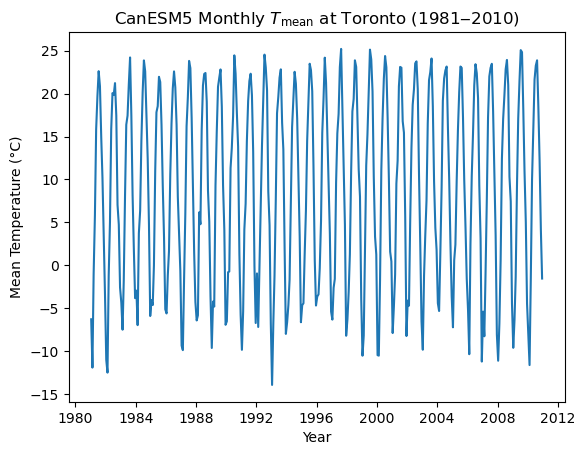

In [61]:
plt.plot(df.Date, df.MeanTemp)
plt.title(r'CanESM5 Monthly $T_\mathrm{mean}$ at Toronto (1981‒2010)')
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")

El pronunciado ciclo estacional y el rango de invierno a verano parecen razonables para la ubicación de Toronto.

Siempre es una buena idea cerrar nuestro archivo netCDF cuando hayamos terminado con él.

In [62]:
nc.close()

## 3.2 El pasado (GCS + xarray)

Ahora que tenemos una mejor idea de la estructura de datos de netCDF, simplificaremos el proceso anterior utilizando Google Cloud y xarray. Primero, importemos los paquetes adicionales que necesitamos.

In [63]:
import xarray as xr
import zarr
import gcsfs

Ahora, accedamos al catálogo de datos CMIP6 de Google Cloud, como lo hicimos en la Sección 1.

In [64]:
cmip6_cat = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

Procedemos consultando el mismo modelo (CanESM5), variable (tas mensual, también conocido como MeanTemp) y experimento histórico, como lo hicimos anteriormente.

In [65]:
files = cmip6_cat.query("table_id == 'Amon' & source_id == 'CanESM5' &  variable_id == 'tas' & experiment_id == 'historical' & member_id =='r1i1p1f1'")
files

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
100305,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


Esto también se puede escribir así, que es más legible:

In [66]:
# Definimos los criterios de búsqueda descompuestos
query_criteria = (
    "table_id == 'Amon' & "
    "source_id == 'CanESM5' & "
    "variable_id == 'tas' & "
    "experiment_id == 'historical' & "
    "member_id =='r1i1p1f1'"
)

# Consultamos el catálogo CMIP6 con los criterios especificados
files = cmip6_cat.query(query_criteria)

# Mostramos el resultado
files

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
100305,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,NaN,20190429


In [70]:
# Ahí está el archivo que estamos buscando. Al igual que en el sección 1, ahora accederemos al archivo, estableciendo 
# una conexión a Google Cloud.

In [71]:
# solo necesitamos hacer esto una vez
gcs = gcsfs.GCSFileSystem(token='anon')

# indicamos la ruta a una carpeta específica de archivos zarr
zstore = files.zstore.values[0]

# creamos una dirección al archivo 
mapper = gcs.get_mapper(zstore)

# lo abrimos usando xarray y zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset> Size: 65MB
Dimensions:    (lat: 64, bnds: 2, lon: 128, time: 1980)
Coordinates:
    height     float64 8B ...
  * lat        (lat) float64 512B -87.86 -85.1 -82.31 ... 82.31 85.1 87.86
    lat_bnds   (lat, bnds) float64 1kB ...
  * lon        (lon) float64 1kB 0.0 2.812 5.625 8.438 ... 351.6 354.4 357.2
    lon_bnds   (lon, bnds) float64 2kB ...
  * time       (time) object 16kB 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object 32kB ...
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 65MB ...
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    status:                      2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/872062df-acae-499b-aa0f-9eaca76...
    version_id:                  v20190429

Observamos la estructura de los datos. Deberíamos ver las mismas dimensiones, coordenadas y variables que vimos anteriormente, pero presentadas de una manera mucho más intuitiva visualmente.

Como indicamos anteriormente, ahora extraeremos la ubicación y el período de tiempo que nos interesan. Hicimos algo similar en el Laboratorio 2 para los datos de temperatura diaria. Extendamos nuestro período de tiempo hasta el año 2014, para que podamos agregar más fácilmente nuestros experimentos futuros, los SSP, a nuestro dataframe.

In [72]:
# Seleccionamos el punto más cercano a Toronto en latitud y longitud
dat = ds.sel(lat="43.67", lon="280.6",method='nearest')

# Seleccionamos el rango temporal deseado 
dat = dat.sel(time=slice("1981","2014")) - 273.15 # convert from Kelvin to degC

# Cargamos los datos a la memoria
dat.load()

<xarray.Dataset> Size: 11kB
Dimensions:    (bnds: 2, time: 408)
Coordinates:
    height     float64 8B 2.0
    lat        float64 8B 43.25
    lat_bnds   (bnds) float64 16B 41.86 44.66
    lon        float64 8B 281.2
    lon_bnds   (bnds) float64 16B 279.8 282.7
  * time       (time) object 3kB 1981-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object 7kB 1981-01-01 00:00:00 ... 2015-01-01 00:...
Dimensions without coordinates: bnds
Data variables:
    tas        (time) float32 2kB -6.276 -11.9 -1.033 ... 9.475 4.363 -3.205
Attributes: (12/56)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    status:                      2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:         hdl:21.14100/872062df-acae-499b-aa0f-9eaca76...
    version_id:                  v20190429

A continuación, convertiremos nuestro xarray en un dataframe de pandas para facilitar la integración de los datos de la estación meteorológica en nuestro análisis más adelante. Recordemos que sobre nuestro dataframe había tres columnas Date, MeanTempy Experiment. Podemos extraer el nombre del experimento utilizando los nombres de las columnas de nuestra consulta del catálogo CMIP6.

Para integrar la variable de tiempo en pandas , necesitamos convertirla de un objeto cftime (el formato de hora netCDF) a un objeto de fecha y hora .

In [73]:
dates = dat.indexes['time'].to_datetimeindex() #convert cftime to datetime

C:\Users\ideap\AppData\Local\Temp\ipykernel_26464\3737912173.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = dat.indexes['time'].to_datetimeindex() #convert cftime to datetime


Finalmente, empaquetemos todas las piezas en un dataframe.

In [74]:
df = pd.DataFrame({'Date': dates, 'MeanTemp': dat['tas'].values, 'Experiment': exp})
df.head()

NameError: name 'exp' is not defined

Como arriba, simplifiquemos la Datevariable:

In [ ]:
df['Date'] = [dt.date(i.year, i.month, i.day) for i in df.Date]

El dataframe final, debería verse exactamente como el primero que creamos.

In [75]:
df.head()

,Date,MeanTemp,Experiment
0,1981-01-16,-6.276367,historical
1,1981-02-15,-11.902924,historical
2,1981-03-16,-1.033234,historical
3,1981-04-16,5.808594,historical
4,1981-05-16,15.836456,historical


In [76]:
df.tail()

,Date,MeanTemp,Experiment
355,2010-08-16,23.870422,historical
356,2010-09-16,18.445435,historical
357,2010-10-16,12.228333,historical
358,2010-11-16,4.120392,historical
359,2010-12-16,-1.534607,historical


## 3.3 El futuro

Lo primero que debemos hacer es consultar y localizar los archivos de experimentos futuros para CanESM5, es decir, los archivos SSP.

In [77]:
# En vez de :
# files2 = cmip6_cat.query("table_id == 'Amon' & source_id == 'CanESM5' & variable_id == 'tas' & experiment_id == ['ssp119','ssp126','ssp245','ssp370','ssp585'] & member_id =='r1i1p1f1'")

# Definimos los criterios de búsqueda
query_criteria = (
    "table_id == 'Amon' & "
    "source_id == 'CanESM5' & "
    "variable_id == 'tas' & "
    "experiment_id.isin(['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']) & "
    "member_id =='r1i1p1f1'"
)

# Consultamos el catálogo CMIP6 con los criterios especificados
files2 = cmip6_cat.query(query_criteria)

# Mostramos el resultado
files2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
86050,ScenarioMIP,CCCma,CanESM5,ssp370,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
94452,ScenarioMIP,CCCma,CanESM5,ssp585,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
110673,ScenarioMIP,CCCma,CanESM5,ssp245,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
130759,ScenarioMIP,CCCma,CanESM5,ssp119,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429
151017,ScenarioMIP,CCCma,CanESM5,ssp126,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/CCCma/CanESM5/ssp...,NaN,20190429


Clasifiquemos este dataframe según el experimento. Esto será útil más adelante.

In [78]:
files2 = files2.sort_values(by=['experiment_id'])

Ahora vamos a repetir el mismo proceso para los cinco SSP que hicimos para el experimento histórico. La repetición requiere una función. Definamos una función que acceda a cada archivo (es decir, cada fila) de un dataframe de consulta de Google Cloud.

In [79]:
def open_dataset(files,i):
    zstore = files.zstore.values[i]
    exp_id = files.experiment_id.values[i]
    ds = xr.open_zarr(gcs.get_mapper(zstore), consolidated=True)
    return ds,exp_id

Podemos usar esta función para agregar los datos del SSP al dataframe históricos que ya hemos creado usando un bucle rápido for entre los cinco archivos SSP.

Este bucle, procesará los datos de cada archivo de la misma manera que procesamos los datos históricos y creará un dataframe que contiene todos nuestros datos.

In [80]:
for i in range(len(files2)):
    tmp,exp = open_dataset(files2,i)

    # Extraemos el lugar y el período de tiempo de interés
    tmp = tmp.sel(lat="43.67", lon="280.6",method='nearest')
    tmp = tmp.sel(time=slice("2015","2100")) - 273.15 #convert to degC

    # Nota: algunos modelos dan resultados de forma diaria. 
    dates = tmp.indexes['time'].to_datetimeindex(unsafe=True) #convert cftime to datetime
    #dates = tmp.indexes['time']

    # Creamos el data frame
    df2 = pd.DataFrame({'Date': dates, 'MeanTemp': tmp['tas'].values, 'Experiment': exp})
    df2['Date'] = [dt.date(i.year, i.month, i.day) for i in df2.Date]

    # Concatenamos el nuevo  data frame ssp (df2) con el data frame histórico (df)
    df = pd.concat([df,df2], ignore_index=True, sort=True)

La tabla que hemos creado arriba es un dataframe "largo". Un dataframe largo es lo que se conoce como " datos ordenados " en el universo R. Los datos ordenados se caracterizan por algunos principios simples: cada columna es una variable, cada fila es una observación, cada tabla contiene un tipo único de unidad de observación.

Una tabla de diseño larga es muy útil para muchas operaciones, como agrupar y subconjuntos, pero puede ser un desafío trazarla. Por ejemplo:

<Axes: >

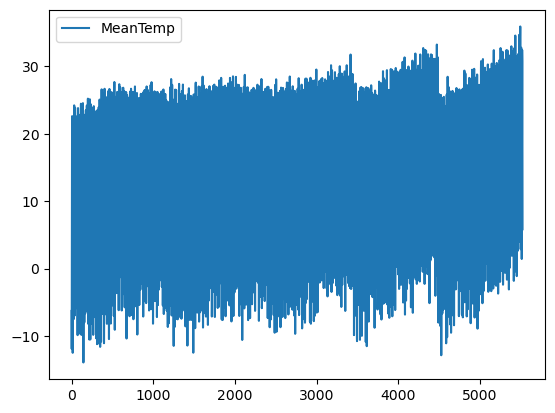

In [81]:
df.plot()

En algún lugar de la Figura 8.2 está el CanESM5 Mensual t.metroaminorte en Toronto (2015-2100) usando nuestros cinco escenarios SSP, pero necesitaríamos un código más sofisticado. Podemos arreglar manualmente lo anterior, filtrando para cada proyección y agregando la línea manualmente.

Text(0, 0.5, 'Mean Temperature (°C)')

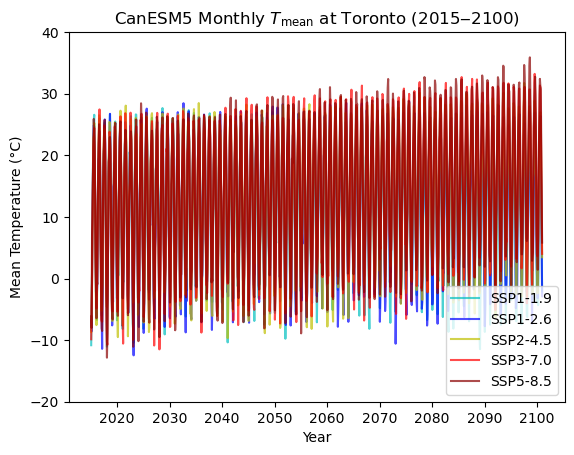

In [82]:
plt.plot(df.Date[df.Experiment == "ssp119"], df.MeanTemp[df.Experiment == "ssp119"], 'c-', alpha=0.7, label = 'SSP1-1.9')
plt.plot(df.Date[df.Experiment == "ssp126"], df.MeanTemp[df.Experiment == "ssp126"], 'b-', alpha=0.7, label = 'SSP1-2.6')
plt.plot(df.Date[df.Experiment == "ssp245"], df.MeanTemp[df.Experiment == "ssp245"], 'y-', alpha=0.7, label = 'SSP2-4.5')
plt.plot(df.Date[df.Experiment == "ssp370"], df.MeanTemp[df.Experiment == "ssp370"], 'r-', alpha=0.7, label = 'SSP3-7.0')
plt.plot(df.Date[df.Experiment == "ssp585"], df.MeanTemp[df.Experiment == "ssp585"], 'darkred', alpha=0.7, label = 'SSP5-8.5')
plt.legend(loc='lower right')
plt.ylim(-20,40)
plt.title(r'CanESM5 Monthly $T_\mathrm{mean}$ at Toronto (2015‒2100)')
plt.xlabel("Year")
plt.ylabel("Mean Temperature (°C)")

¿Y si queremos incluir los datos “históricos”? En la Figura 8.3 trazamos manualmente cada escenario como una línea separada en el mismo gráfico. La biblioteca seaborn también puede facilitar un poco este proceso. Usando seaborn podemos identificar qué es lo que hace que cada serie de datos sea única y cómo queremos diferenciar entre series. Pasaremos hue="Experiment"a nuestro gráfico marino , que indica que queremos un tono (es decir, color) diferente para cada valor único en "Experiment".

In [83]:
import seaborn as sns

[Text(0, 0.5, 'Mean Temperature (°C)'),
 Text(0.5, 1.0, 'CanESM5 Monthly $T_\\mathrm{mean}$ at Toronto (1981‒2100)')]

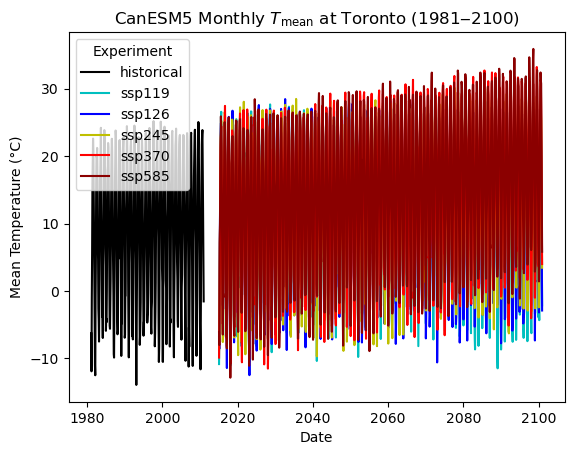

In [84]:
sns.lineplot(data=df, x="Date", y="MeanTemp", hue="Experiment",palette=["k","c", "b", "y", "r","darkred"]).set(ylabel="Mean Temperature (°C)", title=r'CanESM5 Monthly $T_\mathrm{mean}$ at Toronto (1981‒2100)')

Un dataframe largo es computacionalmente eficiente, pero no es tan intuitivo para el ojo humano. Por tanto, si queremos incluir una tabla en un informe o publicación, el diseño ancho suele ser más fácil de imprimir. Podemos crear una tabla de diseño amplia usando df.pivot así:

In [85]:
df_wide = df.pivot(index='Date', columns='Experiment')['MeanTemp']

In [86]:
df_wide.head()

Experiment,historical,ssp119,ssp126,ssp245,ssp370,ssp585
Date,,,,,,
1981-01-16,-6.276367,NaN,NaN,NaN,NaN,NaN
1981-02-15,-11.902924,NaN,NaN,NaN,NaN,NaN
1981-03-16,-1.033234,NaN,NaN,NaN,NaN,NaN
1981-04-16,5.808594,NaN,NaN,NaN,NaN,NaN
1981-05-16,15.836456,NaN,NaN,NaN,NaN,NaN


In [87]:
df_wide.tail()

Experiment,historical,ssp119,ssp126,ssp245,ssp370,ssp585
Date,,,,,,
2100-08-16,NaN,23.564697,26.388550,26.977051,31.046631,31.213440
2100-09-16,NaN,19.886261,20.563843,25.151825,26.710999,30.756989
2100-10-16,NaN,11.292908,14.421967,16.221588,17.903748,22.165222
2100-11-16,NaN,6.061523,5.788635,8.628082,10.470490,13.136444
2100-12-16,NaN,-2.109161,-2.885834,3.456177,4.007507,5.829773


Esto también es más fácil de trazar con el plot método integrado en pandas.

Text(0, 0.5, 'Mean Temperature (°C)')

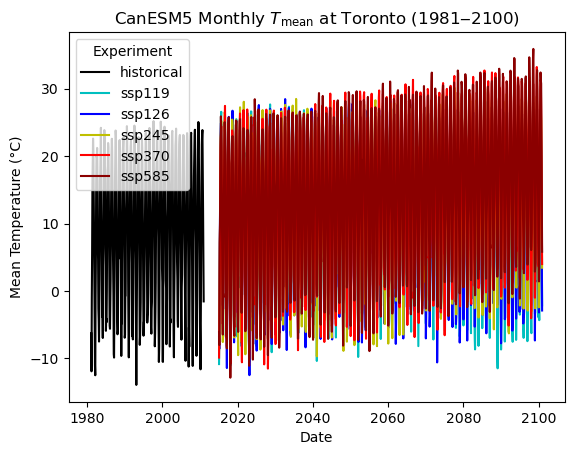

In [88]:
df_wide.plot(style={'historical': 'k', 
                    'ssp119': 'c',
                    'ssp126': 'b',
                    'ssp245': 'y',
                    'ssp370': 'r',
                    'ssp585': 'darkred'},
             title = r'CanESM5 Monthly $T_\mathrm{mean}$ at Toronto (1981‒2100)')

plt.ylabel("Mean Temperature (°C)")

## 3.4 Factores de cambio

En la siguiente etapa, usaremos factores de cambio para describir los cambios en nuestro clima de referencia. El método del factor de cambio (a veces llamado Δt) calcula la temperatura proyectada, sumando la serie temporal de temperatura de referencia observada, al cambio en la temperatura proyectada por una integración de GCM (normalmente utilizando datos de GCM mensuales). Este proceso tiene como objetivo eliminar el sesgo medio en las condiciones climáticas simuladas históricas y futuras del GCM, y representa una forma simplificada de reducción de escala.
 
El primer paso para un análisis de factores de cambio es calcular el cambio proyectado por un MCG durante su período de referencia. Para hacerlo, utilizaremos “tridécadas” de 30 años, incluida nuestra línea de base (1981-2010), y tres tridécadas comunes de cambio climático: la década de 2020 (2011-2040), la de 2050 (2041-2070) y la de 2080 (2071-2100). En este caso, es la temperatura media observada durante 30 años durante el período de referencia, y es la diferencia entre la temperatura media de 30 años proyectada por el modelo para el período de referencia y la temperatura media de 30 años proyectada por el modelo para cada una de las tres décadas. 



In [89]:
df_base = df[(df.Date >= dt.date(1981, 1, 1)) & (df.Date <= dt.date(2010, 12, 31))]
df_2020s = df[(df.Date >= dt.date(2011, 1, 1)) & (df.Date <= dt.date(2040, 12, 31))]

A continuación, calculamos los promedios de 30 años para nuestra línea de base y la década de 2020. Recordemos que la década de 2020 contendrá algunos años del experimento histórico, los años 2011-2014.

In [90]:
bsln = df_base[df_base.Experiment == "historical"].MeanTemp.mean()

Ahora podemos calcular el factor de cambio (o anomalía) para cada uno de nuestros períodos tridecadales.

In [91]:
cf2020s_ssp119 = df_2020s[df_2020s.Experiment.isin(["historical","ssp119"])].MeanTemp.mean() - bsln
cf2020s_ssp126 = df_2020s[df_2020s.Experiment.isin(["historical","ssp126"])].MeanTemp.mean() - bsln
cf2020s_ssp245 = df_2020s[df_2020s.Experiment.isin(["historical","ssp245"])].MeanTemp.mean() - bsln
cf2020s_ssp370 = df_2020s[df_2020s.Experiment.isin(["historical","ssp370"])].MeanTemp.mean() - bsln
cf2020s_ssp585 = df_2020s[df_2020s.Experiment.isin(["historical","ssp585"])].MeanTemp.mean() - bsln

Podemos resumir estos datos en una tabla como esta:

In [92]:
pd.DataFrame({"Model": np.repeat("CanESM5", 5),
              "Ensemble": np.repeat("r1i1p1f1", 5),
              "Scenario": ["SSP1-1.9","SSP1-2.6", "SSP2-4.5","SSP3-7.0", "SSP5-8.5"],
              "Baseline (°C)": np.repeat([bsln], 5),
              "2020s": [cf2020s_ssp119, cf2020s_ssp126, cf2020s_ssp245, cf2020s_ssp370,cf2020s_ssp585],
              "2050s": np.repeat([''], 5),
              "2080s": np.repeat([''], 5)})

,Model,Ensemble,Scenario,Baseline (°C),2020s,2050s,2080s
0,CanESM5,r1i1p1f1,SSP1-1.9,8.782319,2.075352,,
1,CanESM5,r1i1p1f1,SSP1-2.6,8.782319,1.987389,,
2,CanESM5,r1i1p1f1,SSP2-4.5,8.782319,2.218374,,
3,CanESM5,r1i1p1f1,SSP3-7.0,8.782319,2.296444,,
4,CanESM5,r1i1p1f1,SSP5-8.5,8.782319,2.294621,,


# 4. Estrategias para seleccionar modelos climáticos

Nota: Esta Sección no ha sido actualizada con datos CMIP6

Uno de los desafíos a los que se enfrentan los estudiantes y profesionales de la evaluación del impacto del cambio climático es decidir qué modelos utilizar para la evaluación. Echemos un vistazo a la Figura 9.1. La línea negra es el promedio anual real observado en Toronto. 
t.significar (producido a partir de los datos que descargamos de Environment and Climate Change Canada). Cada una de las líneas continuas de colores representa el escenario histórico de algún modelo del conjunto r1i1p1. Las líneas discontinuas, que comienzan alrededor de 2005, representan las proyecciones forzadas por el escenario RCP para el clima futuro en la misma celda de la cuadrícula.

https://claut.gitlab.io/man_ccia/modelselection.html#fig:ts-plot

Figura 4.1: Temperatura media anual observada y modelada por GCM en Toronto (1981-2100).
La línea negra traza los datos observados de la estación climática de Toronto. Cada línea de color representa la proyección de uno de los 39 modelos CMIP5. Las líneas sólidas indican proyecciones históricas; Las líneas discontinuas son proyecciones forzadas con los cuatro escenarios RCP del IPCC. Pasemos el cursor sobre la figura para obtener información sobre herramientas detallada.

Entonces, ¿por qué vemos tanta variación? Hay un par de factores en juego aquí. Quizás, lo más importante es el hecho de que estamos comparando manzanas con naranjas o, más específicamente, ¡una manzana con un huerto! Cada una de estas proyecciones del modelo es para una celda de cuadrícula que contiene las coordenadas específicas de la estación meteorológica de Toronto. Toronto tiene muchas consideraciones climáticas locales, como una fuerte isla de calor urbano y una importante brisa del lago, lo que la hace destacar en el contexto de la región en general. Estos procesos no están bien representados en los modelos climáticos, ¡algunos de los cuales ni siquiera consideran los Grandes Lagos!

Otra consideración es el hecho de que cada modelo mostrará su propio sesgo. Los grupos de modelización que han creado estos modelos sólo se centran en “áreas locales” en el sentido más amplio de la palabra (por ejemplo, el Ártico), a menos que exista un gran sesgo muy específico en una región particular que deba abordarse. Los sesgos suelen surgir debido a sesgos en la representación de procesos físicos (generalmente en la parametrización), o debido a sesgos generados por una resolución horizontal o vertical inadecuada. Al igual que el clima de un modelo, los sesgos son emergentes y, de hecho, bastante difíciles de remediar a escala local. Estos sesgos significan que un modelo que funciona muy bien en los desiertos de Australia puede no funcionar tan bien en el Ártico.

Entonces, ¿cómo elegimos qué modelos utilizar para informar nuestra evaluación del impacto del cambio climático? Hay una serie de estrategias que podemos emplear para la tarea, incluido el uso de modelos en los extremos superior e inferior del rango proyectado, usar el promedio de todos los modelos en un conjunto de múltiples modelos o seleccionar modelos "validados" basados ​​en la capacidad de los modelos para reproducir el clima de referencia observado. Detallaremos estas estrategias en la siguiente sección.

## 4.1 Estrategias de selección de modelos

Fenech, Comer y Gough (2007) describen tres enfoques para seleccionar modelos climáticos: utilizar los extremos; validar modelos en función de su capacidad para reproducir alguna métrica observada; y el uso de conjuntos multimodelo.

Si seleccionamos los extremos del modelo, seleccionaríamos tanto los cambios proyectados más pequeños como los más grandes como límites de referencia para la planificación de políticas. En este sentido, los modelos extremos pueden proporcionar un indicador de los límites superior e inferior de toda la gama de futuros posibles proyectados por los modelos disponibles.

Otro enfoque común para la selección de modelos es validarlos en función de su capacidad para simular el clima pasado y presente. Algunos estudios que han utilizado métodos de validación incluyen Ragettli et al. (2013), C. Xie et al. (2013) , y Hewer y Gough (2016). Cuando utilizamos un enfoque basado en validación, trabajamos bajo dos supuestos: 1) que la capacidad de un modelo para simular un clima de referencia observado será representativa de la capacidad del mismo modelo para proyectar el clima futuro, y 2) que el modelo está simulando un clima de referencia razonable por las razones correctas.

Los científicos también pueden optar por utilizar todos (o un subconjunto) de los modelos disponibles para crear un conjunto de múltiples modelos. En un conjunto de múltiples modelos, se promedia el resultado de los modelos seleccionados y ese promedio se utiliza para proyectar el clima futuro. Los conjuntos de múltiples modelos a menudo superan a los modelos individuales (Pierce et al. 2009) . El enfoque conjunto aborda parcialmente las diferentes fortalezas y debilidades de los modelos individuales, con la esperanza de que los sesgos del modelo se cancelen dentro del resultado promedio (Knutti et al. 2010). Se ha demostrado que el enfoque conjunto cancela los errores de compensación presentes en modelos individuales (Pierce et al. 2009 ) y puede corregir diferencias en la parametrización de los modelos (Knutti et al. 2010). Por lo tanto, muchos estudios optan por utilizar un conjunto completo de todos los modelos disponibles para tener en cuenta toda la gama de datos de proyección disponibles, como Gough, Anderson y Herod (2016) .

## 4.2 Advertencias a estas estrategias

Las estrategias anteriores son fáciles de implementar y se usan comúnmente en la literatura; sin embargo, existen algunas advertencias y críticas importantes a estos métodos. Por ejemplo, una crítica clave dirigida contra el uso de los extremos superior e inferior es que, normalmente, no tenemos información a priori sobre por qué los modelos relevantes ofrecen proyecciones extremas. Quizás realmente, sean casos atípicos y estemos creando artificialmente una amplia gama de escenarios posibles.

La validación del modelo también es problemática. Recordemos nuestra metáfora anterior sobre una manzana en un huerto. Las escalas espaciales entre los datos de la estación y la cuadrícula GCM son muy diferentes, y juzgar el rendimiento del modelo global basándose en datos observados de puntos de subcuadrícula es como quemar nuestro huerto porque encontramos un gusano en una sola manzana. Sin embargo, este desajuste no se aplica sólo a la escala espacial. También debemos considerar la escala temporal: suponiendo que un modelo simula la variabilidad correctamente, puede resultar difícil saber si esta variabilidad concuerda con las observaciones porque tenemos un registro histórico muy limitado y, por lo tanto, una muestra limitada de observaciones. Los procesos climatológicos modelados pueden variar dramáticamente en el transcurso de una simulación a largo plazo. A veces esta variabilidad se alineará bien con nuestras observaciones y otras no. Si, tras la validación, elegimos los años del modelo en los que nuestra simulación no parece observaciones, entonces nuestro modelo parecerá defectuoso. Sin embargo, podría darse el caso de que la naturaleza sea en realidad muy similar a nuestro modelo, pero solo hayamos muestreado una pequeña parte de su variabilidad total. Finalmente, y quizás lo más importante, no podemos estar seguros de que la capacidad de un modelo para proyectar el pasado sea verdaderamente representativa de la capacidad del mismo modelo para proyectar el futuro. De hecho, incluso la capacidad del modelo para reproducir la línea de base presenta un desafío relacionado con la equifinalidad ; Gough ( 2001 ) demostró que los cambios en la parametrización del modelo pueden cambiar en gran medida las proyecciones futuras resultantes, incluso si la línea de base se reproduce igualmente bien en cada ejecución.

Finalmente, nuestros tres métodos, generalmente consideran que los modelos disponibles son opciones independientes para el futuro. En verdad, muchos de los modelos climáticos tienen una historia compartida o utilizan el mismo código subyacente para algunos de sus componentes (atmósfera, océano, hielo, superficie terrestre). En este sentido, los modelos no son verdaderamente independientes. Si realizamos un enfoque de validación para seleccionar los modelos mejor clasificados, es probable que encontremos que los modelos interdependientes funcionan igual de bien o igualmente mal. Del mismo modo, en un estudio basado en conjuntos, incluir modelos relacionados va en contra de nuestro objetivo de cancelar los sesgos individuales, ya que dos modelos interdependientes podrían sesgar artificial y ligeramente la media general.

Teniendo en cuenta lo anterior, debemos considerar cuidadosamente nuestro enfoque en la selección de modelos para asegurarnos de que estamos tomando buenas decisiones. En el Laboratorio 4 (Sección 10 ), compararemos estos métodos de selección de modelos utilizando un enfoque de factor de cambio. En el laboratorio 5 (Sección 12 ), veremos cómo las proyecciones del modelo se pueden reducir a una escala más pequeña para reducir el sesgo del modelo y, por lo tanto, aumentar la habilidad del modelo, sin la necesidad de enfoques de selección de modelos basados ​​en validación.

## Referencias

- Fenech, Adam, Neil Comer y William A. Gough. 2007. “Selección de un modelo climático global para comprender las proyecciones futuras del cambio climático”. En Vincular los modelos climáticos con las políticas y la toma de decisiones, 133–45. Toronto: Medio Ambiente Canadá.
   
- Gough, William A. 2001. “Ajuste del modelo y su impacto en la respuesta modelada al cambio climático: Hielo marino de la Bahía de Hudson, un estudio de caso”. El geógrafo canadiense / Le Géographe Canadien 45 (2): 300–305. https://doi.org/10.1111/j.1541-0064.2001.tb01490.x .
  
- Gough, William A., Vidya Anderson y Kris Herod. 2016. “Estudio de modelos de salud y cambio climático de Ontario: Informe”. Ontario: Subdivisión de Programas y Políticas de Salud Pública del Ministerio de Salud y Atención a Largo Plazo. https://doi.org/10.13140/RG.2.2.35542.96327 .

  
- Hewer, Micah J. y William A. Gough. 2016. “Evaluación del impacto del cambio climático proyectado en las visitas al zoológico de Toronto (Canadá)”. Revista de Geografía y Geología 8 (2): 30–48. https://doi.org/10.5539/jgg.v8n2p30 .
  
- Knutti, Reto, Reinhard Furrer, Claudia Tebaldi, Jan Cermak y Gerald A. Meehl. 2010. “Desafíos al combinar proyecciones de múltiples modelos climáticos”. Revista de clima 23 (10): 2739–58. https://doi.org/10.1175/2009JCLI3361.1 .
  
- Pierce, David W., Tim P. Barnett, Benjamin D. Santer y Peter J. Gleckler. 2009. “Selección de modelos climáticos globales para estudios regionales de cambio climático”. Actas de la Academia Nacional de Ciencias 106 (21): 8441–46. https://doi.org/10.1073/pnas.0900094106 .
  
- Ragettli, S., F. Pellicciotti, R. Bordoy y WW Immerzeel. 2013. “Fuentes de incertidumbre en el modelado de la respuesta glaciohidrológica de una cuenca del Karakoram al cambio climático”. Investigación de recursos hídricos 49 (9): 6048–66. https://doi.org/10.1002/wrcr.20450 .
   
- Xie, Changwei, William A. Gough, Andrew Tam, Lin Zhao y Tonghua Wu. 2013. "Características y persistencia del permafrost relicto a gran altitud en la montaña Mahan, meseta de Loess, China". Permafrost y procesos periglaciales 24 (3): 200–209. https://doi.org/10.1002/ppp.1776 .

# 5. Eligiendo nuestros modelos

## 5.1 Introducción y configuración

Ahora que hemos revisado algunos métodos para seleccionar modelos, veámoslos en acción. Comenzaremos importando las bibliotecas relevantes, como de costumbre.

In [93]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

A continuación, necesitamos encontrar los datos de anomalías descargados. Usaremos el mismo archivo .csv que usamos al final de Lab. ejercicio 3, Sección 8.5. 

In [127]:
file = "DATA/ssp_change_factors.csv"

Ahora lo leemos usando pandas.

In [128]:
dat = pd.read_csv(file)

In [129]:
dat.head()

,Variable,Model,Scenario,1981-2010,2011-2040,2041-2070,2071-2100
0,tas,ACCESS-CM2,ssp126,5.975702,1.795567,3.468750,4.010926
1,tas,ACCESS-CM2,ssp245,5.975702,1.603762,3.545075,4.664551
2,tas,ACCESS-CM2,ssp370,5.975702,1.916411,3.938202,5.793183
3,tas,ACCESS-CM2,ssp585,5.975702,1.916542,4.229950,7.124695
4,tas,ACCESS-ESM1-5,ssp126,9.203638,1.450132,2.687561,2.943726


In [130]:
dat.tail()

,Variable,Model,Scenario,1981-2010,2011-2040,2041-2070,2071-2100
113,tas,NorESM2-MM,ssp585,8.286951,1.827906,3.703064,6.330353
114,tas,TaiESM1,ssp126,6.847009,1.900133,3.177094,3.774232
115,tas,TaiESM1,ssp245,6.847009,1.554609,3.402436,4.828614
116,tas,TaiESM1,ssp370,6.847009,1.673415,3.518616,5.838959
117,tas,TaiESM1,ssp585,6.847009,2.149199,4.891968,7.551697


Veamos con qué estamos trabajando.

In [131]:
dat.shape

(118, 7)

Parece que tenemos 118 filas y 7 columnas de datos. Dejemos de lado la 'Variable' columna, que no usaremos en este análisis. Tengamos en cuenta que solo estamos analizando el miembro del conjunto r1i1p1f1. Si deseamos analizar miembros adicionales del conjunto, debemos incluir una columna que identifique al miembro del conjunto.

In [132]:
dat = dat.drop(['Variable'], axis = 1)
dat.head()

,Model,Scenario,1981-2010,2011-2040,2041-2070,2071-2100
0,ACCESS-CM2,ssp126,5.975702,1.795567,3.468750,4.010926
1,ACCESS-CM2,ssp245,5.975702,1.603762,3.545075,4.664551
2,ACCESS-CM2,ssp370,5.975702,1.916411,3.938202,5.793183
3,ACCESS-CM2,ssp585,5.975702,1.916542,4.229950,7.124695
4,ACCESS-ESM1-5,ssp126,9.203638,1.450132,2.687561,2.943726


## 5.2 Seleccionando nuestros modelos

### 5.2.1 Usando los extremos

Elegimos nuestros modelos en función de los cambios proyectados más altos y más bajos, nos permite hacernos una idea del “rango” de posibilidades para el futuro. Dado que utilizamos factores de cambio, solo consideramos los cambios que cada modelo proyecta durante su propio período de referencia. Por lo tanto, estos cambios son relativos, es decir, el modelo con el cambio proyectado más grande no es necesariamente el modelo con la temperatura proyectada más alta.

Comentario:   
Para este y todos nuestros métodos de selección, haremos una copia dat para trabajar con el copy() método. Esta es la opción más segura, ya que algo así dat_ext = dat crea una nueva referencia a la misma dat tabla. ¡Esto no es un problema si simplemente estamos subconfigurando y filtrando datos, pero se vuelve problemático si queremos cambiar cualquiera de los puntos de datos; cualquier modificación a los valores en dat_ext también aparecerá en dat! Esto será más relevante más adelante en este ejercicio, cuando creemos el tor_win dataframe.

In [133]:
dat_ext = dat.copy()

Evaluaremos los cambios proyectados más altos y más bajos con base en el promedio de los tres períodos tridecenales. Agregaremos una nueva columna, llamada 'MeanAnom', que contendrá la anomalía tridecadal promedio, o factor de cambio, producida por cada modelo y luego ordenaremos esta nueva columna del cambio más pequeño al más grande.

In [134]:
dat_ext['MeanAnom'] = dat_ext.iloc[:,-3:].mean(axis = 1)
dat_ext = dat_ext.sort_values('MeanAnom')

In [135]:
dat_ext.head() # los más pequeños

,Model,Scenario,1981-2010,2011-2040,2041-2070,2071-2100,MeanAnom
11,CAMS-CSM1-0,ssp126,7.211725,0.560417,0.895661,1.103638,0.853239
72,IITM-ESM,ssp126,4.398706,0.752211,1.071686,1.180725,1.001541
94,KIOST-ESM,ssp126,2.966669,0.802513,1.428680,1.379089,1.203427
12,CAMS-CSM1-0,ssp245,7.211725,0.472422,1.578430,1.860260,1.303704
59,FGOALS-g3,ssp126,6.822473,1.410681,1.378022,1.440735,1.409813


In [136]:
dat_ext.tail() # los más grandes

,Model,Scenario,1981-2010,2011-2040,2041-2070,2071-2100,MeanAnom
93,KACE-1-0-G,ssp585,8.671564,2.172386,4.747009,7.160980,4.693458
117,TaiESM1,ssp585,6.847009,2.149199,4.891968,7.551697,4.864288
43,EC-Earth3,ssp585,6.003870,2.653685,4.608856,7.428070,4.896871
37,CanESM5,ssp585,8.782312,2.131543,4.874146,8.249115,5.084935
39,E3SM-1-1,ssp585,7.465784,2.758083,5.961243,9.758056,6.159128


El siguiente bloque de código es un poco complicado, así que repasémoslo: primero, agrupamos dat_ext y 'Scenario'obtenemos el valor más pequeño para cada uno usando first(). Debemos asegurarnos de ordenar los valores en el bloque de código anterior o no obtendremos el resultado esperado. Etiquetamos estos primeros valores como "Inferiores", para representar el límite inferior de las proyecciones del modelo, y restauramos el índice, que fue modificado por groupby. Luego hacemos lo mismo con el last() valor, etiquetándolos como "Upper". Finalmente, adjuntamos estas dos tablas y eliminamos la columna 'MeanAnom'.

In [137]:
lower = dat_ext.groupby('Scenario').first().assign(Limit = "Lower").reset_index()
upper = dat_ext.groupby("Scenario").last ().assign(Limit = "Upper").reset_index()

In [138]:
lower

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100,MeanAnom,Limit
0,ssp126,CAMS-CSM1-0,7.211725,0.560417,0.895661,1.103638,0.853239,Lower
1,ssp245,CAMS-CSM1-0,7.211725,0.472422,1.578430,1.860260,1.303704,Lower
2,ssp370,CAMS-CSM1-0,7.211725,0.709878,1.681183,2.707093,1.699384,Lower
3,ssp585,CAMS-CSM1-0,7.211725,0.588055,1.840119,3.313080,1.913752,Lower


In [139]:
upper

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100,MeanAnom,Limit
0,ssp126,KACE-1-0-G,8.671564,2.406111,3.670105,3.714386,3.263534,Upper
1,ssp245,CanESM5,8.782312,2.065475,3.647126,4.935028,3.549210,Upper
2,ssp370,CanESM5,8.782312,2.133130,4.579010,6.976593,4.562911,Upper
3,ssp585,E3SM-1-1,7.465784,2.758083,5.961243,9.758056,6.159128,Upper


In [142]:
dat_ext = pd.concat([lower,upper]).drop("MeanAnom", axis = 1)

In [143]:
dat_ext

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100,Limit
0,ssp126,CAMS-CSM1-0,7.211725,0.560417,0.895661,1.103638,Lower
1,ssp245,CAMS-CSM1-0,7.211725,0.472422,1.578430,1.860260,Lower
2,ssp370,CAMS-CSM1-0,7.211725,0.709878,1.681183,2.707093,Lower
3,ssp585,CAMS-CSM1-0,7.211725,0.588055,1.840119,3.313080,Lower
0,ssp126,KACE-1-0-G,8.671564,2.406111,3.670105,3.714386,Upper
1,ssp245,CanESM5,8.782312,2.065475,3.647126,4.935028,Upper
2,ssp370,CanESM5,8.782312,2.133130,4.579010,6.976593,Upper
3,ssp585,E3SM-1-1,7.465784,2.758083,5.961243,9.758056,Upper


In [145]:
dat_ext

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100,Limit
0,ssp126,CAMS-CSM1-0,7.211725,0.560417,0.895661,1.103638,Lower
1,ssp245,CAMS-CSM1-0,7.211725,0.472422,1.578430,1.860260,Lower
2,ssp370,CAMS-CSM1-0,7.211725,0.709878,1.681183,2.707093,Lower
3,ssp585,CAMS-CSM1-0,7.211725,0.588055,1.840119,3.313080,Lower
0,ssp126,KACE-1-0-G,8.671564,2.406111,3.670105,3.714386,Upper
1,ssp245,CanESM5,8.782312,2.065475,3.647126,4.935028,Upper
2,ssp370,CanESM5,8.782312,2.133130,4.579010,6.976593,Upper
3,ssp585,E3SM-1-1,7.465784,2.758083,5.961243,9.758056,Upper


Ahora tenemos una tabla de los dos modelos extremos para cada escenario, que identifica que cada modelo proporciona un extremo superior o inferior. Esta tabla se adapta a nuestras necesidades para este análisis. Revisaremos esta tabla más adelante.

### 5.2.2 Validación de líneas base del modelo

Otro método de selección de modelos es validar un modelo frente a los valores de referencia observados. Antes de que podamos validar, necesitamos datos con los que validar. Aquí estamos usando el mismo archivo .csv que generamos en el Sección 1.   


In [147]:
tor = pd.read_csv("DATA/tor.csv", index_col = 0)
tor.head()

,Date,MaxTemp,MinTemp,MeanTemp,TotalPrecip
0,1981-01-01,-5.7,-10.2,-8.0,5.0
1,1981-01-02,-9.2,-15.8,-12.5,0.0
2,1981-01-03,-16.2,-20.7,-18.5,0.0
3,1981-01-04,-12.3,-26.9,-19.6,0.0
4,1981-01-05,-4.7,-14.0,-9.4,0.0


Existen muchos enfoques diferentes para la validación de modelos. Aquí utilizaremos el índice de confianza de Gough-Fenech (GFCI) para ayudarnos a elegir nuestros modelos. El GFCI cuantifica la diferencia en la línea de base proyectada por el modelo como una proporción de la desviación estándar de los valores agregados observados. 

Comentario:   
Si está realizando un análisis mensual o estacional, debe utilizar los valores agregados respectivos. Por ejemplo, si está realizando su análisis sobre valores invernales, 
t.observación es la temperatura media anual de invierno y σ.observación es la desviación estándar de esas temperaturas invernales promedio anuales.

pandas no procesa de manera confiable la información de la fecha en un archivo .csv, por lo que debemos arreglar la columna 'Date.

In [148]:
tor.Date = pd.to_datetime(tor.Date)

Ahora podemos generar nuestro promedio anual t.significar.

In [149]:
tor_mean = tor[['Date', 'MeanTemp']].groupby(tor.Date.dt.year).mean(numeric_only=True)
tor_mean.head()

,MeanTemp
Date,
1981,8.824658
1982,8.562192
1983,9.380000
1984,9.067486
1985,8.866575


Ahora calculamos la media y la desviación estándar de esos valores.

In [150]:
tor_tas_mean = tor_mean.MeanTemp.values.mean()
tor_tas_std = tor_mean.MeanTemp.values.std()

print("Mean:", tor_tas_mean, "... Standard Deviation:", tor_tas_std)

Mean: 9.526999642630084 ... Standard Deviation: 0.7626351751355993


Dado que tenemos la misma línea de base para cada modelo, copiemos el dataframe original.

In [151]:
dat_gf = dat.copy()[['Model', '1981-2010']].drop_duplicates()

Ahora calculamos el GFCI.

In [152]:
dat_gf = dat_gf.assign(GFCI = abs(dat_gf[['1981-2010']] - tor_tas_mean) / tor_tas_std)
dat_gf.sort_values('GFCI').head(10)

,Model,1981-2010,GFCI
4,ACCESS-ESM1-5,9.203638,0.424006
19,CESM2-WACCM,8.903986,0.816922
26,CMCC-CM2-SR5,8.875727,0.853977
15,CAS-ESM2-0,8.821039,0.925686
34,CanESM5,8.782312,0.976466
97,MIROC6,10.297052,1.009726
90,KACE-1-0-G,8.671564,1.121684
86,IPSL-CM6A-LR,8.605860,1.207838
6,AWI-CM-1-1-MR,8.574091,1.249495
30,CMCC-ESM2,8.500208,1.346373


El GFCI define la confianza de la siguiente manera:

- Los valores inferiores a 1,0 indican que el sesgo en las proyecciones del modelo estaba dentro de una desviación estándar de los valores agregados observados. Estos valores se subdividen a su vez:   
- Se considera que los valores entre 0,5 y 1,0 merecen un nivel de confianza moderado.
- Se considera que los valores inferiores a 0,5 merecen un nivel de confianza alto
- Los valores superiores a 1,0 indican que el sesgo del modelo excede una desviación estándar de los valores agregados. Estas proyecciones se consideran sospechosas y no deben utilizarse.
  
Podemos convertir esto en una función simple para que podamos clasificar fácilmente la confianza que tenemos en nuestros modelos.

In [153]:
def confidence(GFCI):
    if (GFCI < 0.5):
        return "high"
    elif (GFCI > 1.0):
        return "low"
    else:
        return "moderate"

In [154]:
dat_gf['Confidence'] = dat_gf.GFCI.apply(confidence)
dat_gf.sort_values('GFCI').head(10)

,Model,1981-2010,GFCI,Confidence
4,ACCESS-ESM1-5,9.203638,0.424006,high
19,CESM2-WACCM,8.903986,0.816922,moderate
26,CMCC-CM2-SR5,8.875727,0.853977,moderate
15,CAS-ESM2-0,8.821039,0.925686,moderate
34,CanESM5,8.782312,0.976466,moderate
97,MIROC6,10.297052,1.009726,low
90,KACE-1-0-G,8.671564,1.121684,low
86,IPSL-CM6A-LR,8.605860,1.207838,low
6,AWI-CM-1-1-MR,8.574091,1.249495,low
30,CMCC-ESM2,8.500208,1.346373,low


Veamos esta información en una figura

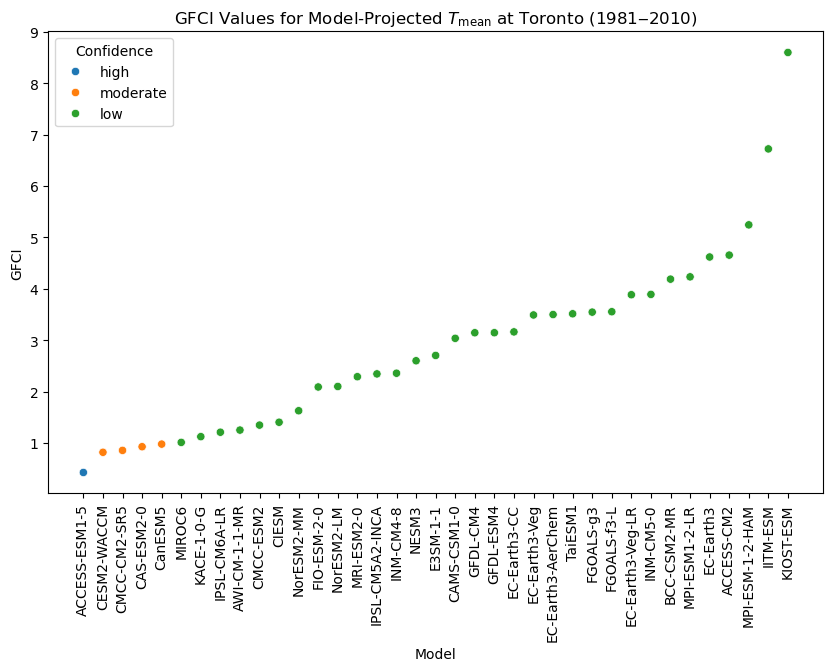

In [155]:
plt.figure(figsize=(10,6))
fg = sns.scatterplot(x="Model", y="GFCI", hue="Confidence", data=dat_gf.sort_values('GFCI'))
plt.title(r'GFCI Values for Model-Projected $T_\mathrm{mean}$ at Toronto (1981‒2010)')
for label in fg.axes.get_xticklabels():
    label.set_rotation(90)
plt.show()

Consigamos solo los tres mejores modelos.

In [156]:
dat_gf = dat_gf.sort_values('GFCI').iloc[0:3,:]
dat_gf

,Model,1981-2010,GFCI,Confidence
4,ACCESS-ESM1-5,9.203638,0.424006,high
19,CESM2-WACCM,8.903986,0.816922,moderate
26,CMCC-CM2-SR5,8.875727,0.853977,moderate


Ahora que tenemos nuestros modelos, necesitamos recuperar los factores de cambio para estos modelos. 
Podemos hacer esto con una combinación izquierda de dat into dat_gf.

In [157]:
dat_gf = pd.merge(dat_gf, dat, how = 'left', on = ['Model', '1981-2010'])
dat_gf

,Model,1981-2010,GFCI,Confidence,Scenario,2011-2040,2041-2070,2071-2100
0,ACCESS-ESM1-5,9.203638,0.424006,high,ssp126,1.450132,2.687561,2.943726
1,ACCESS-ESM1-5,9.203638,0.424006,high,ssp585,1.988043,3.748352,6.009125
2,CESM2-WACCM,8.903986,0.816922,moderate,ssp126,1.701160,3.129578,3.389801
3,CESM2-WACCM,8.903986,0.816922,moderate,ssp245,1.588462,3.355164,4.185547
4,CESM2-WACCM,8.903986,0.816922,moderate,ssp370,1.462937,3.879700,5.488342
5,CESM2-WACCM,8.903986,0.816922,moderate,ssp585,1.875615,4.506897,7.373016
6,CMCC-CM2-SR5,8.875727,0.853977,moderate,ssp126,1.272100,2.882965,3.622558
7,CMCC-CM2-SR5,8.875727,0.853977,moderate,ssp245,0.998358,2.982116,4.386383
8,CMCC-CM2-SR5,8.875727,0.853977,moderate,ssp370,0.934538,2.791137,4.430694
9,CMCC-CM2-SR5,8.875727,0.853977,moderate,ssp585,1.214020,3.660003,5.996887


Comentario:   
Podemos notar en el gráfico anterior, que algunos de los modelos con clasificaciones similares tienen nombres similares. Este es un buen recordatorio de nuestra advertencia sobre la independencia del modelo (ver Sección 9.2). Hemos clasificado nuestros modelos bajo el supuesto de que son independientes, pero en realidad nuestros modelos no son independientes. Por lo tanto, dependiendo de los resultados del ranking GFCI, es posible que uno de los mejores modelos aporte poco en términos de nuevos conocimientos al análisis. En este sentido, clasificar los modelos según su valor de producción, puede de hecho proporcionar un mejor indicador de la interdependencia del modelo que de su habilidad. Para obtener más información sobre la independencia del modelo, podemos consultar esta publicación de blog (http://www.realclimate.org/index.php/archives/2018/07/model-independence-day/) de RealClimate (http://www.realclimate.org/).

### 5.2.3 Uso del conjunto multimodelo

Usar el conjunto es tan simple como tomar el promedio de cada escenario en cada escenario.

In [158]:
dat_ens = dat.copy().groupby(['Scenario']).mean(numeric_only=True).reset_index()
dat_ens

,Scenario,1981-2010,2011-2040,2041-2070,2071-2100
0,ssp126,7.440728,1.437420,2.333416,2.488095
1,ssp245,7.379808,1.423465,2.716448,3.626614
2,ssp370,7.377921,1.417459,3.020552,4.830899
3,ssp585,7.487832,1.598217,3.677373,6.128601


Puede preocuparnos que los valores de referencia difieran según los escenarios. Lo que estamos viendo aquí es una inconsistencia basada en la cantidad de modelos que brindan proyecciones para cada escenario. Como no estamos haciendo ninguna validación aquí, realmente no importa, pero es bueno saber cuántos modelos proporcionan proyecciones para cada escenario y período.

In [159]:
dat.groupby(['Scenario']).count().reset_index()

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100
0,ssp126,28,28,28,28,28
1,ssp245,30,30,30,29,29
2,ssp370,27,27,27,27,26
3,ssp585,33,33,33,33,33


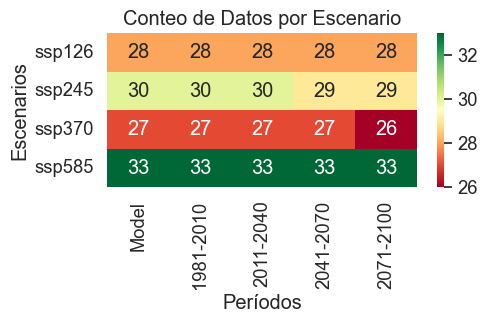

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un DataFrame con los datos de 'dat'
# Aquí deberíamos cargar o generar nuestros propios datos para 'dat'

# Creamos el heatmap
plt.figure(figsize=(5, 2))
sns.set(font_scale=1.2)  # Ajustamos el tamaño de la fuente

# Agrupamos por 'Scenario', contar y resetear el índice
data_grouped = dat.groupby(['Scenario']).count().reset_index()

# Creamos el heatmap con colores rojo-amarillo-verde
sns.heatmap(data_grouped.set_index('Scenario'), cmap='RdYlGn', annot=True, fmt='g')

plt.title('Conteo de Datos por Escenario')
plt.xlabel('Períodos')
plt.ylabel('Escenarios')
plt.show()

En la tabla anterior, vemos que SSP3-7.0 es el modelado menos comúnmente. Durante el resto del ejercicio, usaremos los escenarios SSP1-2.6 y SSP5-8.5 cuando apliquemos nuestros factores de cambio. El uso de estos dos escenarios resalta las marcadas diferencias que presentan estos dos futuros plausibles.

Comentario:   
Los métodos que hemos visto anteriormente son rápidos y útiles para ser comentados, pero hay muchas otras formas más avanzadas de elegir modelos para estudios CCIA. Muchos estudios recientes se han centrado en la identificación de subconjuntos óptimos, utilizando algunos de los modelos más relevantes. 

## 5.3 Aplicando nuestros factores de cambio

Ahora que hemos elegido nuestros modelos, veamos cómo podemos aplicar estos factores de cambio a nuestros datos observados. Para cada período, aplicamos el factor de cambio dado a los valores diarios de nuestros datos observados. Si tuviéramos que graficar esto, se parecería un poco a una escalera irregular, con cada tridécada desplazándose en una cantidad fija. Sin embargo, lo que interesa no son los valores diarios. No podemos pronosticar de manera confiable el clima diario en un futuro lejano. En cambio, utilizamos la historia pasada, combinada con el cambio tridecadal promedio para estimar los cambios en nuestro índice climático. Ya que estamos mirando t.significar .   
   
Aquí, no examinaremos las noches tropicales como lo hicimos en el Laboratorio 1. Aquí contabilizaremos los días de aire acondicionado en verano y los días de calefacción en invierno para los escenarios SSP1-2.6 y SSP5-8.5.

Comentario:   
En estos ejemplos, utilizamos factores de cambio anual para analizar índices climáticos estacionales. Esto no es verdaderamente fiable. Las secciones siguientes solo sirven como ejemplos de código. En nuestra investigación, asegurémonos de utilizar los factores de cambio apropiados para nuestro período de interés.

Comenzaremos esta sección mostrando cómo podemos aplicar manualmente los factores de cambio y luego definiremos una función que lo hará más fácil.

### 5.3.1 Usando los extremos

Comencemos filtrando nuestra tabla extrema para usar solo los escenarios SSP1-2.6 y SSP5-8.5.

In [161]:
dat_ext = dat_ext[dat_ext.Scenario.isin(['ssp126', 'ssp585'])]
dat_ext

,Scenario,Model,1981-2010,2011-2040,2041-2070,2071-2100,Limit
0,ssp126,CAMS-CSM1-0,7.211725,0.560417,0.895661,1.103638,Lower
3,ssp585,CAMS-CSM1-0,7.211725,0.588055,1.840119,3.313080,Lower
0,ssp126,KACE-1-0-G,8.671564,2.406111,3.670105,3.714386,Upper
3,ssp585,E3SM-1-1,7.465784,2.758083,5.961243,9.758056,Upper


Apliquemos el extremo alto para SSP1-2.6 para la década de 2020. Hay varias formas de subconfigurar la tabla superior. Usemos la más sencilla.

In [162]:
anom = dat.loc[dat.Model == 'KACE-1-0-G', '2011-2040'].values[0]
anom

2.4061114000000003

Ahora agregamos esa anomalía a los 'MeanTemp' valores diarios en una copia del tordataframe.

In [163]:
tor_ext = tor.copy()[['Date', 'MeanTemp']]
tor_ext = tor_ext.assign(hex2020s = tor.MeanTemp + anom)
tor_ext.head()

,Date,MeanTemp,hex2020s
0,1981-01-01,-8.0,-5.593889
1,1981-01-02,-12.5,-10.093889
2,1981-01-03,-18.5,-16.093889
3,1981-01-04,-19.6,-17.193889
4,1981-01-05,-9.4,-6.993889


Ahora podemos (re)calcular nuestro índice climático, grados-día de enfriamiento (CDD) usando una expresión lambda tal como lo hicimos en la Sección 1.

In [164]:
tor_ext['CDDObs'] = tor_ext.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18)
tor_ext['CDDhex2020s'] = tor_ext.hex2020s.apply(lambda x: 0 if x <= 18 else x - 18)
tor_ext.head()

,Date,MeanTemp,hex2020s,CDDObs,CDDhex2020s
0,1981-01-01,-8.0,-5.593889,0.0,0.0
1,1981-01-02,-12.5,-10.093889,0.0,0.0
2,1981-01-03,-18.5,-16.093889,0.0,0.0
3,1981-01-04,-19.6,-17.193889,0.0,0.0
4,1981-01-05,-9.4,-6.993889,0.0,0.0


Entonces, ¿cuál es el cambio proyectado en los CDD de verano? Vamos a ver.

In [165]:
tor_ext[tor_ext.Date.dt.month.isin([6,7,8])].filter(regex = '^CDD').sum()

CDDObs          9654.500000
CDDhex2020s    15602.942425
dtype: float64

Parece que podemos esperar un aumento de 9654,5 CDD totales desde el punto de referencia a 15602,9 en la década de 2020. Esto podría tener graves consecuencias para el suministro de energía para el aire acondicionado.

Creamos una función que toma cinco argumentos: obs es un dataframe de dos columnas que contiene la 'Date'columna variable y; anomses la dat_*tabla respectiva; states la estadística que queremos calcular para el índice climático, por ejemplo  sum; expres una expresión lambda que evaluamos para calcular el índice climático (algunos ejemplos se encuentran en el Apéndice A); finalmente, monthhay una lista de uno o más meses para filtrar, de forma predeterminada None.    
En caso de duda, la función tiene una cadena de documentación completa para ayudarnos a elegir valores para cada parámetro.

In [166]:
from math import isnan

def recalc_exp(obs, anoms, stat, expr, month = None):
    """Recalculate and aggregate a climate index using observed data
    and Conjuntool output.

    Parameters
    ----------
    obs   : pandas.core.series.Series
        A single-column or array data frame with 'Date' and some variable column
    anoms : pandas.core.frame.DataFrame
        The data frame produced by Conjuntool, filtered as necessary
    stat  : builtin_function_or_method or function
        The function to call on the calculated climate index, e.g. sum
    expr  : str
        A lambda expression to be applied to the variable column to
        calculate the climate index
    month : list
        A list of the months to filter on (optional)
    """
    row_list = []
    if month is not None:
        obs = obs[obs.Date.dt.month.isin(month)]
    baseline = stat(obs.iloc[:,1].apply(eval(expr)))
    for model in set(anoms.Model):
        for scen in set(anoms.Scenario):
            periods = {}
            for period in [col for col in anoms.columns if '-' in col][1:]:
                anom = anoms.loc[(anoms.Scenario == scen) & (anoms.Model == model)][[period]].values
                if len(anom) == 0:
                    continue
                else:
                    anom = anom[0]
                tmp = obs.assign(new = obs.iloc[:,1].values + anom)
                tmp = stat(tmp.new.apply(eval(expr)))
                periods[period] = tmp
            if all(isnan(value) for value in periods.values()):
                continue
            else:
                row = {'Model': model,
                       'Scenario': scen,
                       'Baseline': baseline}
                row = {**row, **periods}
                row_list.append(row)
    return pd.DataFrame(row_list, columns=row.keys())

Echemos un vistazo a los CDD, según nuestros modelos extremos.

In [167]:
recalc_exp(obs=tor[['Date', 'MeanTemp']],
           anoms=dat_ext,
           stat=sum,
           expr="lambda x: 0 if x <= 18 else x - 18",
           month=[6,7,8])

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,CAMS-CSM1-0,ssp126,9654.5,10957.468592,11763.282749,12274.430012
1,CAMS-CSM1-0,ssp585,9654.5,11023.055417,14133.785986,18003.024134
2,E3SM-1-1,ssp585,9654.5,16529.507491,25185.106916,35648.635664
3,KACE-1-0-G,ssp126,9654.5,15602.942425,18958.131925,19077.083954


Como podríamos haber esperado, hay un aumento mayor en los CDD para el escenario SSP5-8.5 que para el escenario SSP1-2.6, pero los aumentos más pequeños y mayores en general en los CDD, dependen de si consideramos los extremos inferior o superior del modelo.

A la tabla anterior le falta un dato importante. En nuestra dat_exttabla, habíamos etiquetado cada modelo como proveedor y extremo superior o inferior, pero la recalc_exp() función no conserva esta información. ¿Cómo podemos recuperar la información? La opción más sencilla podría ser reemplazar los valores de dat_ext.Model con los valores de dat_ext.Limit, pero esto, nuevamente, elimina información clave de los resultados, específicamente, el modelo que proporcionó cada proyección. Otra opción sería reescribir recalc_exp() para conservar ambas informaciones. La tercera opción, sin embargo, es la que usaremos: ya sabemos si cada modelo en nuestra recalc_exp() salida representa el límite superior o inferior de nuestras proyecciones, ya que esa información está presente en dat_ext. Podemos usar el mismo mecanismo de fusionar dos tablas que usamos en la sección GFCI para crear una tabla que incluya ambos datos.

In [168]:
projected_cdds = recalc_exp(obs=tor[['Date', 'MeanTemp']],
                            anoms=dat_ext,
                            stat=sum,
                            expr="lambda x: 0 if x <= 18 else x - 18",
                            month=[6,7,8])

pd.merge(projected_cdds, dat_ext[['Scenario', 'Model', 'Limit']])

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100,Limit
0,CAMS-CSM1-0,ssp126,9654.5,10957.468592,11763.282749,12274.430012,Lower
1,CAMS-CSM1-0,ssp585,9654.5,11023.055417,14133.785986,18003.024134,Lower
2,E3SM-1-1,ssp585,9654.5,16529.507491,25185.106916,35648.635664,Upper
3,KACE-1-0-G,ssp126,9654.5,15602.942425,18958.131925,19077.083954,Upper


También podemos usar nuestra recalc_exp()función para obtener el CDD promedio diario de 30 años, en lugar del total de 30 años.

¿Qué pasa si queremos calcular los grados día de calefacción en invierno? Tendremos que aumentar nuestros diciembres un año como lo hicimos en la sección 1. Esto no es estrictamente necesario en este momento, ya que estamos viendo totales de 30 años, pero siempre es un buen hábito de mantener y nos permite para ser más precisos sobre las estaciones en consideración. 

In [169]:
tor_win = tor.copy()
tor_win['Date'] = tor_win.Date.apply(lambda x: x + pd.DateOffset(years=1) if x.month == 12 else x)

In [170]:
tor_win.head() # Not shifted

,Date,MaxTemp,MinTemp,MeanTemp,TotalPrecip
0,1981-01-01,-5.7,-10.2,-8.0,5.0
1,1981-01-02,-9.2,-15.8,-12.5,0.0
2,1981-01-03,-16.2,-20.7,-18.5,0.0
3,1981-01-04,-12.3,-26.9,-19.6,0.0
4,1981-01-05,-4.7,-14.0,-9.4,0.0


In [171]:
tor_win.tail() # Shifted

,Date,MaxTemp,MinTemp,MeanTemp,TotalPrecip
4013,2011-12-27,-0.9,-10.7,-5.8,0.0
4014,2011-12-28,0.7,-3.9,-1.6,0.0
4015,2011-12-29,-0.2,-3.1,-1.7,0.0
4016,2011-12-30,5.7,-3.5,1.1,0.0
4017,2011-12-31,9.9,5.3,7.6,0.0


Dejemos de lado los años que sabemos que están incompletos, el invierno de 1981/82, al que le falta diciembre de 1980, y el invierno de 2010/11, que es sólo diciembre de 2010. Recordemos, una mejor solución para el primero, sería descargar datos de diciembre de 1980, para que podamos incluir los 30 inviernos.

In [172]:
tor_win = tor_win[tor_win.Date.dt.year.isin(range(1982, 2011))]

In [173]:
pd.merge(recalc_exp(obs=tor_win[['Date', 'MeanTemp']],
                    anoms=dat_ext,
                    stat=sum,
                    expr="lambda x: 0 if x >= 18 else 18 - x",
                    month=[12,1,2]),
         dat_ext[['Scenario', 'Model', 'Limit']])

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100,Limit
0,CAMS-CSM1-0,ssp126,53028.5,51561.889758,50684.554640,50140.278831,Lower
1,CAMS-CSM1-0,ssp585,53028.5,51489.559071,48212.908054,44358.582197,Lower
2,E3SM-1-1,ssp585,53028.5,45810.596091,37433.732239,27568.678939,Upper
3,KACE-1-0-G,ssp126,53028.5,46731.706466,43424.605320,43308.766224,Upper


A medida que se prevé que el invierno sea más cálido, veremos menos grados día de calefacción. Este cambio es más rápido en el escenario de mayor recalentamiento global.

### 5.3.2 Uso del conjunto multimodelo

Dado que la recalc_exp() función espera que nuestro anoms dataframe incluya una 'Model'columna, debemos agregar una.

In [174]:
dat_ens['Model'] = "Ensemble"
dat_ens

,Scenario,1981-2010,2011-2040,2041-2070,2071-2100,Model
0,ssp126,7.440728,1.437420,2.333416,2.488095,Ensemble
1,ssp245,7.379808,1.423465,2.716448,3.626614,Ensemble
2,ssp370,7.377921,1.417459,3.020552,4.830899,Ensemble
3,ssp585,7.487832,1.598217,3.677373,6.128601,Ensemble


Ahora podemos echar un vistazo a los cambios proyectados en nuestros índices climáticos.

Para CDD:

In [175]:
recalc_exp(obs=tor[['Date', 'MeanTemp']],
           anoms=dat_ens[dat_ens.Scenario.isin(['ssp126', 'ssp585'])],
           stat=sum,
           expr="lambda x: 0 if x <= 18 else x - 18",
           month=[6,7,8])

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,Ensemble,ssp126,9654.5,13108.585616,15412.316097,15818.150097
1,Ensemble,ssp585,9654.5,13515.777228,18977.646700,25644.053599


Para HDD:

In [176]:
recalc_exp(obs=tor_win[['Date', 'MeanTemp']],
           anoms=dat_ens[dat_ens.Scenario.isin(['ssp126', 'ssp585'])],
           stat=sum,
           expr="lambda x: 0 if x >= 18 else 18 - x",
           month=[12,1,2])

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,Ensemble,ssp126,53028.5,49266.77174,46921.950982,46517.154665
1,Ensemble,ssp585,53028.5,48845.96539,43405.592042,36996.721784


### 5.3.3 Uso de nuestros modelos mejor clasificados

Nuestra función funciona como se esperaba para los CDD:

In [177]:
out_CDD = recalc_exp(obs=tor[['Date', 'MeanTemp']],
                     anoms=dat_gf[dat_gf.Scenario.isin(['ssp126', 'ssp585'])],
                     stat=sum,
                     expr="lambda x: 0 if x <= 18 else x - 18",
                     month=[6,7,8])
out_CDD

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,CESM2-WACCM,ssp126,9654.5,13777.868099,17514.166214,18207.868670
1,CESM2-WACCM,ssp585,9654.5,14224.902849,21217.811561,29068.505112
2,CMCC-CM2-SR5,ssp126,9654.5,12693.562099,16859.193530,18830.468230
3,CMCC-CM2-SR5,ssp585,9654.5,12548.593088,18931.008055,25282.770380
4,ACCESS-ESM1-5,ssp126,9654.5,13140.683132,16343.610796,17020.117626
5,ACCESS-ESM1-5,ssp585,9654.5,14514.299627,19168.418528,25316.329875


Trazamos algunos de estos cambios, a continuación. Aquí visualizaremos los cambios en los HDD de invierno. Creamos una tabla, a la que llamamos out, para guardar nuestros cambios proyectados.

In [178]:
out_HDD = recalc_exp(obs=tor_win[['Date', 'MeanTemp']],
                 anoms=dat_gf[dat_gf.Scenario.isin(['ssp126', 'ssp585'])],
                 stat=sum,
                 expr="lambda x: 0 if x >= 18 else 18 - x",
                 month=[12,1,2])
out_HDD

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,CESM2-WACCM,ssp126,53028.5,48576.564629,44838.623952,44157.880584
1,CESM2-WACCM,ssp585,53028.5,48120.016417,41235.864345,33750.766336
2,CMCC-CM2-SR5,ssp126,53028.5,49699.413777,45483.780595,43548.988272
3,CMCC-CM2-SR5,ssp585,53028.5,49851.410532,43451.032152,37340.631156
4,ACCESS-ESM1-5,ssp126,53028.5,49233.504730,45995.152863,45324.812784
5,ACCESS-ESM1-5,ssp585,53028.5,47825.790597,43219.911168,37308.674625


En la seccion 2, solíamos usar pd.pivot() para girar nuestra tabla. Sin embargo, ahora, la herramienta que debemos usar es la antítesis de pd.pivot(), pd.melt().

In [179]:
out_long_HDD = out.melt(id_vars = ['Model', 'Scenario'], var_name = "Period", value_name = "Heating Degree Days")

NameError: name 'out' is not defined

Ahora trazamos con Seaborn (sns). 

In [180]:
sns.catplot(x = "Period", y = "Heating Degree Days", hue = "Scenario", col = "Model",
            data = out_long_HDD, hue_order=["ssp126", "ssp585"], saturation = 0.5,
            palette = "Blues", kind = "bar", errorbar = None, height = 7, aspect = 0.66)

NameError: name 'out_long_HDD' is not defined

Días de calefacción (HDD) de referencia y futuros, en invierno en Toronto. Las proyecciones se basan en cambios en la temperatura media pronosticada por tres GCM bajo los escenarios SSP1-2.6 y SSP5-8.5.

In [181]:
out_long_CDD = out_CDD.melt(id_vars = ['Model', 'Scenario'], var_name = "Period", value_name = "Cooling Degree Days")

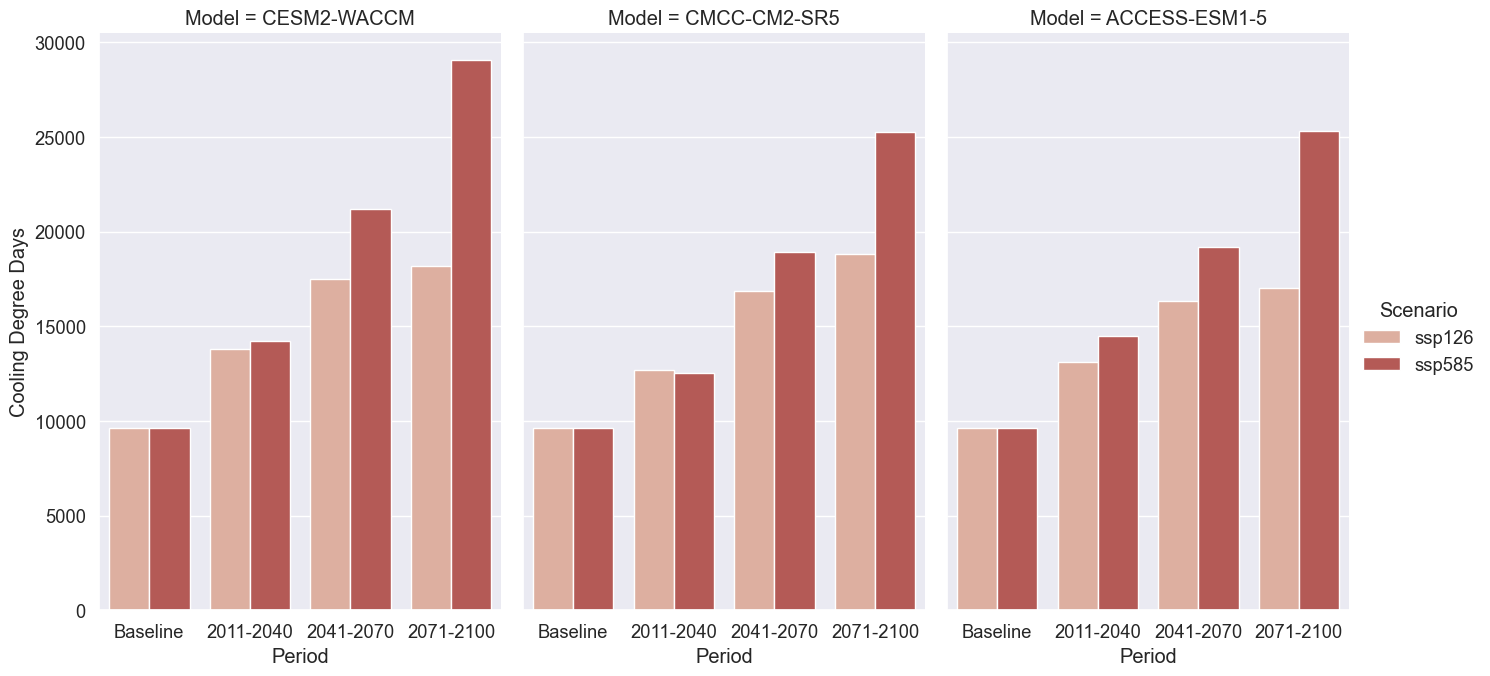

In [182]:
sns.catplot(x = "Period", y = "Cooling Degree Days", hue = "Scenario", col = "Model",
            data = out_long_CDD, hue_order=["ssp126", "ssp585"], saturation = 0.5,
            palette = "Reds", kind = "bar", errorbar = None, height = 7, aspect = 0.66)

Ahora hemos visto cómo podemos aplicar factores de cambio proyectados por el GCM a nuestros datos observados para proyectar cambios en un índice climático. En nuestro próximo ejercicio, veremos métodos de reducción de escala más avanzados.

In [183]:
out_STN = recalc_exp(obs=tor[['Date', 'MinTemp']],
                     anoms=dat_gf[dat_gf.Scenario.isin(['ssp126', 'ssp585'])],
                     stat=sum,
                     expr="lambda x: 0 if x >= 20 else x + 20",
                     month=[6,7,8])
out_STN

,Model,Scenario,Baseline,2011-2040,2041-2070,2071-2100
0,CESM2-WACCM,ssp126,79905.0,65351.069202,50600.696502,48987.039310
1,CESM2-WACCM,ssp585,79905.0,64099.347593,34717.559034,11102.047656
2,CMCC-CM2-SR5,ssp126,79905.0,69715.827683,53616.718495,45883.333550
3,CMCC-CM2-SR5,ssp585,79905.0,69604.719622,45929.203675,20862.090963
4,ACCESS-ESM1-5,ssp126,79905.0,68131.596056,55929.741988,52422.997386
5,ACCESS-ESM1-5,ssp585,79905.0,63213.158447,44515.593824,20108.636250


In [184]:
out_long_STN = out_CDD.melt(id_vars = ['Model', 'Scenario'], var_name = "Period", value_name = "Summer Tropical Nights")

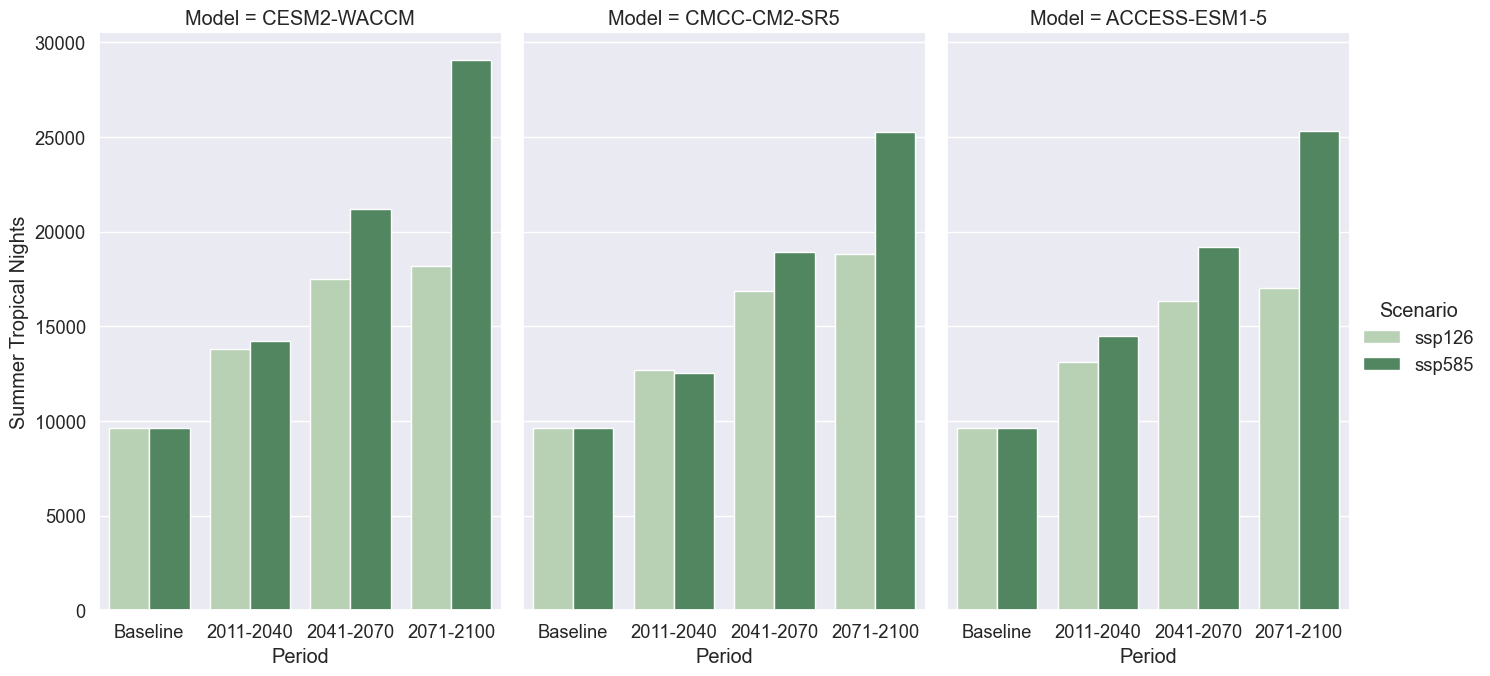

In [185]:
sns.catplot(x = "Period", y = "Summer Tropical Nights", hue = "Scenario", col = "Model",
            data = out_long_STN, hue_order=["ssp126", "ssp585"], saturation = 0.5,
            palette = "Greens", kind = "bar", errorbar = None, height = 7, aspect = 0.66)

# 6. Datos climáticos estadísticamente reducidos del PCIC

Podemos mejorar nuestra estimación del impacto del cambio climático en nuestro índice climático de interés, reduciendo la escala de los datos del GCM, utilizando técnicas estadísticas de reducción de escala más sofisticadas.

En este ejercicio, utilizaremos datos que se han reducido mediante un método llamado “corrección de sesgo/análogos construidos con reordenamiento de mapeo de cuantiles” (BCCAQv2; consulte Cannon, Sobie y Murdock (2015: https://claut.gitlab.io/man_ccia/pcic.html#ref-cannon2015bias) ). Una de las ventajas de este método es que podemos corregir sesgos y reducir la escala de los datos diarios de GCM.

Los datos fueron proporcionados por el Pacific Climate Impacts Consortium, Universidad de Victoria (2019: https://claut.gitlab.io/man_ccia/pcic.html#ref-pcic2019statistically) , y están reducidos en función de un conjunto de datos observados en cuadrícula de alta calidad (tamaño de cuadrícula de ~10 km), desarrollado por NRCan (ANUSPLIN300). El Consorcio de Impactos Climáticos del Pacífico (PCIC: https://www.pacificclimate.org/) proporciona una excelente descripción general de su metodología de reducción de escala, con citas de los artículos relevantes, aquí (https://www.pacificclimate.org/data/statistically-downscaled-climate-scenarios). 

La Figura 6.1, a continuación, muestra los resultados de este proceso de reducción de escala para el modelo canadiense CanESM2 (modelo de generación CMIP5). Observamos que el producto PCIC, reducido a una cuadrícula de 10 km, está mucho más relacionado con los datos de los puntos de la estación observados que descargamos de Environment and Climate Change Canada. Nuestra comparación aquí todavía no es perfecta, ya que todavía estamos comparando datos puntuales con una celda de la cuadrícula (aunque sea una celda de la cuadrícula más pequeña), pero es evidente que los datos reducidos pueden mejorar la calidad de nuestra evaluación de impacto. 

## 6.1 Obtención de datos PCIC estadísticamente reducidos

Hay varios lugares donde podemos descargar los datos estadísticamente reducidos de PCIC. Aquí presentamos cuatro opciones, dos que utilizan nuestro navegador web y dos a las que podemos acceder directamente desde Python. Podemos descargar los datos de la Sección 7, usando uno de los métodos siguientes.

Pacific Climate Impacts Consortium = PCIC

#### 6.1.2.1 Uso de PAVICS para obtener datos PCIC

Power Analytics and Visualization for Climate Science (PAVICS (https://pavics.ouranos.ca/index.html)) es una nueva plataforma de investigación dedicada al análisis y visualización del clima. Incluye servicios de búsqueda, análisis y visualización de datos. PAVICS está desarrollado por Ouranos (https://www.ouranos.ca/en/ouranos/), CRIM (https://www.crim.ca/en/) y la  birdhouse community (http://bird-house.github.io/) y ha sido financiado por el programa de software de investigación CANARIE (https://www.canarie.ca/software/platforms/pavics/). Podemos usar Python para acceder al servidor PAVICS y descargar los datos PCIC bccaqv2.

In [186]:
# Actualizamos las instalaciones por un error que nos ha dado el código.
# Al final, el error parece estar en el código.  

# --> No estamos seguros de que sea necesario.

# !pip install dask --upgrade
# !pip install xarray --upgrade

Como siempre, primero importamos las bibliotecas necesarias.

In [37]:
import numpy as np
from datetime import datetime
import xarray as xr
# import dask.array as da     # NO SÉ SI ESTO ES NECESARIO

A continuación, definiremos las coordenadas de latitud y longitud que nos interesan. Aquí, estamos especificando la latitud y longitud de Toronto.

In [3]:
# Definimos longitudes y latitudes de nuestra área de interés.
lon_sel = -79.4
lat_sel = 43.3

Los datos están alojados en la nube, por lo que el siguiente paso es especificar el servidor donde se encuentra el catálogo de datos. Haremos uso de un paquete llamado siphon para ayudarnos a navegar por el catálogo de datos.

In [5]:
# pip install siphon


   ---------------------------------------- 0.0/69.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/69.2 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/69.2 kB ? eta -:--:--
   ----------------- ---------------------- 30.7/69.2 kB 435.7 kB/s eta 0:00:01
   ---------------------------------------- 69.2/69.2 kB 540.7 kB/s eta 0:00:00


In [14]:
from siphon.catalog import TDSCatalog

# PAVICS descargamos este catálogo BCCAQv2 CMIP6 
pavics = "https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/datasets/simulations/bias_adjusted/cmip6/pcic/CanDCS-U6/catalog.xml"  

# Creamos un Catálogo
cat = TDSCatalog(pavics)

Veamos cuántos archivos tenemos en nuestro catálogo de datos CMIP6:

In [15]:
# List of datasets
print(f"Number of datasets: {len(cat.datasets)}")

Number of datasets: 105


Son muchos archivos. Echemos un vistazo a sus nombres.

In [26]:
all_data = [cat.datasets[x] for x in cat.datasets]

In [27]:
all_data

[day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp126_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp126_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp126_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp126_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN3

Al observar la lista de nombres de archivos, podemos ver diferentes nombres de modelos y diferentes escenarios (SSP). También podemos ver que CanESM5 tiene varios miembros del conjunto. Para darle el mismo peso a cada modelo, solo queremos descargar un miembro del conjunto para CanESM5. Además, observamos que algunas de las etiquetas de los miembros del conjunto son diferentes para distintos modelos.

Vamos a filtrar este catálogo para extraer un único archivo para cada modelo. Esto es un poco basico, pero funciona. Aquí hay un ejemplo para SSP5-8.5.

In [28]:
#filter based on ssp and ensemble member
ssp585_data = [cat.datasets[x] for x in cat.datasets if "ssp585" in x and "r1i1" in x]
ssp585_extra1 = [cat.datasets[x] for x in cat.datasets if "ssp585" in x and "r2i1p1" in x]
ssp585_extra2 = [cat.datasets[x] for x in cat.datasets if "ssp585" in x and "r4i1p1" in x]
ssp585_data = ssp585_data+ssp585_extra1+ssp585_extra2
ssp585_data

[day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml,
 day_BCCAQv2+A

In [29]:
# Han añadido más experimentos desde que se hizo el ejercicio, nos quedamos con el 1ero:
# ssp585_data = ssp585_data[0]
# ssp585_data

Podemos hacer lo mismo para SSP2-4.5:

In [30]:
ssp245_data = [cat.datasets[x] for x in cat.datasets if "ssp245" in x and "r1i1" in x]
ssp245_extra1 = [cat.datasets[x] for x in cat.datasets if "ssp245" in x and "r2i1p1" in x]
ssp245_extra2 = [cat.datasets[x] for x in cat.datasets if "ssp245" in x and "r4i1p1" in x]
ssp245_data = ssp245_data+ssp245_extra1+ssp245_extra2
ssp245_data

[day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml,
 day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml,
 day_BCCAQv2+A

In [31]:
# Han añadido más experimentos desde que se hizo el ejercicio, nos quedamos con el 1ero:
# ssp245_data = ssp245_data[0]
# ssp245_data

A continuación, recorreremos los diferentes escenarios y variables para nuestra descarga. Definamos listas para cada uno.

In [32]:
# lists of variables and scenarios
var = ['tasmax','tasmin']
scen = [ssp245_data,ssp585_data]

Dentro del bucle interno a continuación, accederemos a los datos de cada archivo. Estamos accediendo a los datos utilizando el Proyecto de código abierto para un protocolo de acceso a datos de red u OPeNDAP (https://www.earthdata.nasa.gov/engage/open-data-services-and-software/api/opendap).

In [39]:
# recorramos variables, escenarios y modelos
for j in range(len(var)):
    for i in range(len(scen)):
        for k in scen[i]:
            print(str(k)[:-5])
            # reflejemos el progreso en la pantalla
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print('...Downloading...',str(k),var[j],"Current Time =", current_time)

            # Abramos el archivo
            filename = k.access_urls["OPENDAP"]
            # grid   = xr.open_dataset(filename, chunks="auto") --> ¡DA ERROR!
            grid   = xr.open_dataset(filename) # Una vez quitado, lo va haciendo.

            # Obtengamos los datos de temperatura para la latitud, longitud y período de tiempo seleccionados
            tmp = grid[var[j]].sel(lat=lat_sel,lon=lon_sel,method='nearest')
            tmp = tmp.sel(time=slice('1981-01','2100-12'))

            # guardemos en netcdf
            tmp.to_netcdf(var[j]+'_'+str(k)[:-5]+ ".nc")
            print('...Finished...',str(k),var[j],"Current Time =", current_time)

day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100
...Downloading... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Current Time = 14:48:16
...Finished... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Current Time = 14:48:16
day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100
...Downloading... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Current Time = 14:48:23
...Finished... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Current Time = 14:48:23
day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100
...Downloading... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Current Time = 14:48:31
...Finished... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Current Time = 14:48:31
day_BCCAQv2+ANUS

Observemos que cada vez que recorremos el bucle, definimos una URL que especifica el nombre del archivo que queremos descargar. Este código descarga los datos en su directorio de trabajo.

#### Mejoras en el Bucle y Uso de Barra de Progreso

Para mejorar la claridad y eficiencia del código proporcionado, se sugiere la implementación de una barra de progreso utilizando el módulo tqdm. Este módulo es ampliamente utilizado para agregar barras de progreso a los bucles en Python de una manera sencilla y visualmente atractiva

In [42]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


Modificamos el script para incluir una barra de progreso, lo que mejora la experiencia del usuario al proporcionar retroalimentación visual sobre el progreso de la descarga y procesamiento de los datos:

In [44]:
from tqdm import tqdm
import xarray as xr
from datetime import datetime

# Suponiendo que 'var', 'scen', y 'models' son listas previamente definidas
# y 'lat_sel' y 'lon_sel' son las selecciones de latitud y longitud

for j in tqdm(range(len(var)), desc="Variables"):
    for i in tqdm(range(len(scen)), desc="Escenarios", leave=False):
        for k in tqdm(scen[i], desc="Modelos", leave=False):
            print(str(k)[:-5])
            now = datetime.now()
            current_time = now.strftime("%H:%M:%S")
            print('...Descargando...', str(k), var[j], "Hora Actual =", current_time)

            filename = k.access_urls["OPENDAP"]
            # grid = xr.open_dataset(filename, chunks="auto") --> ¡NO FUNCIONA!
            grid = xr.open_dataset(filename) # --> Así sí funciona.

            tmp = grid[var[j]].sel(lat=lat_sel, lon=lon_sel, method='nearest')
            tmp = tmp.sel(time=slice('1981-01','2100-12'))

            tmp.to_netcdf(var[j] + '_' + str(k)[:-5] + ".nc")
            print('...Finalizado...', str(k), var[j], "Hora Actual =", current_time)

Escenarios:   0%|          | 0/2 [00:00<?, ?it/s]

Modelos:   0%|          | 0/26 [00:00<?, ?it/s]

day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:05:29




Modelos:   4%|▍         | 1/26 [00:08<03:25,  8.24s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:05:29
day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:37




Modelos:   8%|▊         | 2/26 [00:16<03:12,  8.03s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:37
day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:45




Modelos:  12%|█▏        | 3/26 [00:24<03:08,  8.17s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:45
day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:54




Modelos:  15%|█▌        | 4/26 [00:32<03:01,  8.26s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:05:54
day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:02




Modelos:  19%|█▉        | 5/26 [00:39<02:41,  7.71s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:02
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:09




Modelos:  23%|██▎       | 6/26 [00:46<02:26,  7.35s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:09
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:15




Modelos:  27%|██▋       | 7/26 [00:52<02:13,  7.04s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:15
day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:22




Modelos:  31%|███       | 8/26 [00:59<02:04,  6.93s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:06:22
day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:06:28




Modelos:  35%|███▍      | 9/26 [01:05<01:55,  6.82s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:06:28
day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:35




Modelos:  38%|███▊      | 10/26 [01:14<01:59,  7.47s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:35
day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:06:44




Modelos:  42%|████▏     | 11/26 [01:21<01:47,  7.19s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:06:44
day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:50




Modelos:  46%|████▌     | 12/26 [01:29<01:45,  7.52s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:50
day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:59




Modelos:  50%|█████     | 13/26 [01:38<01:41,  7.79s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:06:59
day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100.ncml tasmax Hora Actual = 15:07:07




Modelos:  54%|█████▍    | 14/26 [01:46<01:36,  8.08s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100.ncml tasmax Hora Actual = 15:07:07
day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:07:16




Modelos:  58%|█████▊    | 15/26 [01:54<01:27,  7.99s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:07:16
day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:07:24




Modelos:  62%|██████▏   | 16/26 [02:01<01:17,  7.79s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:07:24
day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:07:31




Modelos:  65%|██████▌   | 17/26 [02:09<01:08,  7.61s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:07:31
day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100.ncml tasmax Hora Actual = 15:07:38




Modelos:  69%|██████▉   | 18/26 [02:17<01:02,  7.82s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100.ncml tasmax Hora Actual = 15:07:38
day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:07:46




Modelos:  73%|███████▎  | 19/26 [02:24<00:52,  7.57s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:07:46
day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:07:53




Modelos:  77%|███████▋  | 20/26 [02:30<00:43,  7.23s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:07:53
day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:00




Modelos:  81%|████████  | 21/26 [02:38<00:36,  7.23s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:00
day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:07




Modelos:  85%|████████▍ | 22/26 [02:46<00:30,  7.66s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:07
day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:16




Modelos:  88%|████████▊ | 23/26 [02:53<00:21,  7.31s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:16
day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:22




Modelos:  92%|█████████▏| 24/26 [02:59<00:14,  7.10s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:22
day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:08:29




Modelos:  96%|█████████▌| 25/26 [03:07<00:07,  7.39s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:08:29
day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:08:37




Modelos: 100%|██████████| 26/26 [03:14<00:00,  7.16s/it]

                                                        
Escenarios:  50%|█████     | 1/2 [03:14<03:14, 194.58s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:08:37




Modelos:   0%|          | 0/26 [00:00<?, ?it/s]

day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:08:44




Modelos:   4%|▍         | 1/26 [00:08<03:44,  8.96s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:08:44
day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:53




Modelos:   8%|▊         | 2/26 [00:17<03:30,  8.75s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:08:53
day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:01




Modelos:  12%|█▏        | 3/26 [00:26<03:20,  8.72s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:01
day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:10




Modelos:  15%|█▌        | 4/26 [00:34<03:05,  8.43s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:10
day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:18




Modelos:  19%|█▉        | 5/26 [00:41<02:45,  7.87s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:18
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:25




Modelos:  23%|██▎       | 6/26 [00:47<02:30,  7.53s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:25
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:32




Modelos:  27%|██▋       | 7/26 [00:54<02:16,  7.17s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:32
day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:38




Modelos:  31%|███       | 8/26 [01:00<02:00,  6.72s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:09:38
day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:09:44




Modelos:  35%|███▍      | 9/26 [01:06<01:52,  6.60s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmax Hora Actual = 15:09:44
day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:09:50




Modelos:  38%|███▊      | 10/26 [01:14<01:54,  7.13s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:09:50
day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:09:58




Modelos:  42%|████▏     | 11/26 [01:21<01:45,  7.02s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:09:58
day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:05




Modelos:  46%|████▌     | 12/26 [01:30<01:45,  7.53s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:05
day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:14




Modelos:  50%|█████     | 13/26 [01:38<01:39,  7.65s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:14
day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100.ncml tasmax Hora Actual = 15:10:22




Modelos:  54%|█████▍    | 14/26 [01:46<01:35,  7.92s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100.ncml tasmax Hora Actual = 15:10:22
day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:30




Modelos:  58%|█████▊    | 15/26 [01:54<01:27,  7.99s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmax Hora Actual = 15:10:30
day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:10:39




Modelos:  62%|██████▏   | 16/26 [02:02<01:18,  7.85s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:10:39
day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:10:46




Modelos:  65%|██████▌   | 17/26 [02:09<01:07,  7.48s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:10:46
day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100.ncml tasmax Hora Actual = 15:10:53




Modelos:  69%|██████▉   | 18/26 [02:17<01:02,  7.79s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100.ncml tasmax Hora Actual = 15:10:53
day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:11:01




Modelos:  73%|███████▎  | 19/26 [02:24<00:52,  7.48s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:11:01
day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:11:08




Modelos:  77%|███████▋  | 20/26 [02:31<00:43,  7.25s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmax Hora Actual = 15:11:08
day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:15




Modelos:  81%|████████  | 21/26 [02:39<00:37,  7.57s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:15
day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:23




Modelos:  85%|████████▍ | 22/26 [02:46<00:29,  7.40s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:23
day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:30




Modelos:  88%|████████▊ | 23/26 [02:52<00:20,  6.94s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:30
day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:36




Modelos:  92%|█████████▏| 24/26 [02:58<00:13,  6.87s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmax Hora Actual = 15:11:36
day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:11:43




Modelos:  96%|█████████▌| 25/26 [03:07<00:07,  7.31s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:11:43
day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:11:51




Modelos: 100%|██████████| 26/26 [03:14<00:00,  7.14s/it]

                                                        
Variables:  50%|█████     | 1/2 [06:28<06:28, 388.62s/it] 

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100.ncml tasmax Hora Actual = 15:11:51



Escenarios:   0%|          | 0/2 [00:00<?, ?it/s]

Modelos:   0%|          | 0/26 [00:00<?, ?it/s]

day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:11:58




Modelos:   4%|▍         | 1/26 [00:08<03:29,  8.38s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:11:58
day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:06




Modelos:   8%|▊         | 2/26 [00:16<03:17,  8.22s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:06
day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:14




Modelos:  12%|█▏        | 3/26 [00:25<03:12,  8.35s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:14
day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:23




Modelos:  15%|█▌        | 4/26 [00:33<03:04,  8.41s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:23
day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:31




Modelos:  19%|█▉        | 5/26 [00:39<02:41,  7.68s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:31
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:38




Modelos:  23%|██▎       | 6/26 [00:46<02:29,  7.45s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:38
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:45




Modelos:  27%|██▋       | 7/26 [00:53<02:16,  7.19s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:45
day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:51




Modelos:  31%|███       | 8/26 [01:00<02:07,  7.08s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:12:51
day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:12:58




Modelos:  35%|███▍      | 9/26 [01:07<01:58,  6.95s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp245_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:12:58
day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:05




Modelos:  38%|███▊      | 10/26 [01:15<01:57,  7.37s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:05
day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:13:13




Modelos:  42%|████▏     | 11/26 [01:21<01:47,  7.13s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:13:13
day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:20




Modelos:  46%|████▌     | 12/26 [01:30<01:46,  7.60s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:20
day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:28




Modelos:  50%|█████     | 13/26 [01:38<01:41,  7.81s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:28
day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100.ncml tasmin Hora Actual = 15:13:37




Modelos:  54%|█████▍    | 14/26 [01:47<01:36,  8.01s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp245_r1i1p1f3_gn_1950-2100.ncml tasmin Hora Actual = 15:13:37
day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:45




Modelos:  58%|█████▊    | 15/26 [01:56<01:30,  8.27s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp245_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:13:45
day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:13:54




Modelos:  62%|██████▏   | 16/26 [02:03<01:19,  7.99s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:13:54
day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:14:01




Modelos:  65%|██████▌   | 17/26 [02:10<01:09,  7.69s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp245_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:14:01
day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:08




Modelos:  69%|██████▉   | 18/26 [02:19<01:03,  7.92s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp245_r1i1p2f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:08
day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:14:17




Modelos:  73%|███████▎  | 19/26 [02:25<00:53,  7.60s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:14:17
day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:14:24




Modelos:  77%|███████▋  | 20/26 [02:32<00:44,  7.35s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp245_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:14:24
day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:30




Modelos:  81%|████████  | 21/26 [02:40<00:37,  7.57s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:30
day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:38




Modelos:  85%|████████▍ | 22/26 [02:48<00:31,  7.76s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:38
day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:47




Modelos:  88%|████████▊ | 23/26 [02:55<00:22,  7.42s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:47
day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:53




Modelos:  92%|█████████▏| 24/26 [03:02<00:14,  7.22s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp245_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:14:53
day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:15:00




Modelos:  96%|█████████▌| 25/26 [03:10<00:07,  7.54s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp245_r2i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:15:00
day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:15:08




Modelos: 100%|██████████| 26/26 [03:17<00:00,  7.42s/it]

                                                        
Escenarios:  50%|█████     | 1/2 [03:17<03:17, 197.78s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp245_r4i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:15:08




Modelos:   0%|          | 0/26 [00:00<?, ?it/s]

day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:15:15




Modelos:   4%|▍         | 1/26 [00:08<03:35,  8.60s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_UKESM1-0-LL_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:15:15
day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:24




Modelos:   8%|▊         | 2/26 [00:17<03:29,  8.72s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_TaiESM1_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:24
day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:33




Modelos:  12%|█▏        | 3/26 [00:25<03:17,  8.58s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-MM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:33
day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:41




Modelos:  15%|█▌        | 4/26 [00:34<03:08,  8.57s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_NorESM2-LM_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:41
day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:50




Modelos:  19%|█▉        | 5/26 [00:41<02:45,  7.90s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MRI-ESM2-0_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:50
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:57




Modelos:  23%|██▎       | 6/26 [00:47<02:28,  7.45s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-LR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:15:57
day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:16:03




Modelos:  27%|██▋       | 7/26 [00:54<02:17,  7.24s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MPI-ESM1-2-HR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:16:03
day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:16:10




Modelos:  31%|███       | 8/26 [01:01<02:07,  7.08s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC6_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:16:10
day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:16:17




Modelos:  35%|███▍      | 9/26 [01:08<01:59,  7.02s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_MIROC-ES2L_historical+ssp585_r1i1p1f2_gn_1950-2100.ncml tasmin Hora Actual = 15:16:17
day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:24




Modelos:  38%|███▊      | 10/26 [01:16<01:59,  7.45s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KIOST-ESM_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:24
day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:16:32




Modelos:  42%|████▏     | 11/26 [01:22<01:44,  6.98s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_IPSL-CM6A-LR_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:16:32
day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:38




Modelos:  46%|████▌     | 12/26 [01:31<01:44,  7.48s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM5-0_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:38
day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:46




Modelos:  50%|█████     | 13/26 [01:39<01:41,  7.77s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_INM-CM4-8_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:16:46
day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100.ncml tasmin Hora Actual = 15:16:55




Modelos:  54%|█████▍    | 14/26 [01:47<01:35,  7.98s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_HadGEM3-GC31-LL_historical+ssp585_r1i1p1f3_gn_1950-2100.ncml tasmin Hora Actual = 15:16:55
day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:17:03




Modelos:  58%|█████▊    | 15/26 [01:56<01:28,  8.07s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_GFDL-ESM4_historical+ssp585_r1i1p1f1_gr1_1950-2100.ncml tasmin Hora Actual = 15:17:03
day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:12




Modelos:  62%|██████▏   | 16/26 [02:03<01:18,  7.85s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_FGOALS-g3_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:12
day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:17:19




Modelos:  65%|██████▌   | 17/26 [02:10<01:07,  7.47s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3-Veg_historical+ssp585_r1i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:17:19
day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:26




Modelos:  69%|██████▉   | 18/26 [02:18<01:01,  7.68s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CanESM5_historical+ssp585_r1i1p2f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:26
day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:17:34




Modelos:  73%|███████▎  | 19/26 [02:25<00:51,  7.39s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-ESM2-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:17:34
day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:17:40




Modelos:  77%|███████▋  | 20/26 [02:31<00:43,  7.24s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CNRM-CM6-1_historical+ssp585_r1i1p1f2_gr_1950-2100.ncml tasmin Hora Actual = 15:17:40
day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:47




Modelos:  81%|████████  | 21/26 [02:40<00:38,  7.61s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_CMCC-ESM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:47
day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:56




Modelos:  85%|████████▍ | 22/26 [02:48<00:31,  7.86s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_BCC-CSM2-MR_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:17:56
day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:18:04




Modelos:  88%|████████▊ | 23/26 [02:55<00:22,  7.46s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-ESM1-5_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:18:04
day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:18:11




Modelos:  92%|█████████▏| 24/26 [03:02<00:14,  7.26s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_ACCESS-CM2_historical+ssp585_r1i1p1f1_gn_1950-2100.ncml tasmin Hora Actual = 15:18:11
day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:18:18




Modelos:  96%|█████████▌| 25/26 [03:10<00:07,  7.55s/it]

...Finalizado... day_BCCAQv2+ANUSPLIN300_KACE-1-0-G_historical+ssp585_r2i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:18:18
day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100
...Descargando... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:18:26




Modelos: 100%|██████████| 26/26 [03:16<00:00,  7.24s/it]

                                                        
Variables: 100%|██████████| 2/2 [13:03<00:00, 391.67s/it] 

...Finalizado... day_BCCAQv2+ANUSPLIN300_EC-Earth3_historical+ssp585_r4i1p1f1_gr_1950-2100.ncml tasmin Hora Actual = 15:18:26


Este código utiliza tqdm para agregar barras de progreso en cada nivel del bucle anidado, proporcionando una clara indicación del progreso en las descargas y el procesamiento de datos para cada combinación de variable, escenario y modelo. La opción desc permite describir el propósito de cada barra de progreso, y leave=False limpia la barra de progreso del nivel anterior para mantener la salida del terminal organizada.

# 7. Uso de datos GCM reducidos

En el Sección 5, aplicamos factores de cambio derivados de GCM a nuestros datos observados como una forma rudimentaria de reducción de escala y eliminamos el sesgo en las proyecciones del modelo. En ese sentido, mantuvimos el cambio relativo en las proyecciones del modelo, pero descartamos las señales mensuales y estacionales. En este ejercicio, utilizaremos datos reducidos proporcionados por el Pacific Climate Impacts Consortium, Universidad de Victoria (2019). Descargamos estos archivos en la Sección 11.   
Este enlace proporciona datos para solo 10 de los modelos debido a problemas de calendario, (lo discutiremos más adelante).

## 7.1 Lectura de datos reducidos

Para comenzar nuestro ejercicio, leeremos los datos reducidos. Sin embargo, primero, tenemos muchas bibliotecas para cargar.

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mpl
import scipy.stats as stats
import os
import re
import datetime as dt
import cftime
from netCDF4 import Dataset, num2date
import seaborn as sns

Debemos dedicar una carpeta a los datos PCIC descargados. Ajustemos la ruta, a continuación, a la carpeta correcta en nuestro ordenador. También crearemos una lista de los modelos que usaremos.

In [69]:
# CUIDADO: No puede haber espacios en el data_dir:
data_dir = "Temp/pcic_data/CMIP6_01"

filenames = os.listdir(data_dir)
models = ["TaiESM1", 
          "NorESM2-MM", 
          "NorESM2-LM",
          "KIOST-ESM",
          "INM-CM5-0",
          "INM-CM4-8",
          "CanESM5", 
          "GFDL-ESM4",
          "FGOALS-g3",
          "CMCC-ESM2", 
          "BCC-CSM2-MR"]

Usaremos algunos patrones de expresiones regulares para extraer información importante de nuestros nombres de archivos. La mayor parte de esta información está contenida en los metadatos de los archivos netCDF, pero probablemente sea más fácil hacer coincidir la información de los nombres de los archivos.

In [70]:
variable_pattern = r'tasm(in|ax)'
model_pattern = "|".join(models)
scenario_pattern = r'ssp(24|58)5'

COMENTARIO:   
Sin duda entendemos que un modelo climático es una representación de nuestro sistema climático, pero ¿sabías que muchos modelos incluso utilizan una representación artificial del tiempo? En lugar de utilizar el calendario “estándar” o “gregoriano” que coincide con el nuestro (con 365 días en un año y un año bisiesto cada cuatro años, excepto los años que son divisibles por 100, pero no divisibles por 400), algunos modelos usan calendarios diferentes. Estos calendarios se definen como parte de las convenciones de metadatos de pronóstico y clima (CF) de NetCDF. Algunos ejemplos incluyen el calendario juliano, que es similar al calendario estándar, pero permite años bisiestos en años divisibles por 100, los calendarios “todo bisiesto” o “no bisiesto”, en los que todos los años tienen 366 o 365 días, respectivamente y el calendario extra extraño de 360 ​​días, que utiliza 12 meses de 30 días para formar un año de 360 ​​días.

Necesitamos una lista de fechas para agregar a cada modelo. En este ejercicio, solo utilizamos modelos que utilizan el '365_day'calendario (“sin salto”). Como estamos seguros de que todos los modelos que elegimos usan el '365_day'calendario y que todos nuestros archivos de datos tienen datos para el mismo período, podemos tomar un atajo y definir las fechas una vez, en lugar de consultar la dimensión de fecha de cada archivo netCDF.  Podríamos generar manualmente la serie de fechas, pero esto no es tan sencillo en Python como cabría esperar. En su lugar, usemos la dimensión de tiempo del primer archivo y reutilicemos ese objeto para todos los archivos restantes.

In [71]:
nc = Dataset(data_dir + "/" + filenames[0])
nc_time = nc.variables['time']
time = num2date(nc_time[:], nc_time.units, nc_time.calendar)
nc.close()

COMENTARIO:   
El código supone que solo estamos trabajando con modelos que usan el ‘365_day’calendario. Si estamos trabajando con un conjunto más completo de resultados de modelos, podemos encontrar errores si intentamos combinar todos nuestros modelos en un solo dataframe (como estamos a punto de hacer). Esto se debe a que cada calendario tiene su propio tipo de datos en Python y estos no se pueden combinar ni concatenar fácilmente. Podemos optar por intentar mantener los datos de cada modelo en su propio dataframe o crear un dataframe para todos los modelos que utilizan cada tipo de calendario. Podemos determinar qué calendario utiliza nuestro modelo mediante una consulta nc.variables[‘time’].calendar.

Ahora recorramos todos nuestros archivos y creemos un dataframe de pandas grandes para nuestros datos. Si tenemos archivos no relacionados en nuestro directorio de datos, es posible que deseemos probar un determinado patrón de nombre de archivo y pasar a la siguiente iteración.

In [73]:
first_loop = True

for file in filenames:
    var = re.search(variable_pattern, file)[0]
    mod = re.search(model_pattern, file)[0]
    scen = re.search(scenario_pattern, file)[0]
    with Dataset(data_dir + "/" + file) as nc:
        nc_var = np.squeeze(nc.variables[var][:].data)
    if first_loop:
        df = pd.DataFrame({'Date': time, 'Model': mod, 'Scenario': scen, 'Variable': var, 'Value': nc_var})
        first_loop = False
    else:
        df = pd.concat([df,pd.DataFrame({'Date': time, 'Model': mod, 'Scenario': scen, 'Variable': var, 'Value': nc_var})])


del(first_loop)

Revisemos nuestra nueva tabla.

In [74]:
df.head()

,Date,Model,Scenario,Variable,Value
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,tasmax,3.901731
1,1981-01-02 00:00:00,BCC-CSM2-MR,ssp245,tasmax,5.632104
2,1981-01-03 00:00:00,BCC-CSM2-MR,ssp245,tasmax,1.750210
3,1981-01-04 00:00:00,BCC-CSM2-MR,ssp245,tasmax,-11.982908
4,1981-01-05 00:00:00,BCC-CSM2-MR,ssp245,tasmax,-15.501638


In [75]:
df.tail()

,Date,Model,Scenario,Variable,Value
43795,2100-12-27 00:00:00,TaiESM1,ssp585,tasmin,5.940336
43796,2100-12-28 00:00:00,TaiESM1,ssp585,tasmin,6.205843
43797,2100-12-29 00:00:00,TaiESM1,ssp585,tasmin,6.343175
43798,2100-12-30 00:00:00,TaiESM1,ssp585,tasmin,6.181429
43799,2100-12-31 00:00:00,TaiESM1,ssp585,tasmin,6.150911


Nuestros archivos netCDF solo contienen t.metroaX y t.metroinorte variable también. Nos quedaremos con el nombre CMIP y llamaremos a esta variable "tas". Podríamos crear esta variable filtrando para crear dos tablas, una donde Variable == 'tasmin'y otra donde Variable == 'tasmax' y encontrando el promedio, sin embargo, probablemente sea más limpio usar la pivot_table()función en pandas para reorganizar nuestra tabla, crear la nueva columna y luego melt para regresar a nuestro diseño original.

In [76]:
df = df.pivot_table(
    index=['Date', 'Model', 'Scenario'],
    columns='Variable',
    values='Value').reset_index()

df['tas'] = (df.tasmax + df.tasmin)/2
df.head()

Variable,Date,Model,Scenario,tasmax,tasmin,tas
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,3.901731,-4.841687,-0.469978
1,1981-01-01 00:00:00,BCC-CSM2-MR,ssp585,3.901731,-4.841687,-0.469978
2,1981-01-01 00:00:00,CMCC-ESM2,ssp245,0.840772,-1.365682,-0.262455
3,1981-01-01 00:00:00,CMCC-ESM2,ssp585,0.840772,-1.365682,-0.262455
4,1981-01-01 00:00:00,CanESM5,ssp245,1.530480,-2.558938,-0.514229


Ahora podemos volver a girar el dataframe.

In [77]:
df = df.melt(id_vars=['Date','Model','Scenario'], value_name="Value")
df.head()

,Date,Model,Scenario,Variable,Value
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,tasmax,3.901731
1,1981-01-01 00:00:00,BCC-CSM2-MR,ssp585,tasmax,3.901731
2,1981-01-01 00:00:00,CMCC-ESM2,ssp245,tasmax,0.840772
3,1981-01-01 00:00:00,CMCC-ESM2,ssp585,tasmax,0.840772
4,1981-01-01 00:00:00,CanESM5,ssp245,tasmax,1.530480


## 7.2 Comparación de datos reducidos con nuestros datos observados

Analicemos primero la línea de base. Dado que estamos usando un calendario especial, necesitaremos usarlo cftime.DatetimeNoLeap() para filtrar nuestras fechas.

In [80]:
baseline = df[(df.Date >= cftime.DatetimeNoLeap(1981, 1, 1)) & 
              (df.Date <= cftime.DatetimeNoLeap(2010, 12, 31))]

Examinemos nuestros datos en el paso de tiempo mensual. Primero, agregaremos una columna 'Month'. La cftime.DatetimeNoLeap clase no tiene un .dt selector, por lo que extraeremos el mes mediante una expresión lambda.

In [82]:
baseline = baseline.assign(Month=baseline.Date.apply(lambda x: x.month))
baseline.head()

,Date,Model,Scenario,Variable,Value,Month
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,tasmax,3.901731,1
1,1981-01-01 00:00:00,BCC-CSM2-MR,ssp585,tasmax,3.901731,1
2,1981-01-01 00:00:00,CMCC-ESM2,ssp245,tasmax,0.840772,1
3,1981-01-01 00:00:00,CMCC-ESM2,ssp585,tasmax,0.840772,1
4,1981-01-01 00:00:00,CanESM5,ssp245,tasmax,1.530480,1


Ahora calculemos algunas estadísticas resumidas para la línea base, agrupadas por "Scenario", "Variable" y "Month".

In [83]:
baseline_stats_gcm = baseline.groupby(['Scenario','Variable','Month']).agg({'Value': ['mean', 'std','max','min']})
baseline_stats_gcm

Value                                
                              mean       std        max        min
Scenario Variable Month                                           
ssp245   tas      1      -3.593542  5.295303  13.607994 -20.384525
                  2      -2.853997  5.019258  11.773860 -19.398792
                  3       1.569437  4.642712  19.894710 -15.730524
                  4       7.474937  4.379327  23.138778  -7.090867
                  5      13.072072  4.280390  27.263291   1.824979
...                            ...       ...        ...        ...
ssp585   tasmin   8      16.665749  3.170924  25.801477   4.438849
                  9      12.930386  4.179360  23.341723   0.679026
                  10      7.022397  4.111450  19.929806  -6.248569
                  11      2.022271  4.056226  14.589149 -13.990995
                  12     -3.328148  5.065811  12.809947 -23.671318

[72 rows x 4 columns]

Veamos cómo se comparan los datos reducidos con nuestros datos observados. Leamos nuestros datos observados que generamos en el Sección 4 y generemos las mismas estadísticas.

In [85]:
tor = pd.read_csv("Temp/tor.csv", index_col=0)
tor.Date = pd.to_datetime(tor.Date)
tor = tor[['Date', 'MaxTemp', 'MinTemp', 'MeanTemp']]
tor = tor.assign(Month=tor.Date.dt.month)
tor.head()

,Date,MaxTemp,MinTemp,MeanTemp,Month
0,1981-01-01,-5.7,-10.2,-8.0,1
1,1981-01-02,-9.2,-15.8,-12.5,1
2,1981-01-03,-16.2,-20.7,-18.5,1
3,1981-01-04,-12.3,-26.9,-19.6,1
4,1981-01-05,-4.7,-14.0,-9.4,1


In [86]:
tor_stats = tor.groupby(['Month']).agg({'MaxTemp': ['mean', 'std','max','min'],
                                        'MinTemp': ['mean', 'std','max','min'],
                                        'MeanTemp': ['mean', 'std', 'max', 'min']}).reset_index()
tor_stats

Month    MaxTemp                          MinTemp                        \
               mean       std   max   min       mean       std   max   min   
0      1  -0.648495  5.750170  15.0 -20.9  -6.787634  6.557016  10.1 -26.9   
1      2   0.418772  5.133943  13.9 -15.6  -5.756907  5.689320   7.6 -21.2   
2      3   4.885699  5.924096  25.7 -12.0  -1.814516  5.309102  14.6 -23.1   
3      4  11.837667  5.669489  31.2  -5.5   4.292556  4.122013  20.0 -10.5   
4      5  18.461812  5.115332  32.7   6.0   9.845092  3.842481  22.1   0.0   
5      6  23.926667  4.384854  35.6  10.8  15.027111  3.407950  24.0   5.9   
6      7  26.622366  3.490919  37.2  15.5  17.958280  2.851638  26.4   9.7   
7      8  25.668602  3.452417  36.9  16.5  17.489677  3.002023  26.2   5.5   
8      9  21.277333  4.295671  34.1   9.5  13.515778  3.971208  23.1   2.2   
9     10  14.110753  4.530605  30.8   2.6   7.426237  3.891483  19.3  -2.3   
10    11   7.880444  4.605749  22.5  -4.4   2.409556  4.120407  13.0 -12.0   
11    12   2.096667  5.018302  19.9 -15.6  -3.232688  5.468419  10.2 -23.3   

     MeanTemp                        
         mean       std   max   min  
0   -3.728710  5.924022  12.0 -22.9  
1   -2.674852  5.209774  10.1 -18.4  
2    1.541505  5.424953  20.2 -16.1  
3    8.087778  4.667149  25.4  -7.4  
4   14.182073  4.229247  27.3   4.1  
5   19.501111  3.623867  29.3   9.2  
6   22.314624  2.918675  31.1  14.1  
7   21.605161  2.974556  30.7  11.5  
8   17.421556  3.868167  27.3   6.1  
9   10.794301  3.978962  23.8   1.1  
10   5.164778  4.161398  16.6  -8.2  
11  -0.569677  5.053946  15.1 -18.9

Ahora compararemos estas dos series entre sí.

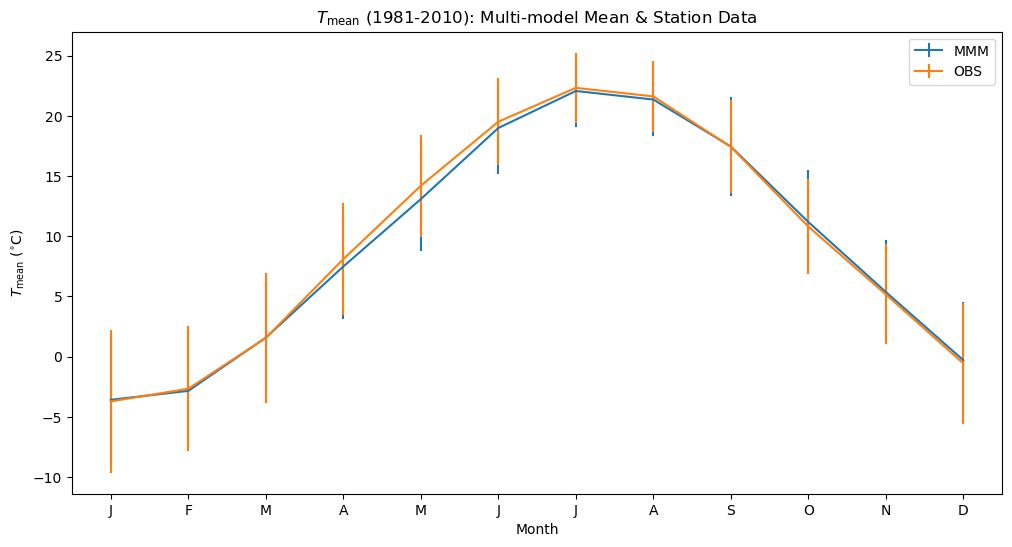

In [105]:
months = np.arange(0.5,12.5,1)

plt.figure(figsize=(12,6))
plt.errorbar(months,
             np.asarray(baseline_stats_gcm["Value", "mean"]["ssp245", "tas"]),
             yerr=np.asarray(baseline_stats_gcm["Value", "std"]["ssp245", "tas"]),
             label='MMM')

plt.errorbar(months,
             np.asarray(tor_stats["MeanTemp", "mean"]),
             yerr=np.asarray(tor_stats["MeanTemp", "std"]),
             label='OBS')

plt.xlim(0,12)
plt.xticks(months,["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title(r"$T_\mathrm{mean}$ (1981-2010): Multi-model Mean & Station Data")
plt.xlabel("Month")
plt.ylabel(r"$T_\mathrm{mean}$ ($^{\circ}$C)")
plt.legend()
plt.show()

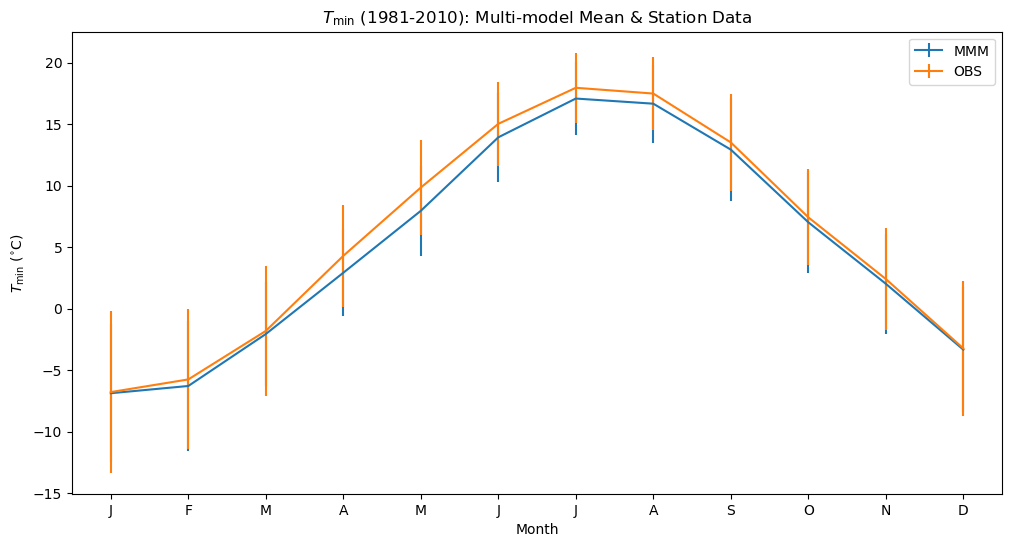

In [106]:
plt.figure(figsize=(12,6))
plt.errorbar(months,
             np.asarray(baseline_stats_gcm["Value", "mean"]["ssp245", "tasmin"]),
             yerr=np.asarray(baseline_stats_gcm["Value", "std"]["ssp245", "tasmin"]),
             label='MMM')

plt.errorbar(months,
             np.asarray(tor_stats["MinTemp", "mean"]),
             yerr=np.asarray(tor_stats["MinTemp", "std"]),
             label='OBS')

plt.xlim(0,12)
plt.xticks(months,["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title(r"$T_\mathrm{min}$ (1981-2010): Multi-model Mean & Station Data")
plt.xlabel("Month")
plt.ylabel(r"$T_\mathrm{min}$ ($^{\circ}$C)")
plt.legend()
plt.show()

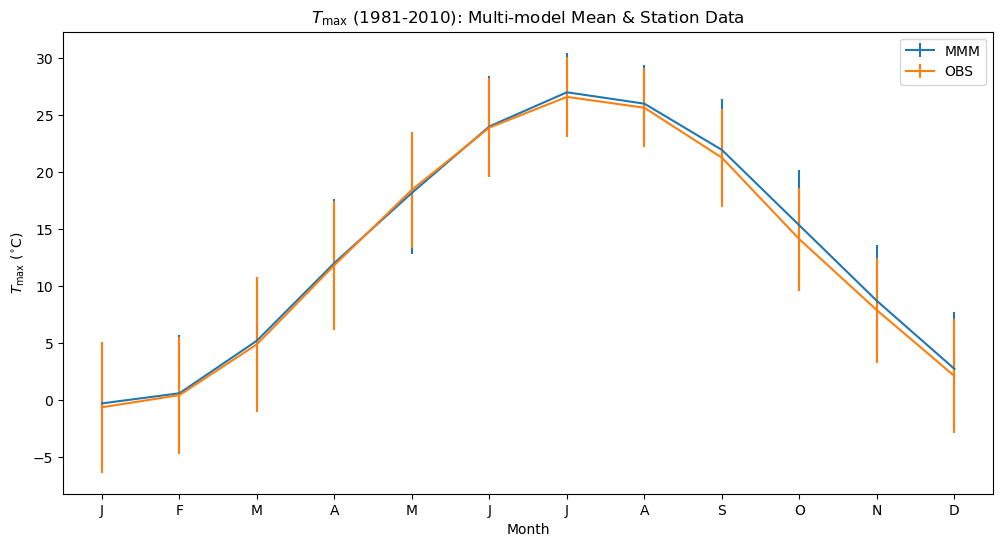

In [107]:
plt.figure(figsize=(12,6))
plt.errorbar(months,
             np.asarray(baseline_stats_gcm["Value", "mean"]["ssp245", "tasmax"]),
             yerr=np.asarray(baseline_stats_gcm["Value", "std"]["ssp245", "tasmax"]),
             label='MMM')

plt.errorbar(months,
             np.asarray(tor_stats["MaxTemp", "mean"]),
             yerr=np.asarray(tor_stats["MaxTemp", "std"]),
             label='OBS')

plt.xlim(0,12)
plt.xticks(months,["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title(r"$T_\mathrm{max}$ (1981-2010): Multi-model Mean & Station Data")
plt.xlabel("Month")
plt.ylabel(r"$T_\mathrm{max}$ ($^{\circ}$C)")
plt.legend()
plt.show()

## 7.3 Cálculo del sesgo del GCM

Podemos trazar el sesgo en las proyecciones del GCM de t.metromianorte. Para calcular el sesgo, restamos la línea base de la estación de la línea base del GCM. Usaremos un t distribución para detectar meses en los que hay una diferencia significativa y trazará aquellos con una línea roja, si la hay.

In [108]:
gcm_bias = np.asarray(baseline_stats_gcm["Value","mean"]["ssp245","tas"]) - np.asarray(tor_stats["MeanTemp","mean"])

N = len(models)
t_crit = stats.t.ppf(0.975, N - 1)

t_sample = gcm_bias * np.sqrt(N - 1) / baseline_stats_gcm["Value","std"]["ssp245","tas"]

gcm_bias_sig = np.ma.masked_where(np.abs(t_sample) < t_crit, gcm_bias)

Ahora vamos a trazarlo.

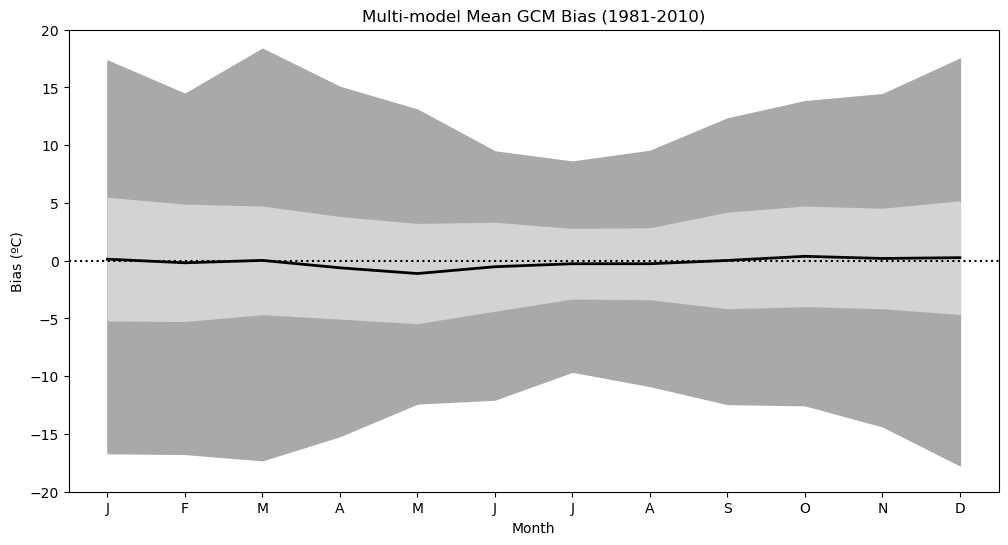

In [109]:
plt.figure(figsize=(12,6))
# Las variables necesarias (Min minus the Mean and Max minus the Mean; dark gray shading)
plt.fill_between(months,
                 np.asarray(baseline_stats_gcm["Value","min"]["ssp245","tas"]) - np.asarray(tor_stats["MeanTemp","mean"]),
                 np.asarray(baseline_stats_gcm["Value", "max"]["ssp245","tas"]) - np.asarray(tor_stats["MeanTemp","mean"]),
                 color='darkgray')

# Una desviación estándar (en gris claro)
plt.fill_between(months,
                 gcm_bias - np.asarray(baseline_stats_gcm["Value","std"]["ssp245","tas"]),
                 gcm_bias + np.asarray(baseline_stats_gcm["Value","std"]["ssp245","tas"]),
                 color='lightgray')

plt.plot(months, gcm_bias, 'k', linewidth=2)
plt.plot(months, gcm_bias_sig, 'r', linewidth=2.5)

plt.axhline(0, color='k', linestyle=':')
plt.xlim(0,12)
plt.ylim(-20,20)
plt.xticks(months,["J","F","M","A","M","J","J","A","S","O","N","D"])
plt.title(r"Multi-model Mean GCM Bias (1981-2010)")
plt.xlabel(r"Month")
plt.ylabel(r"Bias (ºC)")
# plt.ylabel(r"Bias ($^{\circ}$C)")
plt.show()

Se puede apreciar t.metromianorte sesgo en un conjunto de modelos múltiples, reducido a escala, utilizando datos GCM reducidos. La media del conjunto se muestra como una línea negra. Las regiones sombreadas indican una desviación estándar (gris claro) y la gama completa de miembros individuales del conjunto (gris oscuro).

## 7.4 Reevaluando el futuro

Echemos un vistazo a cómo los datos reducidos proyectan el clima futuro. Realizaremos nuestro análisis utilizando las mismas tres décadas que usamos en la seccion 1. Primero, filtraremos nuestros datos para obtener los datos de 1981 a 2100, que cubren nuestra línea de base y nuestras tres décadas. A continuación, agregaremos una columna vacía "Period", y clasificaremos nuestras tres décadas, enmascarando los períodos relevantes y asignando un nombre al período.

In [111]:
dat = df[(df.Date >= cftime.DatetimeNoLeap(1981, 1, 1)) & (df.Date <= cftime.DatetimeNoLeap(2100, 12, 31))]

dat = dat.assign(Period = np.repeat(None, dat.shape[0]))

dat.loc[(dat.Date >= cftime.DatetimeNoLeap(1981, 1, 1)) & (dat.Date <= cftime.DatetimeNoLeap(2010, 12, 31)), 'Period'] = '1990s'
dat.loc[(dat.Date >= cftime.DatetimeNoLeap(2011, 1, 1)) & (dat.Date <= cftime.DatetimeNoLeap(2040, 12, 31)), 'Period'] = '2020s'
dat.loc[(dat.Date >= cftime.DatetimeNoLeap(2041, 1, 1)) & (dat.Date <= cftime.DatetimeNoLeap(2070, 12, 31)), 'Period'] = '2050s'
dat.loc[(dat.Date >= cftime.DatetimeNoLeap(2071, 1, 1)) & (dat.Date <= cftime.DatetimeNoLeap(2100, 12, 31)), 'Period'] = '2080s'

,Date,Model,Scenario,Variable,Value,Period
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,tasmax,3.901731,1990s
1,1981-01-01 00:00:00,BCC-CSM2-MR,ssp585,tasmax,3.901731,1990s
2,1981-01-01 00:00:00,CMCC-ESM2,ssp245,tasmax,0.840772,1990s
3,1981-01-01 00:00:00,CMCC-ESM2,ssp585,tasmax,0.840772,1990s
4,1981-01-01 00:00:00,CanESM5,ssp245,tasmax,1.530480,1990s


In [112]:
dat.head()

,Date,Model,Scenario,Variable,Value,Period
0,1981-01-01 00:00:00,BCC-CSM2-MR,ssp245,tasmax,3.901731,1990s
1,1981-01-01 00:00:00,BCC-CSM2-MR,ssp585,tasmax,3.901731,1990s
2,1981-01-01 00:00:00,CMCC-ESM2,ssp245,tasmax,0.840772,1990s
3,1981-01-01 00:00:00,CMCC-ESM2,ssp585,tasmax,0.840772,1990s
4,1981-01-01 00:00:00,CanESM5,ssp245,tasmax,1.530480,1990s


In [113]:
dat.tail()

,Date,Model,Scenario,Variable,Value,Period
2890795,2100-12-31 00:00:00,NorESM2-LM,ssp585,tas,5.592431,2080s
2890796,2100-12-31 00:00:00,NorESM2-MM,ssp245,tas,8.416875,2080s
2890797,2100-12-31 00:00:00,NorESM2-MM,ssp585,tas,-0.030518,2080s
2890798,2100-12-31 00:00:00,TaiESM1,ssp245,tas,1.786831,2080s
2890799,2100-12-31 00:00:00,TaiESM1,ssp585,tas,8.635079,2080s


Podemos trazar la temperatura media anual de las tres décadas. En este caso, usemos seaborn para la trama, para que podamos aprovechar sus convenientes atajos de facetas. Las versiones recientes de esta libreta arrojaron un error al intentar promediar la columna 'Date', por lo que, lo borraremos antes de agrupar el resto de la tabla.

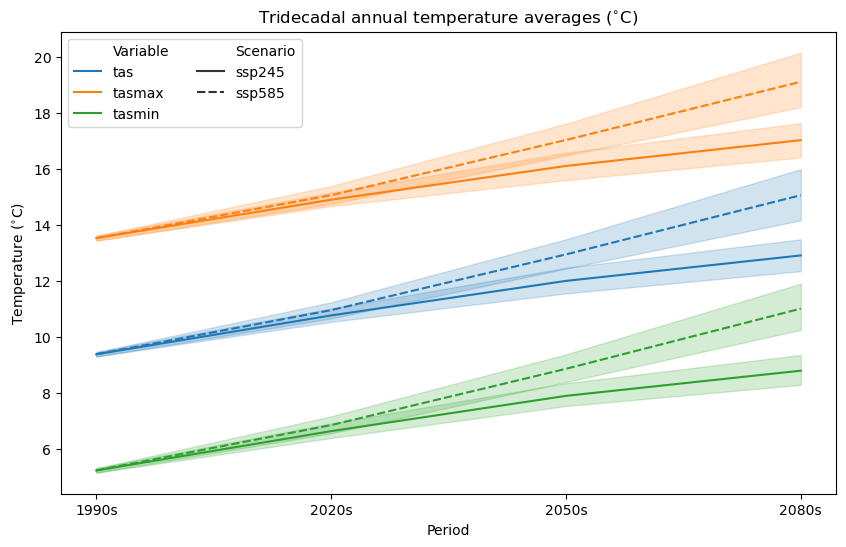

In [114]:
plot_data = dat.drop('Date', axis=1).groupby(['Model', 'Scenario', 'Variable', 'Period']).agg('mean').reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x="Period", y="Value", hue="Variable", style="Scenario", data=plot_data)
plt.legend(loc='upper left', ncol=2, prop={'size': 10})
plt.ylabel(r"Temperature ($^{\circ}$C)")
plt.title(r"Tridecadal annual temperature averages ($^{\circ}$C)")
plt.show()

Promedios de temperatura máxima (naranja), mínima (verde) y media (azul) simulados y proyectados durante tres décadas en Toronto, desde la década de 1990 hasta la década de 2080, según lo proyectado por un conjunto multimodelo reducido para SSP2-4.5 (sólido) y SSP5-8.5 (discontinuo).

Quizás queramos ver las proyecciones de cada modelo, así como la media del conjunto. Veamos un ejemplo de 
t.metromianorte .

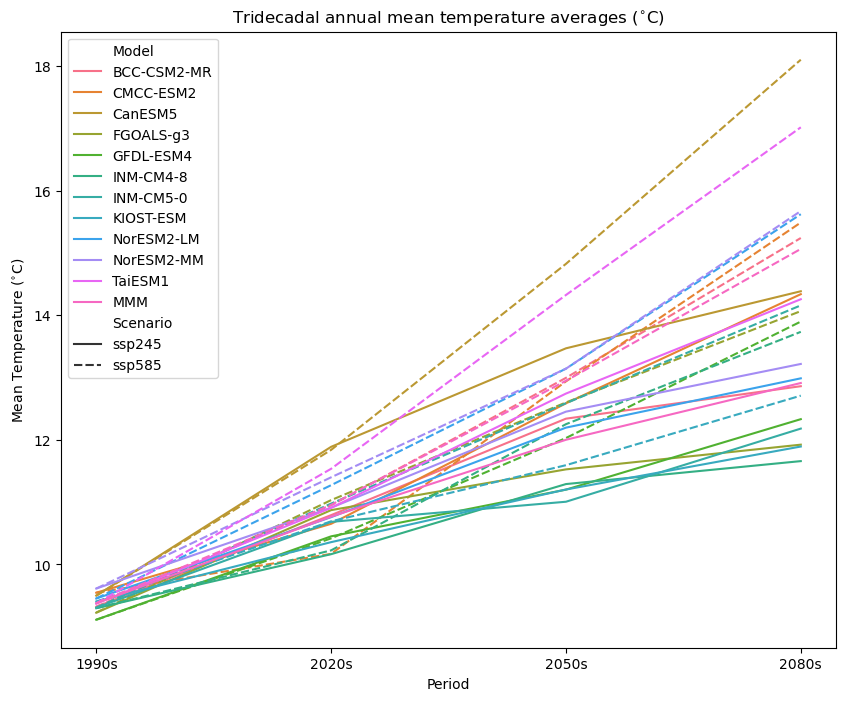

In [117]:
plot_data = dat.drop('Date', axis=1).groupby(['Model', 'Scenario', 'Variable', 'Period']).agg('mean').reset_index()
overall_means = plot_data.groupby(['Period', 'Scenario', 'Variable']).agg({'Value': 'mean'}).reset_index()
plot_data = pd.concat([plot_data,overall_means.assign(Model="MMM")], ignore_index=True, sort=True)

plt.figure(figsize=(10,8))
sns.lineplot(x="Period", y="Value", hue="Model", style="Scenario", data=plot_data[plot_data.Variable == "tas"])
plt.legend(loc='upper left', prop={'size': 10})
plt.ylabel(r"Mean Temperature ($^{\circ}$C)")
plt.title(r"Tridecadal annual mean temperature averages ($^{\circ}$C)")
plt.show()

Promedios de temperatura media de 30 años simulados y proyectados en Toronto, desde la década de 1990 hasta la década de 2080, según lo proyectado por 11 GCM, reducidos para SSP2-4,5 (sólido) y SSP5-8,5 (discontinuo).

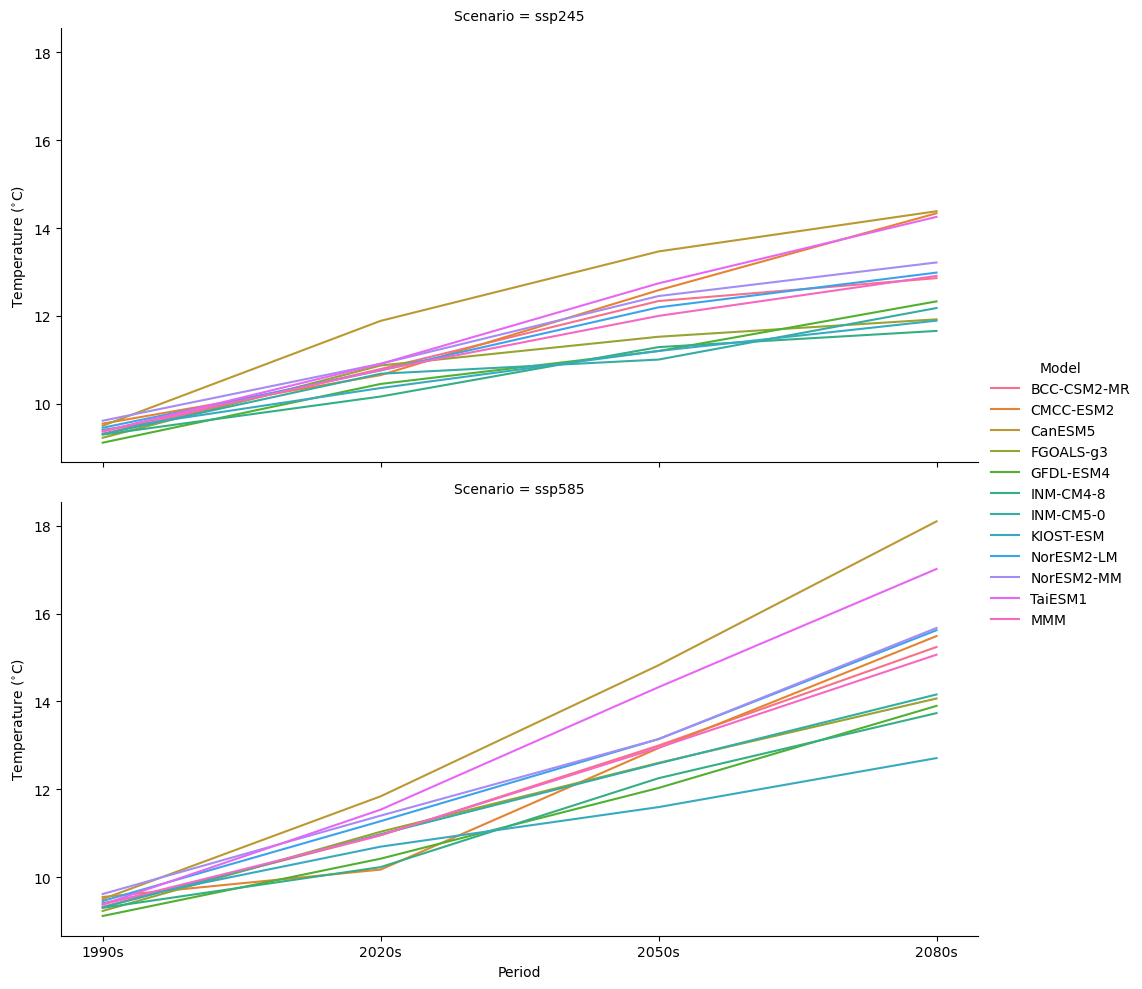

In [126]:
sns.relplot(data=plot_data[plot_data.Variable == "tas"],
            x="Period", y="Value",
            hue="Model", row="Scenario",
            aspect=2, kind="line").set_ylabels(r"Temperature ($^{\circ}$C)")
plt.show()

## 7.5 Evaluación de cambios en los índices climáticos

También podemos utilizar los datos reducidos para proyectar cambios en nuestro índice climático. Veamos los grados día de enfriamiento (CDD) en verano.

In [127]:
cdd = dat.assign(Month=dat.Date.apply(lambda x: x.month))
cdd = cdd[(cdd.Variable == "tas") & (cdd.Month.isin([6,7,8]))]
cdd = cdd.assign(CDD=cdd.Value.apply(lambda x: 0 if x <= 18 else x - 18))
cdd.head()

,Date,Model,Scenario,Variable,Value,Period,Month,CDD
1930522,1981-06-01 00:00:00,BCC-CSM2-MR,ssp245,tas,13.093765,1990s,6,0.00000
1930523,1981-06-01 00:00:00,BCC-CSM2-MR,ssp585,tas,13.093765,1990s,6,0.00000
1930524,1981-06-01 00:00:00,CMCC-ESM2,ssp245,tas,12.927442,1990s,6,0.00000
1930525,1981-06-01 00:00:00,CMCC-ESM2,ssp585,tas,12.927442,1990s,6,0.00000
1930526,1981-06-01 00:00:00,CanESM5,ssp245,tas,21.763940,1990s,6,3.76394


Veamos el total de nuestros períodos de treinta años.

In [128]:
cdd = cdd[['Model', 'Scenario', 'Period', 'CDD']]
cdd = cdd.groupby(['Model', 'Scenario', 'Period']).agg('sum').reset_index()
cdd.head()

,Model,Scenario,Period,CDD
0,BCC-CSM2-MR,ssp245,1990s,9069.892107
1,BCC-CSM2-MR,ssp245,2020s,11815.675027
2,BCC-CSM2-MR,ssp245,2050s,15844.500906
3,BCC-CSM2-MR,ssp245,2080s,18065.022770
4,BCC-CSM2-MR,ssp585,1990s,9067.395732


Vamos a ver.

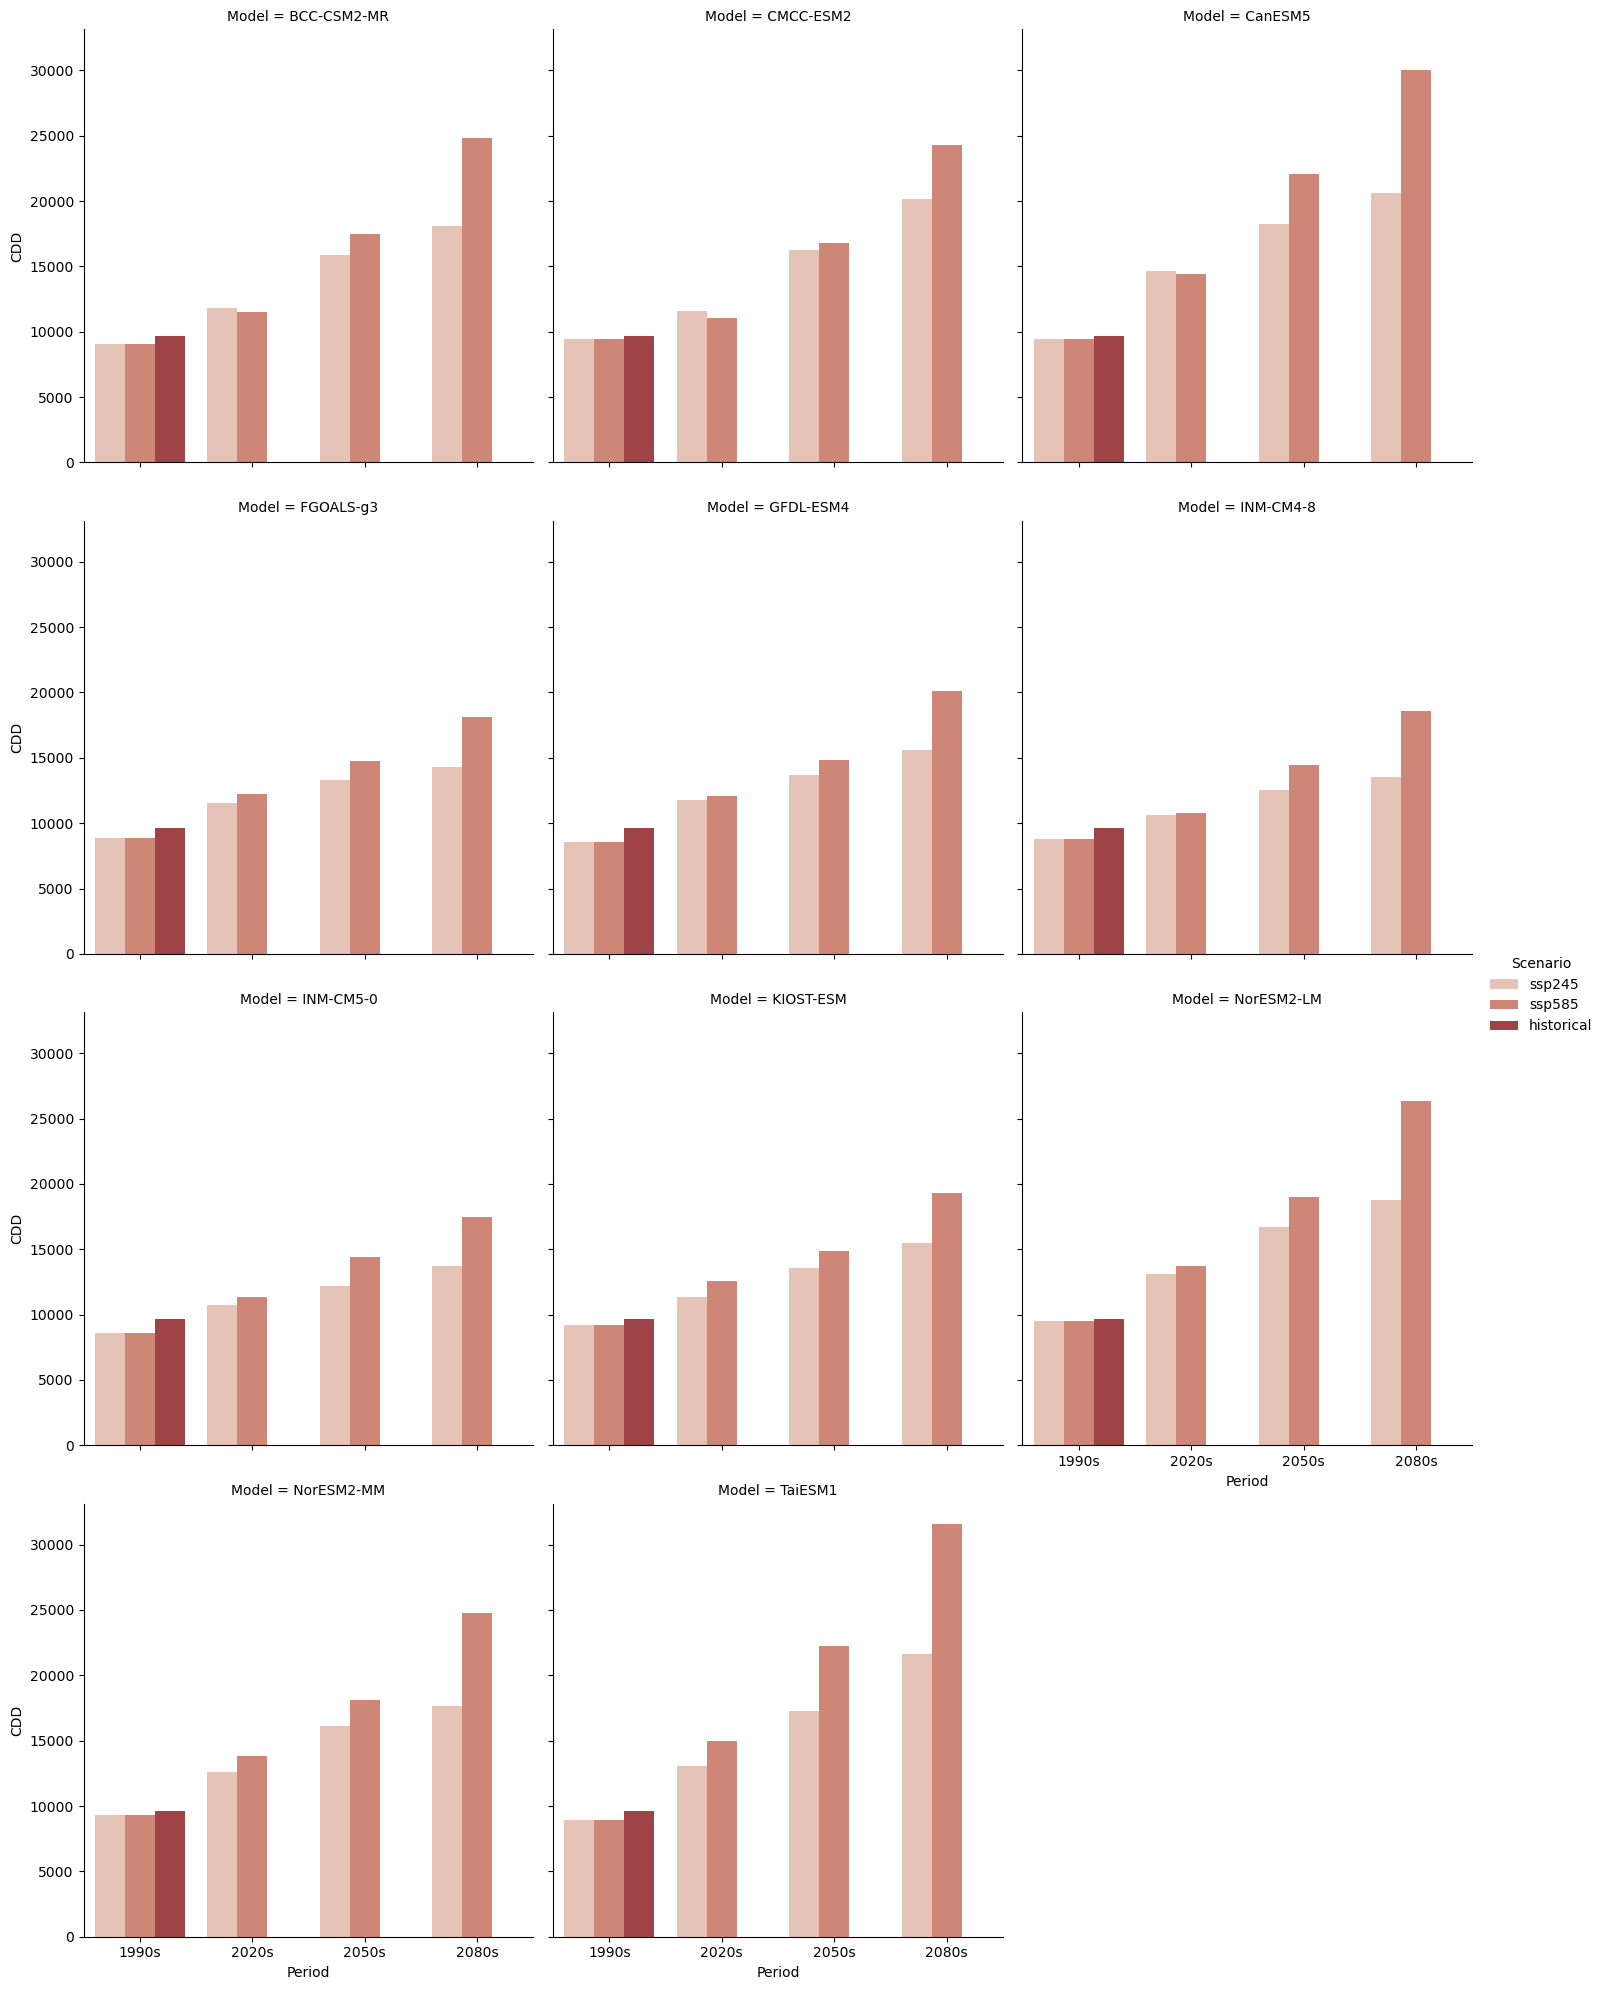

In [142]:
sns.catplot(x="Period", 
            y="CDD", 
            hue="Scenario", 
            col="Model",
            data=cdd, 
            saturation=0.5, 
            palette="Reds", 
            kind="bar",
            errorbar=None, 
            height=5, 
            aspect=1, 
            col_wrap=3)
plt.show()

Grados día de enfriamiento (CDD) totales, simulados y proyectados en Toronto durante tres décadas, desde la década de 1990 hasta la década de 2080, utilizando GCM reducidos para SSP2-4.5 (claro) y SSP5-8.5 (oscuro).   
Los verdaderos CDD históricos observados se muestran en rojo oscuro.

Podríamos preferir utilizar los valores CDD reales observados en lugar de los valores históricos proyectados por el modelo. Veamos cómo se comparan.

In [137]:
observed_cdd = tor[tor.Month.isin([6,7,8])]
observed_cdd = observed_cdd.assign(CDD=observed_cdd.MeanTemp.apply(lambda x: 0 if x <= 18 else x - 18))
observed_cdd = observed_cdd.CDD.sum()

for mod in cdd.Model.unique():
    cdd = pd.concat([cdd.T,pd.Series({'Model': mod, 'Scenario': 'historical', 'Period': '1990s', 'CDD': observed_cdd})],axis=1)
    cdd = cdd.T

cdd = cdd.reset_index()

cdd.tail()

,level_0,index,Model,Scenario,Period,CDD
105,0,NaN,INM-CM5-0,historical,1990s,9654.5
106,0,NaN,KIOST-ESM,historical,1990s,9654.5
107,0,NaN,NorESM2-LM,historical,1990s,9654.5
108,0,NaN,NorESM2-MM,historical,1990s,9654.5
109,0,NaN,TaiESM1,historical,1990s,9654.5


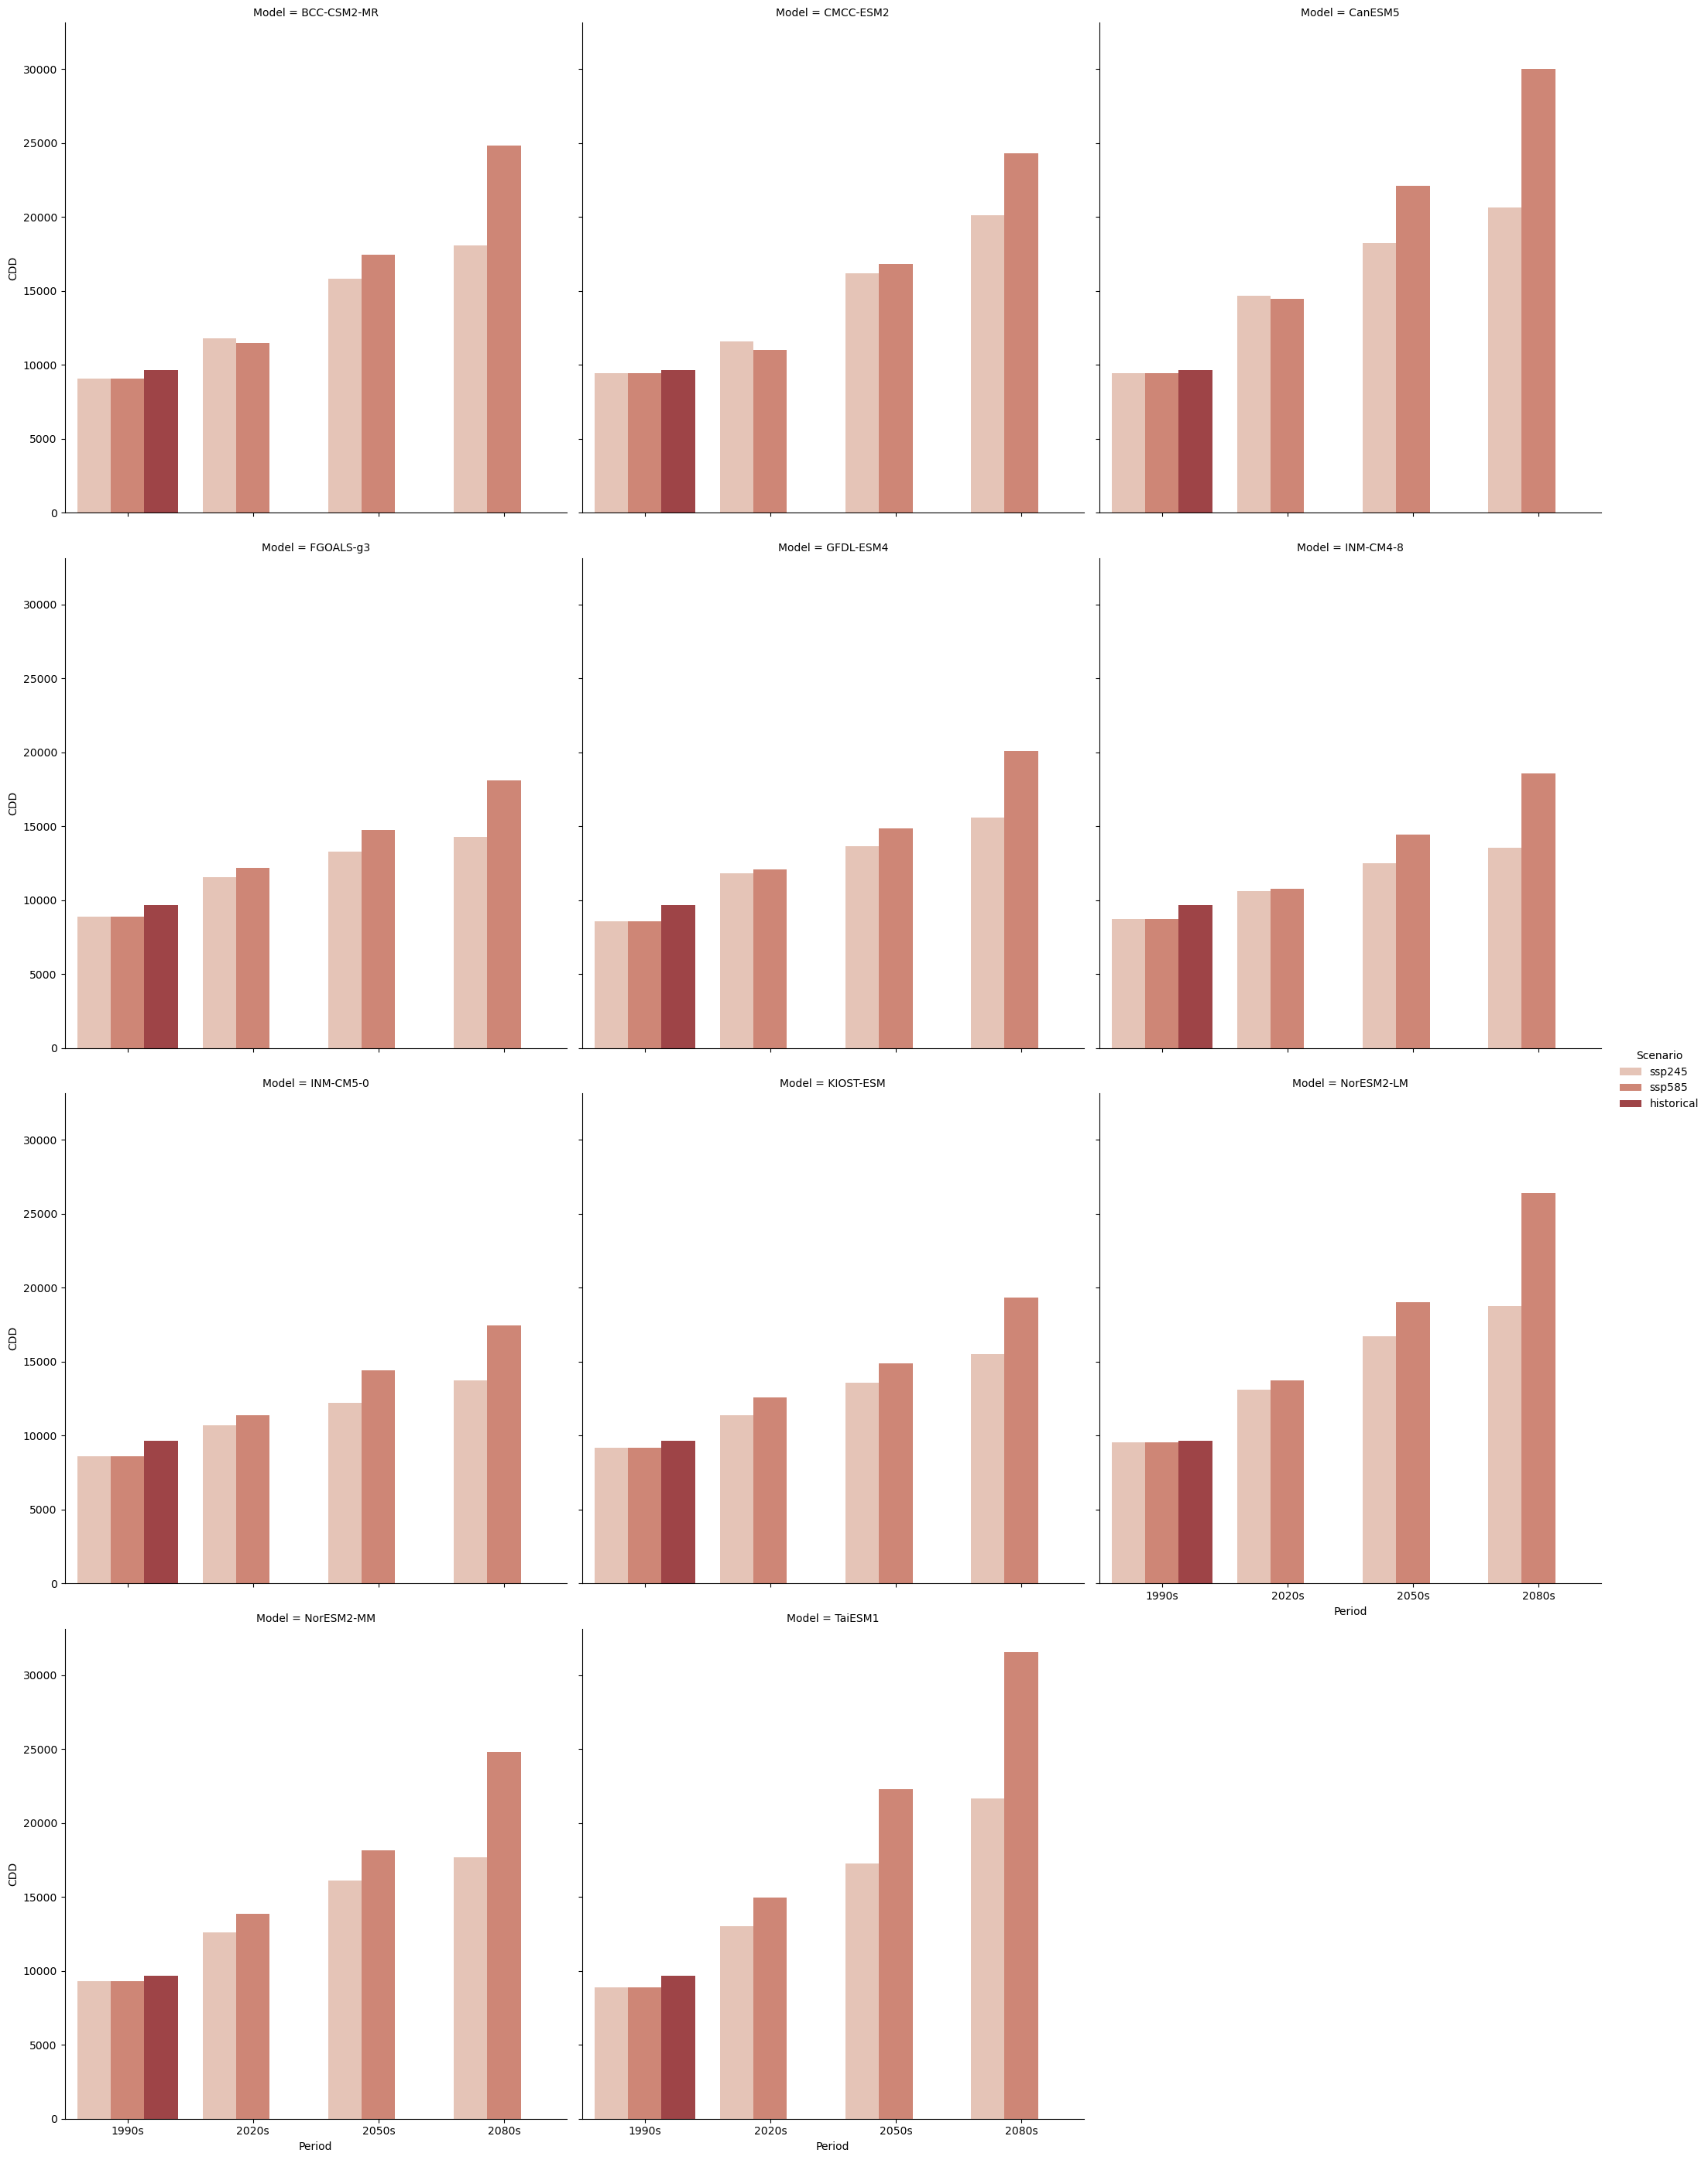

In [143]:
sns.catplot(x="Period", 
            y="CDD", 
            hue="Scenario", 
            col="Model",
            data=cdd, 
            saturation=0.5, 
            palette="Reds",
            kind="bar", 
            errorbar=None, 
            height=7, 
            aspect=1, 
            col_wrap=3)
plt.show()

Grados día de enfriamiento (CDD) totales simulados y proyectados para 30 años en Toronto, desde la década de 1990 hasta la década de 2080, utilizando GCM reducidos para SSP2-4.5 (ligero) y SSP5-8.5.    
Los verdaderos CDD históricos observados se muestran en rojo oscuro.

Parece que nuestros modelos subestiman ligeramente el CDD de referencia. Esto podría estar relacionado con la subestimación de conjuntos multimodelo de 
t.metroinorte, que exploraremos en los ejercicios.

## Referencias

- Consorcio de Impactos Climáticos del Pacífico, Universidad de Victoria. 2019. “Escenarios climáticos estadísticamente reducidos”, febrero. https://data.pacificclimate.org/portal/downscaled_gcms/map/ .

# 8 Resumen y próximos pasos

En resumen:   
- En el sección 1, hemos visto cómo obtener datos sin procesar de modelos CMIP5 a través de ESGF.   
- En la sección 2, navegamos a través de las capas de estos datos modelados y a extraegimos datos para el "área" geografica y temporal que nos interesa.   
- En la sección 5, profundizamos sobre la complejidad de los modelos climáticos y los escenarios que impulsan los modelos.
- En la sección 7, aprendimos una parte de la información necesaria para manejar el formato de archivo netCDF y las series de datos multidimensionales.
- En la sección 9, emprendimos un pensamiento crítico sobre las estrategias de selección de modelos.
-  En la sección 10 proyectamos cambios en nuestros índices climáticos hasta el año 2100, utilizando el método del factor de cambio, completando un mini CCIA.   
- En la sección 12, utilizarmos los datos de GCM estadísticamente reducidos para Canadá (Cannon). , Sobie y Murdock 2015) para mejorar los resultados.

## Referencias

Cannon, Alex J., Stephen R. Sobie y Trevor Q. Murdock. 2015. “Corrección del sesgo de la precipitación del GCM mediante mapeo de cuantiles: ¿Qué tan bien preservan los métodos los cambios en cuantiles y extremos?” Revista de clima 28 (17): 6938–59. https://doi.org/10.1175/JCLI-D-14-00754.1 .

## Referencias para Completar

- Anderson, Conor I. y William A. Gough. 2017. “Evolución de la temperatura invernal en Toronto, Ontario, Canadá : un estudio de caso de los inviernos 2013/14 y 2014/15”. Revista de clima 30 (14): 5361–76. https://doi.org/10.1175/JCLI-D-16-0562.1 .
- Cannon, Alex J., Stephen R. Sobie y Trevor Q. Murdock. 2015. “Corrección del sesgo de la precipitación del GCM mediante mapeo de cuantiles: ¿Qué tan bien preservan los métodos los cambios en cuantiles y extremos?” Revista de clima 28 (17): 6938–59. https://doi.org/10.1175/JCLI-D-14-00754.1 .
- Fenech, Adam, Neil Comer y William A. Gough. 2007. “Selección de un modelo climático global para comprender las proyecciones futuras del cambio climático”. En Vincular los modelos climáticos con las políticas y la toma de decisiones , 133–45. Toronto: Medio Ambiente Canadá .
- Gough, William A. 2001. “Ajuste del modelo y su impacto en la respuesta modelada al cambio climático: Hielo marino de la Bahía de Hudson , un estudio de caso”. El geógrafo canadiense / Le Géographe Canadien 45 (2): 300–305. https://doi.org/10.1111/j.1541-0064.2001.tb01490.x .
- Gough, William A., Vidya Anderson y Kris Herod. 2016. “Estudio de modelos de salud y cambio climático de Ontario: Informe”. Ontario: Subdivisión de Programas y Políticas de Salud Pública del Ministerio de Salud y Atención a Largo Plazo . https://doi.org/10.13140/RG.2.2.35542.96327 .
- Hewer, Micah J. y William A. Gough. 2016. “Evaluación del impacto del cambio climático proyectado en las visitas al zoológico de Toronto ( Canadá )”. Revista de Geografía y Geología 8 (2): 30–48. https://doi.org/10.5539/jgg.v8n2p30 .
- IPCC. 2021. “Resumen para responsables de políticas”. En Cambio climático 2021: la base de la ciencia física . Contribución del Grupo de Trabajo I al Sexto Informe de Evaluación del Panel Intergubernamental sobre el Cambio Climático , editado por V. Masson-Delmotte, P. Zhai, A. Pirani, SL Connors, C. Péan, S. Berger, N. Caud, et Alabama. Prensa de la Universidad de Cambridge .
- Knutti, Reto, Reinhard Furrer, Claudia Tebaldi, Jan Cermak y Gerald A. Meehl. 2010. “Desafíos al combinar proyecciones de múltiples modelos climáticos”. Revista de clima 23 (10): 2739–58. https://doi.org/10.1175/2009JCLI3361.1 .
- Masson-Delmotte, V., P. Zhai, A. Pirani, SL Connors, C. Péan, S. Berger, N. Caud, et al. 2021. Cambio climático 2021: la base de la ciencia física. Contribución del Grupo de Trabajo I al Sexto Informe de Evaluación del Panel Intergubernamental sobre Cambio Climático . IPCC.
- Meinshausen, M., ZRJ Nicholls, J. Lewis, MJ Gidden, E. Vogel, M. Freund, U. Beyerle, et al. 2020. “Las concentraciones de gases de efecto invernadero de la vía socioeconómica compartida (SSP) y sus extensiones hasta el año 2500”. Desarrollo de modelos geocientíficos 13 (8): 3571–3605. https://doi.org/10.5194/gmd-13-3571-2020 .
- Mohsin, Tanzina y William A. Gough. 2010. “Análisis de tendencias de series temporales de temperatura a largo plazo en el área metropolitana de Toronto ( GTA )”. Climatología teórica y aplicada 101 (3–4): 311–27. https://doi.org/10.1007/s00704-009-0214-x .
- OŃeill, BC, E. Kriegler, K. Riahi, S. Hallegatte, TR Carter, R Mathur y DP van Vuuren. 2014. “Un nuevo marco de escenarios para la investigación del cambio climático: el concepto de vías socioeconómicas compartidas”. Cambio climático 122: 387–400. https://doi.org/10.1007/s10584-013-0905-2 .
- Consorcio de Impactos Climáticos del Pacífico, Universidad de Victoria. 2019. “Escenarios climáticos estadísticamente reducidos”, febrero. https://data.pacificclimate.org/portal/downscaled_gcms/map/ .
- Pierce, David W., Tim P. Barnett, Benjamin D. Santer y Peter J. Gleckler. 2009. “Selección de modelos climáticos globales para estudios regionales de cambio climático”. Actas de la Academia Nacional de Ciencias 106 (21): 8441–46. https://doi.org/10.1073/pnas.0900094106 .
- Ragettli, S., F. Pellicciotti, R. Bordoy y WW Immerzeel. 2013. “Fuentes de incertidumbre en el modelado de la respuesta glaciohidrológica de una cuenca del Karakoram al cambio climático”. Investigación de recursos hídricos 49 (9): 6048–66. https://doi.org/10.1002/wrcr.20450 .
- Ushey, Kevin, JJ Allaire y Yuan Tang. 2023. Reticulado: interfaz para Python .
- Watson, Andrew J y James E. Lovelock. 1983. "Homeostasis biológica del medio ambiente global: la parábola de Daisyworld ". Tellus B: Meteorología química y física 35 (4): 284–89.
- Xie, Changwei, William A. Gough, Andrew Tam, Lin Zhao y Tonghua Wu. 2013. "Características y persistencia del permafrost relicto a gran altitud en la montaña Mahan , meseta de Loess , China ". Permafrost y procesos periglaciales 24 (3): 200–209. https://doi.org/10.1002/ppp.1776 .
- Xie, Yihui. 2023. Bookdown: creación de libros y documentos técnicos con r Markdown . https://CRAN.R-project.org/package=bookdown .